In [ ]:
# Necessary to labeling libraries
!pip install pycountry babel


In [ ]:
import pandas as pd                     # Pandas for data set manipulation
from google.colab import drive          # Import dataset
import os
import pycountry                        # Country Labeling
import babel
import numpy as np                      # Data manipulation
import re                               # Clear strings
import seaborn as sns                   # Analisis and ploting
import matplotlib.pyplot as plt
import statsmodels.api as sm            # Processing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# Importing Dataset Info

In [ ]:
# Connecting to your Google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/BAWML/Project"
os.chdir(path)

In [ ]:
path_datasets = path + "/Datos_España/Posibles"

In [ ]:
# UN datasets
path_inmigration_un_initial = path_datasets + "/inmigration_un.csv"
path_literacy_un_initial = path_datasets + "/Un_Literacy.csv"
# Datos Gob.es
path_inmigration_gob_initial = path_datasets + "/migracion2.csv"
# WB datasets
path_data_inflation_initial = path_datasets + "/Inflation.csv"
path_data_Literacy_initial = path_datasets + "/Literacy.csv"
path_data_Unemployment_initial = path_datasets + "/Unemployed_Total.csv"
path_Producto_Interno_Bruto = path_datasets + "/Producto_Interno_Bruto.csv"
path_inflation_wb = path_datasets + "/inflation_wb.csv"
# Natural disasters
path_natural_disasters = path_datasets + "/Natural.xlsx"
# Geo
path_geo_initial = path_datasets + "/geo_cepii.csv"
# Death Rate
path_death_rate_initial = path_datasets + "/death_rate.csv"
#Cuba Ven GDP
path_cuba_ven_gdp = path_datasets + "/GDP_Ven_Cuba.csv"
# IMF Inlfation
path_imf_inflation = path_datasets + "/imf_inflation.csv"

In [ ]:
# UN datasets
data_inmigration_un_initial = pd.read_csv(path_inmigration_un_initial, sep=';',skiprows=10)
data_literacy_un_initial = pd.read_csv(path_literacy_un_initial, sep=',')
# Datos Gob.es
data_inmigration_gob_initial = pd.read_csv(path_inmigration_gob_initial, sep=';')
# WB datasets
data_inflation_initial = pd.read_csv(path_data_inflation_initial, sep=',', skiprows=3)
data_Literacy_initial = pd.read_csv(path_data_Literacy_initial, sep=',', skiprows=3)
data_Unemployment_initial = pd.read_csv(path_data_Unemployment_initial, sep=',', skiprows=3)
data_Producto_Interno_Bruto = pd.read_csv(path_Producto_Interno_Bruto, sep=',', skiprows=3)
data_inflation_wb = pd.read_csv(path_inflation_wb, sep=',')
# Natural Disasters
data_natural_disasters = pd.read_excel(path_natural_disasters)
# Geo
data_geo_initial = pd.read_csv(path_geo_initial, sep=',')
# Death Rate
data_death_rate_initial = pd.read_csv(path_death_rate_initial, sep=',',skiprows=4)
#Cuba Ven GDP
data_cuba_ven_gdp = pd.read_csv(path_cuba_ven_gdp, sep=',')
# IMF Inflation
data_imf_inflation = pd.read_csv(path_imf_inflation, sep=',')

# Datasets Preparation


## UN: Migration Dataset


In [ ]:
data_inmigration_un_initial.describe(include="all")

Index  \
count   28030.000000   
unique           NaN   
top              NaN   
freq             NaN   
mean    14015.500000   
std      8091.708359   
min         1.000000   
25%      7008.250000   
50%     14015.500000   
75%     21022.750000   
max     28030.000000   

       Region, development group, country or area of destination     Coverage  \
count                                               28030         2416.000000   
unique                                                286                 NaN   
top                                 Australia/New Zealand                 NaN   
freq                                                  502                 NaN   
mean                                                  NaN           21.331954   
std                                                   NaN           11.879411   
min                                                   NaN            1.000000   
25%                                                   NaN           11.000000   
50%                                                   NaN           21.000000   
75%                                                   NaN           32.000000   
max                                                   NaN           44.000000   

       Data type  Location code of destination  \
count      17163                  28030.000000   
unique         7                           NaN   
top          B R                           NaN   
freq        8994                           NaN   
mean         NaN                    839.707064   
std          NaN                    925.290581   
min          NaN                      4.000000   
25%          NaN                    324.000000   
50%          NaN                    690.000000   
75%          NaN                    924.000000   
max          NaN                   5504.000000   

       Region, development group, country or area of origin  \
count                                               28030     
unique                                                285     
top                                 Australia/New Zealand     
freq                                                  302     
mean                                                  NaN     
std                                                   NaN     
min                                                   NaN     
25%                                                   NaN     
50%                                                   NaN     
75%                                                   NaN     
max                                                   NaN     

        Location code of origin   1990   1995   2000  ... 2020.1 2024.1  \
count              28030.000000  28029  28030  28030  ...  28030  28030   
unique                      NaN  12251  12614  12845  ...  12879  13015   
top                         NaN     ,,     ,,     ,,  ...     ,,     ,,   
freq                        NaN   2147   1776   1628  ...    794    779   
mean                 852.132001    NaN    NaN    NaN  ...    NaN    NaN   
std                  946.004699    NaN    NaN    NaN  ...    NaN    NaN   
min                    4.000000    NaN    NaN    NaN  ...    NaN    NaN   
25%                  352.000000    NaN    NaN    NaN  ...    NaN    NaN   
50%                  694.000000    NaN    NaN    NaN  ...    NaN    NaN   
75%                  922.000000    NaN    NaN    NaN  ...    NaN    NaN   
max                 5504.000000    NaN    NaN    NaN  ...    NaN    NaN   

       1990.2 1995.2 2000.2 2005.2 2010.2 2015.2 2020.2 2024.2  
count   28030  28030  28030  28030  28030  28030  28030  28030  
unique  10935  11208  11425  11716  12039  12341  12566  12785  
top        ,,     ,,     ,,     ,,     ,,     ,,     ,,     ,,  
freq     2617   2180   1999   1708   1395   1004    984    972  
mean      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
std       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
min       NaN    NaN    NaN    NaN    N

In [ ]:
data_inmigration_un_initial.head()

Index Region, development group, country or area of destination  Coverage  \
0      1                                              World              NaN   
1      2                                              World              NaN   
2      3                                              World              NaN   
3      4                                              World              NaN   
4      5                                              World              NaN   

  Data type  Location code of destination  \
0       NaN                           900   
1       NaN                           900   
2       NaN                           900   
3       NaN                           900   
4       NaN                           900   

  Region, development group, country or area of origin  \
0                                              World     
1                                 Sub-Saharan Africa     
2                   Northern Africa and Western Asia     
3                          Central and Southern Asia     
4                     Eastern and South-Eastern Asia     

   Location code of origin         1990         1995         2000  ...  \
0                      900  153 916 063  163 176 002  174 566 152  ...   
1                     1834   14 124 662   15 183 742   14 584 913  ...   
2                     1833   14 986 109   17 216 219   18 728 264  ...   
3                     1831   30 342 957   27 930 630   30 008 559  ...   
4                     1832   14 465 509   17 262 816   20 822 011  ...   

        2020.1       2024.1      1990.2      1995.2      2000.2      2005.2  \
0  143 223 497  158 009 795  76 143 981  80 632 704  86 275 210  94 338 056   
1   14 375 255   16 046 945   6 665 704   7 163 563   6 846 928   7 325 563   
2   21 212 741   22 913 639   6 648 687   7 547 605   8 080 447   9 029 322   
3   30 263 324   33 260 124  13 480 571  12 209 369  12 979 148  13 578 114   
4   17 926 170   19 677 034   7 395 672   8 889 707  11 060 445  13 077 356   

        2010.2       2015.2       2020.2       2024.2  
0  107 763 606  119 854 396  132 060 535  146 012 018  
1    8 503 651   10 696 751   12 759 702   14 614 665  
2   10 800 712   13 724 647   15 984 112   17 615 687  
3   15 854 286   17 271 334   18 331 635   20 688 293  
4   16 213 093   18 793 920   20 297 350   21 732 201  

[5 rows x 31 columns]

### Cleaning Dataset

As seen before this datasets has information relative to 3 diferent groups of years from 1990 to 2024, the first group is about both sexes, the second about males and the third about females, lest modify it to preserve only the important columns (destination, origin, location code destination, location code origin and all the years group), also lets keep only the information where spin is destination

In [ ]:
# Changing columns labels
data_inmigration_un_initial = data_inmigration_un_initial.rename(columns={
    "Region, development group, country or area of destination": "destination",
    "Region, development group, country or area of origin": "origin",
    "Location code of destination": "dest_code",
    "Location code of origin": "origin_code"
})

# Grouping and labeling years
years = ["1990", "1995", "2000", "2005", "2010", "2015", "2020", "2024"]
groups = ["both", "male", "female"]
new_columns = []
for group in groups:
    for year in years:
        new_columns.append(f"{year}_{group}")
data_inmigration_un_initial.columns = list(data_inmigration_un_initial.columns[:7]) + new_columns
data_inmigration_un_initial.describe(include="all")

# Keeping only information about Spain
data_inmigration_un_initial = data_inmigration_un_initial[(data_inmigration_un_initial['destination'] == 'Spain*') |
                                                          (data_inmigration_un_initial['origin'] == 'Spain*')].copy()
# Select key columns
columns_to_keep = ["origin", "origin_code","destination","dest_code"] + new_columns
data_inmigration_un_clean = data_inmigration_un_initial[columns_to_keep]

# Been sure that migration rate columns has numeric values
for col in new_columns:
  data_inmigration_un_clean[col] = (
      data_inmigration_un_clean[col]
      .str.replace('[^0-9]', '', regex=True)  # Remove non-digits
      .replace('', np.nan)  # Treat empty strings as NaN
      .astype(float)
  )

<ipython-input-4332-53ab0b61683a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inmigration_un_clean[col] = (
<ipython-input-4332-53ab0b61683a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_inmigration_un_clean[col] = (
<ipython-input-4332-53ab0b61683a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [ ]:
data_inmigration_un_clean.describe(include="all")

origin  origin_code destination    dest_code     1990_both  \
count      226   226.000000         226   226.000000  2.120000e+02   
unique      91          NaN         136          NaN           NaN   
top     Spain*          NaN      Spain*          NaN           NaN   
freq       136          NaN          90          NaN           NaN   
mean       NaN   813.336283         NaN   752.154867  9.372609e+04   
std        NaN   634.749303         NaN   670.113329  2.124026e+05   
min        NaN    12.000000         NaN    20.000000  5.000000e+00   
25%        NaN   724.000000         NaN   478.500000  8.512500e+02   
50%        NaN   724.000000         NaN   724.000000  6.015500e+03   
75%        NaN   724.000000         NaN   724.000000  5.134150e+04   
max        NaN  5504.000000         NaN  5504.000000  1.374696e+06   

           1995_both     2000_both     2005_both     2010_both     2015_both  \
count   2.230000e+02  2.250000e+02  2.250000e+02  2.260000e+02  2.250000e+02   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    9.975698e+04  1.284065e+05  2.407780e+05  3.254600e+05  3.149918e+05   
std     2.168531e+05  2.830962e+05  5.974159e+05  8.411581e+05  7.917995e+05   
min     3.000000e+00  3.000000e+00  1.100000e+01  1.100000e+01  1.200000e+01   
25%     9.240000e+02  9.980000e+02  1.134000e+03  1.569750e+03  1.816000e+03   
50%     6.999000e+03  1.034400e+04  1.778000e+04  1.945450e+04  2.057700e+04   
75%     5.062650e+04  7.765000e+04  1.160210e+05  1.889312e+05  1.667050e+05   
max     1.258176e+06  2.023886e+06  4.372449e+06  6.281193e+06  5.892847e+06   

        ...     2020_male     2024_male    1990_female    1995_female  \
count   ...  2.260000e+02  2.260000e+02     212.000000     220.000000   
unique  ...           NaN           NaN            NaN            NaN   
top     ...           NaN           NaN            NaN            NaN   
freq    ...           NaN           NaN            NaN            NaN   
mean    ...  1.841862e+05  2.245722e+05   48563.023585   52112.481818   
std     ...  4.668148e+05  5.837298e+05  110233.133713  113064.542896   
min     ...  6.000000e+00  6.000000e+00       3.000000       2.000000   
25%     ...  9.932500e+02  1.018000e+03     332.250000     419.500000   
50%     ...  1.412650e+04  1.793300e+04    3023.000000    3380.000000   
75%     ...  1.095198e+05  1.397058e+05   26161.000000   28447.000000   
max     ...  3.465813e+06  4.287663e+06  708742.000000  642192.000000   

         2000_female   2005_female   2010_female   2015_female   2020_female  \
count   2.250000e+02  2.250000e+02  2.260000e+02  2.250000e+02  2.260000e+02   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    6.542449e+04  1.173754e+05  1.607826e+05  1.611572e+05  1.962699e+05   
std     1.451612e+05  2.925070e+05  4.187383e+05  4.106228e+05  5.136897e+05   
min     1.000000e+00  4.000000e+00  6.000000e+00  6.000000e+00  5.000000e+00   
25%     3.940000e+02  5.170000e+02  7.415000e+02  9.560000e+02  1.035750e+03   
50%     4.973000e+03  7.049000e+03  8.859000e+03  1.090400e+04  1.209000e+04   
75%     3.711400e+04  6.189900e+04  8.620950e+04  9.011700e+04  1.044168e+05   
max     1.002519e+06  2.087858e+06  3.057717e+06  2.998882e+06  3.680317e+06   

         2024_female  
count   2.260000e+02  
unique           NaN  
top              NaN  
freq             NaN  
mean    2.392901e+05  
std     6.434903e+05  
min     5.000000e+00  
25%     1.094000e+03  
50%     1.507150e+04  
75%     1.183550e+05  
max     4.582864e+06  

[11 rows x 28 columns]

In [ ]:
#checking where are the missing values
data_inmigration_un_clean.isnull().sum()

origin          0
origin_code     0
destination     0
dest_code       0
1990_both      14
1995_both       3
2000_both       1
2005_both       1
2010_both       0
2015_both       1
2020_both       0
2024_both       0
1990_male      14
1995_male       3
2000_male       1
2005_male       1
2010_male       0
2015_male       1
2020_male       0
2024_male       0
1990_female    14
1995_female     6
2000_female     1
2005_female     1
2010_female     0
2015_female     1
2020_female     0
2024_female     0
dtype: int64

In [ ]:
# Filling missing values with linear method
data_inmigration_un_clean = data_inmigration_un_clean.sort_values(by=["origin", "destination"])

# Aplying interpolation for imigration emigration columns using numeric data grouping by origin and destination
data_inmigration_un_clean[new_columns] = data_inmigration_un_clean[new_columns].interpolate(
    method="linear",
    axis=1,
    limit_direction="both"
)

In [ ]:
data_inmigration_un_clean.describe(include="all")

origin  origin_code destination    dest_code     1990_both  \
count      226   226.000000         226   226.000000  2.260000e+02   
unique      91          NaN         136          NaN           NaN   
top     Spain*          NaN      Spain*          NaN           NaN   
freq       136          NaN          90          NaN           NaN   
mean       NaN   813.336283         NaN   752.154867  8.808589e+04   
std        NaN   634.749303         NaN   670.113329  2.068640e+05   
min        NaN    12.000000         NaN    20.000000  3.000000e+00   
25%        NaN   724.000000         NaN   478.500000  6.015000e+02   
50%        NaN   724.000000         NaN   724.000000  5.324000e+03   
75%        NaN   724.000000         NaN   724.000000  4.074900e+04   
max        NaN  5504.000000         NaN  5504.000000  1.374696e+06   

           1995_both     2000_both     2005_both     2010_both     2015_both  \
count   2.260000e+02  2.260000e+02  2.260000e+02  2.260000e+02  2.260000e+02   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    9.843415e+04  1.278391e+05  2.397133e+05  3.254600e+05  3.136021e+05   
std     2.157057e+05  2.825952e+05  5.963016e+05  8.411581e+05  7.903141e+05   
min     3.000000e+00  3.000000e+00  1.100000e+01  1.100000e+01  1.200000e+01   
25%     8.917500e+02  9.717500e+02  1.116750e+03  1.569750e+03  1.795000e+03   
50%     6.668000e+03  1.013550e+04  1.700700e+04  1.945450e+04  2.025400e+04   
75%     4.950725e+04  7.533600e+04  1.158660e+05  1.889312e+05  1.667050e+05   
max     1.258176e+06  2.023886e+06  4.372449e+06  6.281193e+06  5.892847e+06   

        ...     2020_male     2024_male    1990_female    1995_female  \
count   ...  2.260000e+02  2.260000e+02     226.000000     226.000000   
unique  ...           NaN           NaN            NaN            NaN   
top     ...           NaN           NaN            NaN            NaN   
freq    ...           NaN           NaN            NaN            NaN   
mean    ...  1.841862e+05  2.245722e+05   46559.797050   50733.116224   
std     ...  4.668148e+05  5.837298e+05  107349.004017  111860.495469   
min     ...  6.000000e+00  6.000000e+00       3.000000       2.000000   
25%     ...  9.932500e+02  1.018000e+03     258.000000     285.250000   
50%     ...  1.412650e+04  1.793300e+04    3023.000000    2997.500000   
75%     ...  1.095198e+05  1.397058e+05   25622.250000   26934.000000   
max     ...  3.465813e+06  4.287663e+06  708742.000000  642192.000000   

         2000_female   2005_female   2010_female   2015_female   2020_female  \
count   2.260000e+02  2.260000e+02  2.260000e+02  2.260000e+02  2.260000e+02   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    6.513590e+04  1.168566e+05  1.607826e+05  1.604456e+05  1.962699e+05   
std     1.449032e+05  2.919605e+05  4.187383e+05  4.098489e+05  5.136897e+05   
min     1.000000e+00  4.000000e+00  6.000000e+00  6.000000e+00  5.000000e+00   
25%     3.917500e+02  5.087500e+02  7.415000e+02  9.560000e+02  1.035750e+03   
50%     4.690500e+03  7.030000e+03  8.859000e+03  1.066900e+04  1.209000e+04   
75%     3.700550e+04  6.133175e+04  8.620950e+04  9.011700e+04  1.044168e+05   
max     1.002519e+06  2.087858e+06  3.057717e+06  2.998882e+06  3.680317e+06   

         2024_female  
count   2.260000e+02  
unique           NaN  
top              NaN  
freq             NaN  
mean    2.392901e+05  
std     6.434903e+05  
min     5.000000e+00  
25%     1.094000e+03  
50%     1.507150e+04  
75%     1.183550e+05  
max     4.582864e+06  

[11 rows x 28 columns]

In [ ]:
data_inmigration_un_clean[data_inmigration_un_clean['origin']=="Spain*"]

origin  origin_code                         destination  dest_code  \
6256   Spain*          724                              AFRICA        903   
10309  Spain*          724                                ASIA        935   
18216  Spain*          724                             Andorra         20   
21397  Spain*          724                 Antigua and Barbuda         28   
24318  Spain*          724                           Argentina         32   
...       ...          ...                                 ...        ...   
25510  Spain*          724  Venezuela (Bolivarian Republic of)        862   
9087   Spain*          724                      Western Africa        914   
12676  Spain*          724                        Western Asia        922   
19856  Spain*          724                      Western Europe        926   
188    Spain*          724                               World        900   

       1990_both  1995_both  2000_both  2005_both  2010_both  2015_both  ...  \
6256      6710.0     6050.0     6049.0     7011.0     8233.0     8694.0  ...   
10309     5765.0     6991.0     7035.0     7175.0     7661.0    10219.0  ...   
18216    27103.0    26972.0    26841.0    28450.0    25929.0    20577.0  ...   
21397        5.0        8.0       10.0       11.0       11.0       12.0  ...   
24318   234460.0   183440.0   143925.0   116356.0    94910.0    72149.0  ...   
...          ...        ...        ...        ...        ...        ...  ...   
25510   109078.0    92458.0    77650.0    75453.0    74051.0    74582.0  ...   
9087       452.0      469.0      482.0      814.0     1276.0     1479.0  ...   
12676     2903.0     3488.0     2880.0     2291.0     1828.0     1917.0  ...   
19856   609954.0   568207.0   531809.0   490096.0   474951.0   555232.0  ...   
188    1374696.0  1238438.0  1177275.0  1126330.0  1138608.0  1307006.0  ...   

       2020_male  2024_male  1990_female  1995_female  2000_female  \
6256      5703.0     5869.0       3086.0       2788.0       2793.0   
10309     6291.0     5444.0       2960.0       3549.0       3467.0   
18216    11023.0    11708.0      12605.0      12686.0      12775.0   
21397        6.0        6.0          3.0          4.0          5.0   
24318    22966.0    22395.0     130189.0     104525.0      82016.0   
...          ...        ...          ...          ...          ...   
25510    37179.0    35470.0      50038.0      43017.0      36680.0   
9087       829.0      809.0        216.0        217.0        223.0   
12676      921.0      985.0       1687.0       2007.0       1641.0   
19856   277909.0   287948.0     311884.0     295055.0     280757.0   
188     720853.0   804326.0     708742.0     642192.0     622827.0   

       2005_female  2010_female  2015_female  2020_female  2024_female  
6256        3138.0       3673.0       3954.0       4446.0       4655.0  
10309       3371.0       3415.0       4442.0       4640.0       4446.0  
18216      13432.0      12237.0      10434.0      11173.0      11869.0  
21397          6.0          6.0          6.0          5.0          5.0  
24318      66312.0      54094.0      41125.0      32006.0      31976.0  
...            ...          ...          ...          ...          ...  
25510      35081.0      33878.0      34603.0      33139.0      31615.0  
9087         333.0        543.0        627.0        599.0        586.0  
12676       1300.0       1040.0       1073.0       1136.0       1187.0  
19856     264865.0     259244.0     294128.0     310553.0     324267.0  
188       597053.0     600691.0     670024.0     750732.0     819224.0  

[136 rows x 28 columns]

## GB: Inmigration

In [ ]:
data_inmigration_gob_initial.describe(include="all")

Nacionalidad         Sexo Tipo de saldo      Periodo        Total
count          1863         1863          1863  1863.000000  1863.000000
unique           69            3             3          NaN          NaN
top           Total  Ambos sexos   Saldo total          NaN          NaN
freq             27          621           621          NaN          NaN
mean            NaN          NaN           NaN  2022.000000    72.168030
std             NaN          NaN           NaN     0.816716   209.367767
min             NaN          NaN           NaN  2021.000000  -929.000000
25%             NaN          NaN           NaN  2021.000000     0.000000
50%             NaN          NaN           NaN  2022.000000     2.280000
75%             NaN          NaN           NaN  2023.000000    21.989000
max             NaN          NaN           NaN  2023.000000   992.000000

In [ ]:
data_inmigration_gob_initial.sample(5)

Nacionalidad         Sexo   Tipo de saldo  Periodo    Total
576           Suiza      Hombres     Saldo total     2023  225.000
1306  De Sudamérica      Hombres     Saldo total     2022  168.001
960         Nigeria      Hombres  Saldo interior     2023    0.000
1552        Uruguay      Hombres  Saldo exterior     2022    1.248
1817     De Oceanía  Ambos sexos  Saldo interior     2021    0.000

### Formating GB:Inmigration dataset to merge with UN:Migration dataset

Rename columns for consistency and keeping only outside balance

In [ ]:
data_inmigration_gob_initial = data_inmigration_gob_initial.rename(columns={
    'Nacionalidad': 'origin',
    'Sexo': 'sex',
    'Periodo': 'year',
    'Tipo de saldo': 'balance',
    'Total': 'migrants_to_spain'
})
# Keeping only information about outside balance
data_inmigration_gob_initial = data_inmigration_gob_initial[data_inmigration_gob_initial['balance'] == 'Saldo exterior'].copy()
data_inmigration_gob_initial=data_inmigration_gob_initial.drop(columns=['balance'])

Convert terms to english

In [ ]:
data_inmigration_gob_initial['sex'] = data_inmigration_gob_initial['sex'].replace({
    'Ambos sexos': 'both',
    'Hombres': 'male',
    'Mujeres': 'female'
})

Add year_sex combination and organize like UN

In [ ]:
data_inmigration_gob_initial['year_sex'] = data_inmigration_gob_initial['year'].astype(str) + '_' + data_inmigration_gob_initial['sex']

data_inmigration_gob_pivoted = data_inmigration_gob_initial.pivot_table(
    index='origin',
    columns='year_sex',
    values='migrants_to_spain',
    aggfunc='sum'  # In case there are duplicates
).reset_index()

data_inmigration_gob_pivoted.describe(include="all")

year_sex    origin   2021_both  2021_female   2021_male   2022_both  \
count           69   69.000000    69.000000   69.000000   69.000000   
unique          69         NaN          NaN         NaN         NaN   
top       Alemania         NaN          NaN         NaN         NaN   
freq             1         NaN          NaN         NaN         NaN   
mean           NaN   89.717855   154.817696   64.538507  122.994551   
std            NaN  262.132504   298.866064  293.001709  249.643033   
min            NaN -805.000000  -357.000000 -929.000000  -11.287000   
25%            NaN    2.038000     1.797000    1.382000    2.728000   
50%            NaN    6.166000     8.019000    4.664000    8.739000   
75%            NaN   68.000000   208.000000   94.315000   70.874000   
max            NaN  859.000000   986.000000  965.000000  992.000000   

year_sex  2022_female   2022_male   2023_both  2023_female   2023_male  
count       69.000000   69.000000   69.000000    69.000000   69.000000  
unique            NaN         NaN         NaN          NaN         NaN  
top               NaN         NaN         NaN          NaN         NaN  
freq              NaN         NaN         NaN          NaN         NaN  
mean       111.303507  123.593522  108.891841    87.787942  110.622986  
std        202.940507  222.956508  236.747996   228.365233  231.926490  
min         -5.629000   -5.658000 -437.000000  -873.000000 -223.000000  
25%          2.510000    2.560000    2.941000     2.407000    2.414000  
50%          7.986000    7.168000    9.482000     9.954000    7.452000  
75%        132.000000   83.000000   70.818000   158.000000   99.000000  
max        965.000000  957.000000  827.000000   904.000000  992.000000

In [ ]:
data_inmigration_gob_pivoted.sample(5)

year_sex                      origin  2021_both  2021_female  2021_male  \
17        De Centro América y Caribe     24.659       13.905     10.754   
36                              Mali      3.428      169.000      3.259   
41                         Nicaragua    478.000      240.000    238.000   
20                         Dinamarca    166.000       29.000    137.000   
59              República Dominicana      3.859        2.026      1.833   

year_sex  2022_both  2022_female  2022_male  2023_both  2023_female  2023_male  
17           69.664       40.520     29.144     61.850       35.556     26.294  
36            2.261      230.000      2.031    371.000      272.000     99.000  
41           11.067        6.872      4.195      7.571        4.692      2.879  
20          305.000      132.000    173.000   -202.000     -110.000    -92.000  
59            7.045        3.579      3.466      7.227        3.653      3.574

## Merge UN and GB datasets
Since the UN datasets has both information in and out spain first we need to calculate the balance to match gb informaation format

In [ ]:
print(new_columns)

['1990_both', '1995_both', '2000_both', '2005_both', '2010_both', '2015_both', '2020_both', '2024_both', '1990_male', '1995_male', '2000_male', '2005_male', '2010_male', '2015_male', '2020_male', '2024_male', '1990_female', '1995_female', '2000_female', '2005_female', '2010_female', '2015_female', '2020_female', '2024_female']


### Formating UN dataset
Function to clear strings that are suposed to be numeric

In [ ]:
def clean_numeric(s):
    if isinstance(s, str):
        # Remove all non-digit characters except minus and dot
        return re.sub(r"[^\d\.-]", "", s)
    return s

In [ ]:
# Step 1: Define year-group columns
years = ["1990", "1995", "2000", "2005", "2010", "2015", "2020", "2024"]
groups = ["both", "male", "female"]
new_columns = [f"{year}_{group}" for group in groups for year in years]

# Step 2: Filter Spain-related data
immigration_un = data_inmigration_un_clean[data_inmigration_un_clean["destination"] == "Spain*"].copy()
emigration_un = data_inmigration_un_clean[data_inmigration_un_clean["origin"] == "Spain*"].copy()

# Step 3: Prepare both DataFrames with consistent column names
# For immigration: people coming FROM origin TO Spain
immigration = immigration_un[["origin", "origin_code"] + new_columns].copy()
immigration = immigration.rename(columns={"origin": "country", "origin_code": "code"})

# For emigration: people going FROM Spain TO destination
emigration = emigration_un[["destination", "dest_code"] + new_columns].copy()
emigration = emigration.rename(columns={"destination": "country", "dest_code": "code"})

# Step 4: Merge on country name and code
net_migration_un = pd.merge(immigration, emigration, on=["country","code"], suffixes=('_in', '_out'))
# Step 5: Calculate net migration per year/group

for col in new_columns:
    net_migration_un[f"{col}_in"] = pd.to_numeric(
        net_migration_un[f"{col}_in"].apply(clean_numeric), errors='coerce'
    )
    net_migration_un[f"{col}_out"] = pd.to_numeric(
        net_migration_un[f"{col}_out"].apply(clean_numeric), errors='coerce'
    )
for col in new_columns:
    net_migration_un[col] = net_migration_un[f"{col}_in"] - net_migration_un[f"{col}_out"]

# Step 6: Keep final relevant columns
net_columns = ["country","code"] + new_columns
net_migration_un = net_migration_un[net_columns]

# Estimate migration flows
for group in groups:
    for i in range(1, len(years)):
        current_year = years[i]
        prev_year = years[i - 1]

        net_migration_un[f"{current_year}_flow_{group}"] = (
            net_migration_un[f"{current_year}_{group}"] - net_migration_un[f"{prev_year}_{group}"]
        )
flow_columns = [col for col in net_migration_un.columns if "_flow" in col]
net_migration_un = net_migration_un[["country", "code"] + flow_columns].copy()
net_migration_un.columns = ["country", "code"] + [col.replace("_flow", "") for col in flow_columns]

# Output
net_migration_un.sample(5)

<ipython-input-4346-e6f05998ed50>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_migration_un[f"{current_year}_flow_{group}"] = (
<ipython-input-4346-e6f05998ed50>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_migration_un[f"{current_year}_flow_{group}"] = (
<ipython-input-4346-e6f05998ed50>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

country  code  1995_both  2000_both  2005_both  \
14               Dominican Republic   214     7961.0    19359.0    46380.0   
31  LATIN AMERICA AND THE CARIBBEAN   904   222108.0   401845.0  1123891.0   
15                           EUROPE   908   120101.0   165728.0   865181.0   
40             Low-income countries  1500     2183.0     4871.0    18397.0   
19                          Ecuador   218    22556.0   112803.0   317718.0   

    2010_both  2015_both  2020_both  2024_both  1995_male  ...  2015_male  \
14    59919.0    17772.0    26417.0    17657.0     2226.0  ...     7013.0   
31   677756.0  -169196.0   855227.0  1002009.0   105542.0  ...  -119807.0   
15   729665.0  -338169.0  -167473.0    48484.0    67875.0  ...  -215496.0   
40    16807.0    -4192.0    11326.0    16228.0     1681.0  ...    -5136.0   
19    24933.0   -84949.0     2891.0    15365.0    11071.0  ...   -47438.0   

    2020_male  2024_male  1995_female  2000_female  2005_female  2010_female  \
14    12269.0     8987.0       5735.0      13892.0      27548.0      33772.0   
31   354648.0   447232.0     116566.0     219205.0     597212.0     393463.0   
15  -106848.0     -723.0      52226.0      72975.0     399215.0     354768.0   
40     9700.0    14771.0        502.0       1075.0       1785.0       1781.0   
19     -454.0     6987.0      11485.0      57559.0     164673.0      13565.0   

    2015_female  2020_female  2024_female  
14      10759.0      14148.0       8670.0  
31     -49389.0     500579.0     554777.0  
15    -122673.0     -60625.0      49207.0  
40        944.0       1626.0       1457.0  
19     -37511.0       3345.0       8378.0  

[5 rows x 23 columns]

In [ ]:
net_migration_un.describe(include="all")

country         code      1995_both      2000_both     2005_both  \
count       77    77.000000      77.000000      77.000000  7.700000e+01   
unique      77          NaN            NaN            NaN           NaN   
top     AFRICA          NaN            NaN            NaN           NaN   
freq         1          NaN            NaN            NaN           NaN   
mean       NaN  1009.545455   63812.324675  103313.038961  3.409256e+05   
std        NaN  1044.285383  109304.867004  181172.753454  5.440466e+05   
min        NaN    32.000000  -11942.000000  -26874.000000  3.920000e+02   
25%        NaN   484.000000    2926.000000    6402.000000  2.825800e+04   
50%        NaN   902.000000   10950.000000   17622.000000  7.226600e+04   
75%        NaN   941.000000   73112.000000  119253.000000  3.177180e+05   
max        NaN  5504.000000  580846.000000  826873.000000  2.399508e+06   

           2010_both      2015_both     2020_both     2024_both  \
count   7.700000e+01      77.000000  7.700000e+01  7.700000e+01   
unique           NaN            NaN           NaN           NaN   
top              NaN            NaN           NaN           NaN   
freq             NaN            NaN           NaN           NaN   
mean    2.478312e+05  -67840.584416  1.599643e+05  2.051460e+05   
std     3.853609e+05  122849.839628  3.331161e+05  3.900653e+05   
min    -6.798000e+03 -556744.000000 -1.955030e+05 -7.680700e+04   
25%     2.077400e+04  -75202.000000  1.248000e+03  8.283000e+03   
50%     6.221500e+04  -14425.000000  3.203300e+04  4.080900e+04   
75%     2.940760e+05    1372.000000  1.647840e+05  1.737700e+05   
max     1.896466e+06   42404.000000  1.192686e+06  1.572432e+06   

            1995_male  ...      2015_male      2020_male      2024_male  \
count       77.000000  ...      77.000000      77.000000      77.000000   
unique            NaN  ...            NaN            NaN            NaN   
top               NaN  ...            NaN            NaN            NaN   
freq              NaN  ...            NaN            NaN            NaN   
mean     28269.816017  ...  -53131.298701   71960.831169   97048.961039   
std      65236.021338  ...   87158.005619  153695.495250  185159.721652   
min    -257025.000000  ... -428576.000000 -110994.000000  -40849.000000   
25%       1758.000000  ...  -66343.000000     535.000000     763.000000   
50%       4741.000000  ...  -11938.000000   13443.000000   13174.000000   
75%      45518.000000  ...   -1799.000000   70346.000000   94107.000000   
max     297205.000000  ...   17509.000000  558743.000000  738377.000000   

          1995_female    2000_female   2005_female    2010_female  \
count       77.000000      77.000000  7.700000e+01      77.000000   
unique            NaN            NaN           NaN            NaN   
top               NaN            NaN           NaN            NaN   
freq              NaN            NaN           NaN            NaN   
mean     29061.554113   48997.112554  1.588676e+05  128058.064935   
std      56991.066834   89725.043063  2.607294e+05  201834.482083   
min    -120096.000000  -19820.000000 -8.670000e+02   -2925.000000   
25%       1177.000000    2368.000000  9.395000e+03   11293.000000   
50%       5735.000000    8650.000000  3.113100e+04   33772.000000   
75%      29201.000000   45581.000000  1.442980e+05  125295.000000   
max     283641.000000  384932.000000  1.111113e+06  966221.000000   

          2015_female    2020_female    2024_female  
count       77.000000      77.000000      77.000000  
unique            NaN            NaN            NaN  
top               NaN            NaN            NaN  
freq              NaN            NaN            NaN  
mean    -14709.285714   88003.493506  108097.012987  
std      41623.289183  180637.437469  205755.117841  
min    -174708.000000  -84509.000000  -35958.000000  
25%     -17654.000000     637.000000    4508.000000  
50%      -1230.000000   14148.000000   15877.000000  
75%       7691.000000   79447.0

### Formating GB dataset
Since UN dataset has Country code lets take the name in spanish form GB datasset and find that code

In [ ]:
# Create dictionary to convert from spanish name to numeric code
name_to_code = {}

for country in pycountry.countries:
    try:
        name_es = babel.Locale('es').territories.get(country.alpha_2)
        if name_es:
            name_to_code[name_es.lower()] = int(country.numeric)
    except:
        continue
data_inmigration_gob_pivoted["origin_lower"] = data_inmigration_gob_pivoted["origin"].str.lower()

# Mapear código ISO desde el nombre en español
data_inmigration_gob_pivoted["code"] = data_inmigration_gob_pivoted["origin_lower"].map(name_to_code)

In [ ]:
data_inmigration_gob_pivoted.describe(include="all")

year_sex    origin   2021_both  2021_female   2021_male   2022_both  \
count           69   69.000000    69.000000   69.000000   69.000000   
unique          69         NaN          NaN         NaN         NaN   
top       Alemania         NaN          NaN         NaN         NaN   
freq             1         NaN          NaN         NaN         NaN   
mean           NaN   89.717855   154.817696   64.538507  122.994551   
std            NaN  262.132504   298.866064  293.001709  249.643033   
min            NaN -805.000000  -357.000000 -929.000000  -11.287000   
25%            NaN    2.038000     1.797000    1.382000    2.728000   
50%            NaN    6.166000     8.019000    4.664000    8.739000   
75%            NaN   68.000000   208.000000   94.315000   70.874000   
max            NaN  859.000000   986.000000  965.000000  992.000000   

year_sex  2022_female   2022_male   2023_both  2023_female   2023_male  \
count       69.000000   69.000000   69.000000    69.000000   69.000000   
unique            NaN         NaN         NaN          NaN         NaN   
top               NaN         NaN         NaN          NaN         NaN   
freq              NaN         NaN         NaN          NaN         NaN   
mean       111.303507  123.593522  108.891841    87.787942  110.622986   
std        202.940507  222.956508  236.747996   228.365233  231.926490   
min         -5.629000   -5.658000 -437.000000  -873.000000 -223.000000   
25%          2.510000    2.560000    2.941000     2.407000    2.414000   
50%          7.986000    7.168000    9.482000     9.954000    7.452000   
75%        132.000000   83.000000   70.818000   158.000000   99.000000   
max        965.000000  957.000000  827.000000   904.000000  992.000000   

year_sex origin_lower        code  
count              69   50.000000  
unique             69         NaN  
top          alemania         NaN  
freq                1         NaN  
mean              NaN  413.380000  
std               NaN  240.955148  
min               NaN   12.000000  
25%               NaN  215.000000  
50%               NaN  410.000000  
75%               NaN  603.000000  
max               NaN  862.000000

In [ ]:
# As seen only 50 of 69 have code so lets check where the code is missing
data_inmigration_gob_pivoted[data_inmigration_gob_pivoted["code"].isnull()]["origin"].unique()

array(['Apátridas', 'Bangladesh', 'De Africa', 'De América del Norte',
       'De Asia', 'De Centro América y Caribe', 'De Oceanía',
       'De Sudamérica', 'Española', 'Estados Unidos de América',
       'Otro país de Asia', 'Otro país de Centro América y Caribe',
       'Otro país de Sudamérica',
       'Otro país de la Unión Europea sin España', 'Otro país de África',
       'Otro país del resto de Europa', 'País de Europa menos UE27_2020',
       'País de la UE27_2020 sin España', 'Total'], dtype=object)

In [ ]:
#Lets manually format the related to countries:
manually_mapping = {
    "bangladesh": 50,
    "estados unidos de américa": 840,
    "española": 724
}
finally_map = name_to_code | manually_mapping
data_inmigration_gob_pivoted["code"] = data_inmigration_gob_pivoted["origin_lower"].map(finally_map)

In [ ]:
# Check again if some other country is missing
data_inmigration_gob_pivoted[data_inmigration_gob_pivoted["code"].isnull()]["origin"].unique()

array(['Apátridas', 'De Africa', 'De América del Norte', 'De Asia',
       'De Centro América y Caribe', 'De Oceanía', 'De Sudamérica',
       'Otro país de Asia', 'Otro país de Centro América y Caribe',
       'Otro país de Sudamérica',
       'Otro país de la Unión Europea sin España', 'Otro país de África',
       'Otro país del resto de Europa', 'País de Europa menos UE27_2020',
       'País de la UE27_2020 sin España', 'Total'], dtype=object)

In [ ]:
# As the missing rows are not related to countries, lets delete them and also oirign lower column
data_inmigration_gob_pivoted = data_inmigration_gob_pivoted.dropna(subset=["code"])
data_inmigration_gob_pivoted = data_inmigration_gob_pivoted.drop(columns=["origin_lower"])
data_inmigration_gob_pivoted.describe(include="all")

year_sex    origin   2021_both  2021_female   2021_male   2022_both  \
count           53   53.000000    53.000000   53.000000   53.000000   
unique          53         NaN          NaN         NaN         NaN   
top       Alemania         NaN          NaN         NaN         NaN   
freq             1         NaN          NaN         NaN         NaN   
mean           NaN  108.240585   167.797472   60.134623  117.099736   
std            NaN  295.257044   304.738584  309.543206  256.856830   
min            NaN -805.000000  -357.000000 -929.000000  -11.287000   
25%            NaN    1.836000     1.657000    1.255000    2.082000   
50%            NaN    5.012000     8.019000    3.660000    6.652000   
75%            NaN   76.000000   225.000000  131.000000   34.000000   
max            NaN  859.000000   986.000000  850.000000  992.000000   

year_sex  2022_female   2022_male   2023_both  2023_female   2023_male  \
count       53.000000   53.000000   53.000000    53.000000   53.000000   
unique            NaN         NaN         NaN          NaN         NaN   
top               NaN         NaN         NaN          NaN         NaN   
freq              NaN         NaN         NaN          NaN         NaN   
mean       123.602962  139.181132  104.765434    95.680208  125.628943   
std        222.149222  244.889191  246.201186   254.252856  257.507689   
min         -5.629000   -5.658000 -437.000000  -873.000000 -223.000000   
25%          2.082000    2.313000    2.672000     1.823000    2.409000   
50%          7.062000    6.570000    7.571000     9.044000    7.291000   
75%        134.000000  173.000000   55.529000   213.000000  191.000000   
max        965.000000  957.000000  827.000000   904.000000  992.000000   

year_sex        code  
count      53.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean      420.433962  
std       250.107939  
min        12.000000  
25%       214.000000  
50%       440.000000  
75%       608.000000  
max       862.000000

In [ ]:
# As poblation here is represented each 1000 we need to multiply the values for the total poblation in spain divided in 1000 that year (based on INE)
population = {
    "2021": 47450,
    "2022": 47615,
    "2023": 47800
}
data_inmigration_gob_pivoted["2021_both"] = data_inmigration_gob_pivoted["2021_both"] * population["2021"]
data_inmigration_gob_pivoted["2021_female"] = data_inmigration_gob_pivoted["2021_female"] * population["2021"]
data_inmigration_gob_pivoted["2021_male"] = data_inmigration_gob_pivoted["2021_male"] * population["2021"]

data_inmigration_gob_pivoted["2022_both"] = data_inmigration_gob_pivoted["2022_both"] * population["2022"]
data_inmigration_gob_pivoted["2022_female"] = data_inmigration_gob_pivoted["2022_female"] * population["2022"]
data_inmigration_gob_pivoted["2022_male"] = data_inmigration_gob_pivoted["2022_male"] * population["2022"]

data_inmigration_gob_pivoted["2023_both"] = data_inmigration_gob_pivoted["2023_both"] * population["2023"]
data_inmigration_gob_pivoted["2023_female"] = data_inmigration_gob_pivoted["2023_female"] * population["2023"]
data_inmigration_gob_pivoted["2023_male"] = data_inmigration_gob_pivoted["2023_male"] * population["2023"]

### Merge

Now both datasets country labels are in spanish so we can merge them

In [ ]:
df_inmigration_merged = net_migration_un.merge(
    data_inmigration_gob_pivoted,
    left_on='code',
    right_on='code',
    how='inner'
)
df_inmigration_merged.describe(include="all")

country        code     1995_both      2000_both      2005_both  \
count          34   34.000000     34.000000      34.000000      34.000000   
unique         34         NaN           NaN            NaN            NaN   
top     Argentina         NaN           NaN            NaN            NaN   
freq            1         NaN           NaN            NaN            NaN   
mean          NaN  425.558824  11965.441176   19257.088235   67595.500000   
std           NaN  264.382779  18817.070904   30582.690052   84759.263729   
min           NaN   32.000000 -11942.000000  -26874.000000     392.000000   
25%           NaN  197.500000    860.750000    1909.250000   14907.250000   
50%           NaN  432.000000   4614.500000    7519.000000   34321.500000   
75%           NaN  619.000000  15750.500000   21420.000000   72075.000000   
max           NaN  862.000000  70222.000000  112803.000000  317718.000000   

            2010_both      2015_both      2020_both      2024_both  \
count       34.000000      34.000000      34.000000      34.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     49142.441176  -16160.558824   25627.441176   33150.647059   
std      70072.351838   30499.739782   63542.229138   68904.069828   
min      -6798.000000 -113786.000000  -93714.000000  -76807.000000   
25%      10693.750000  -21832.750000   -1920.500000     111.000000   
50%      32285.500000  -10198.500000    8879.500000   12880.500000   
75%      59699.750000     745.500000   37063.250000   32864.250000   
max     367638.000000   24155.000000  235657.000000  275756.000000   

            1995_male  ...     origin     2021_both   2021_female  \
count       34.000000  ...         34  3.400000e+01  3.400000e+01   
unique            NaN  ...         34           NaN           NaN   
top               NaN  ...  Argentina           NaN           NaN   
freq              NaN  ...          1           NaN           NaN   
mean     -3709.338235  ...        NaN  2.629925e+06  6.457049e+06   
std      47070.050503  ...        NaN  1.130898e+07  1.404492e+07   
min    -257025.000000  ...        NaN -3.819725e+07 -1.693965e+07   
25%        455.250000  ...        NaN  1.146155e+05  8.006001e+04   
50%       2439.000000  ...        NaN  1.850550e+05  2.315560e+05   
75%       6242.750000  ...        NaN  1.008135e+06  4.958525e+06   
max      41246.000000  ...        NaN  3.425890e+07  4.678570e+07   

           2021_male     2022_both   2022_female     2022_male     2023_both  \
count   3.400000e+01  3.400000e+01  3.400000e+01  3.400000e+01  3.400000e+01   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    2.590344e+06  1.901429e+06  4.241572e+06  3.067150e+06  2.943995e+06   
std     1.361833e+07  6.494053e+06  1.112072e+07  7.576908e+06  7.282667e+06   
min    -4.118660e+07 -5.374305e+05 -2.680248e+05 -2.694057e+05 -4.659544e+05   
25%     6.476925e+04  9.999150e+04  7.943372e+04  7.811241e+04  1.286896e+05   
50%     1.732162e+05  2.920466e+05  2.426460e+05  1.823893e+05  3.142133e+05   
75%     1.969056e+06  8.566772e+05  7.881116e+05  6.386362e+05  1.106666e+06   
max     4.033250e+07  3.771108e+07  4.594848e+07  3.099736e+07  3.298200e+07   

         2023_female     2023_male  
count   3.400000e+01  3.400000e+01  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean    3.296604e+06  4.563058e+06  
std     1.314928e+07  1.047531e+07  
min    -4.172940e+07 -2.759494e+05  
25%     8.228770e+04  8.381730e+04  
50%     3.025262e+05  2.775507e+05  
75%     1.383440e+06  1.543725e+06  
max     4.321120e+07  4.411940e+07  

[11 rows 

In [ ]:
df_inmigration_merged.sample(5)

country  code  1995_both  2000_both  2005_both  2010_both  \
1              Belgium    56   -11942.0    -2533.0    37678.0     2381.0   
17              Mexico   484     5755.0     6402.0    16450.0    11485.0   
9   Dominican Republic   214     7961.0    19359.0    46380.0    59919.0   
22                Peru   604    10950.0    22107.0    69918.0    82530.0   
5                Chile   152     4161.0     5747.0    28654.0    17702.0   

    2015_both  2020_both  2024_both  1995_male  ...                origin  \
1     -8479.0     1248.0      348.0    -5429.0  ...               Bélgica   
17     1120.0    11884.0    16656.0     2817.0  ...                México   
9     17772.0    26417.0    17657.0     2226.0  ...  República Dominicana   
22   -17644.0    56971.0   107036.0     4540.0  ...                  Perú   
5    -14425.0     1863.0    14923.0     2038.0  ...                 Chile   

    2021_both  2021_female    2021_male    2022_both  2022_female  \
1   147949.10     72361.25     75587.85   129893.720    60661.510   
17  124176.65     76584.30     47592.35   304497.925   184127.205   
9   183109.55     96133.70     86975.85   335447.675   170414.085   
22  680148.30    380501.55    299646.75  2759194.020  1521632.555   
5    87118.20  46785700.00  40332500.00   263025.260   139940.485   

      2022_male  2023_both  2023_female   2023_male  
1     69232.210    81021.0   36901600.0  44119400.0  
17   120370.720   270930.4     155541.2    115389.2  
9    165033.590   345450.6     174613.4    170837.2  
22  1237561.465  2654286.2    1442030.4   1212255.8  
5    123084.775   248607.8     133457.6    115150.2  

[5 rows x 33 columns]

In [ ]:
df_inmigration_merged.drop(columns=["origin"], inplace=True)
# Reordering dataset based on years
# Get all columns
cols = df_inmigration_merged.columns.tolist()
# Separate out the columns by suffix
both_cols = sorted([col for col in cols if col.endswith('_both')])
female_cols = sorted([col for col in cols if col.endswith('_female')])
male_cols = sorted([col for col in cols if col.endswith('_male')])
# Include non-year columns (like 'origin', 'origin_code') at the front
static_cols = [col for col in cols if col not in both_cols + female_cols + male_cols]
# Combine into new column order
new_order = static_cols + both_cols + female_cols + male_cols
# Reorder the DataFrame
df_inmigration_merged = df_inmigration_merged[new_order]
df_inmigration_merged.sample(5)

country  code  1995_both  2000_both  2005_both  2010_both  \
22               Peru   604    10950.0    22107.0    69918.0    82530.0   
16              Italy   380     2778.0     5146.0    28247.0    31188.0   
11  Equatorial Guinea   226     -105.0     7642.0     6757.0     3284.0   
8                Cuba   192    12407.0    15783.0    30087.0    33759.0   
10            Ecuador   218    22556.0   112803.0   317718.0    24933.0   

    2015_both  2020_both    2021_both    2022_both  ...  1995_male  2000_male  \
22   -17644.0    56971.0    680148.30  2759194.020  ...     4540.0     9202.0   
16     8575.0    32033.0    685178.00  1239227.990  ...     2733.0     4438.0   
11    -2194.0     2197.0  14235000.00    80088.430  ...   -11636.0     3059.0   
8     24155.0    35339.0    369398.25   717605.665  ...     5720.0     7133.0   
10   -84949.0     2891.0    167545.95   564904.360  ...    11071.0    55244.0   

    2005_male  2010_male  2015_male  2020_male   2021_male     2022_male  \
22    34026.0    39808.0   -13706.0    22767.0   299646.75  1.237561e+06   
16    18418.0    19895.0     4499.0    17004.0   336467.95  6.308511e+05   
11     2525.0      966.0     -964.0      535.0  3558750.00  3.099736e+07   
8     13891.0    15663.0    10276.0    16726.0   172765.45  3.413043e+05   
10   153045.0    11368.0   -47438.0     -454.0    79194.05  2.637395e+05   

     2023_male  2024_male  
22   1212255.8    46701.0  
16    538371.4    12415.0  
11  25620800.0      763.0  
8     356205.6    24626.0  
10    348509.8     6987.0  

[5 rows x 32 columns]

In [ ]:
df_inmigration_merged.describe(include="all")

country        code     1995_both      2000_both      2005_both  \
count          34   34.000000     34.000000      34.000000      34.000000   
unique         34         NaN           NaN            NaN            NaN   
top     Argentina         NaN           NaN            NaN            NaN   
freq            1         NaN           NaN            NaN            NaN   
mean          NaN  425.558824  11965.441176   19257.088235   67595.500000   
std           NaN  264.382779  18817.070904   30582.690052   84759.263729   
min           NaN   32.000000 -11942.000000  -26874.000000     392.000000   
25%           NaN  197.500000    860.750000    1909.250000   14907.250000   
50%           NaN  432.000000   4614.500000    7519.000000   34321.500000   
75%           NaN  619.000000  15750.500000   21420.000000   72075.000000   
max           NaN  862.000000  70222.000000  112803.000000  317718.000000   

            2010_both      2015_both      2020_both     2021_both  \
count       34.000000      34.000000      34.000000  3.400000e+01   
unique            NaN            NaN            NaN           NaN   
top               NaN            NaN            NaN           NaN   
freq              NaN            NaN            NaN           NaN   
mean     49142.441176  -16160.558824   25627.441176  2.629925e+06   
std      70072.351838   30499.739782   63542.229138  1.130898e+07   
min      -6798.000000 -113786.000000  -93714.000000 -3.819725e+07   
25%      10693.750000  -21832.750000   -1920.500000  1.146155e+05   
50%      32285.500000  -10198.500000    8879.500000  1.850550e+05   
75%      59699.750000     745.500000   37063.250000  1.008135e+06   
max     367638.000000   24155.000000  235657.000000  3.425890e+07   

           2022_both  ...      1995_male     2000_male      2005_male  \
count   3.400000e+01  ...      34.000000     34.000000      34.000000   
unique           NaN  ...            NaN           NaN            NaN   
top              NaN  ...            NaN           NaN            NaN   
freq             NaN  ...            NaN           NaN            NaN   
mean    1.901429e+06  ...   -3709.338235  10059.882353   35213.117647   
std     6.494053e+06  ...   47070.050503  16362.394745   47223.048338   
min    -5.374305e+05  ... -257025.000000  -7054.000000     616.000000   
25%     9.999150e+04  ...     455.250000   1011.000000    7143.750000   
50%     2.920466e+05  ...    2439.000000   3959.500000   19058.500000   
75%     8.566772e+05  ...    6242.750000   9137.000000   39098.250000   
max     3.771108e+07  ...   41246.000000  71212.000000  187288.000000   

            2010_male     2015_male      2020_male     2021_male  \
count       34.000000     34.000000      34.000000  3.400000e+01   
unique            NaN           NaN            NaN           NaN   
top               NaN           NaN            NaN           NaN   
freq              NaN           NaN            NaN           NaN   
mean     23352.264706 -11556.500000   10570.000000  2.590344e+06   
std      35643.407993  18610.254989   31269.636222  1.361833e+07   
min      -3873.000000 -78755.000000  -55579.000000 -4.118660e+07   
25%       4869.250000 -14545.250000    -812.500000  6.476925e+04   
50%      16269.000000  -7439.000000    3758.500000  1.732162e+05   
75%      26349.500000   -858.250000   15950.500000  1.969056e+06   
max     187076.000000  10276.000000  107764.000000  4.033250e+07   

           2022_male     2023_male      2024_male  
count   3.400000e+01  3.400000e+01      34.000000  
unique           NaN           NaN            NaN  
top              NaN           NaN            NaN  
freq             NaN           NaN            NaN  
mean    3.067150e+06  4.563058e+06   15360.294118  
std     7.576908e+06  1.047531e+07   33961.143518  
min    -2.694057e+05 -2.759494e+05  -40849.000000  
25%     7.811241e+04  8.381730e+04    -216.750000  
50%     1.823893e+05  2.775507e+05    5312.500000  
75%     6.386362e+05  1.543725e+06   15532

## WB: Inflation dataset

In [ ]:
data_inflation_initial.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                          Indicator Name  Indicator Code  1960  1961  1962  \
0  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
1  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
2  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
3  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
4  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   

   1963  1964  1965  ...       2016       2017       2018       2019  \
0   NaN   NaN   NaN  ...  -0.931196  -1.028282   3.626041   4.257462   
1   NaN   NaN   NaN  ...   6.596505   6.399343   4.720805   4.644967   
2   NaN   NaN   NaN  ...   4.383892   4.975952   0.626149   2.302373   
3   NaN   NaN   NaN  ...   1.487416   1.725486   1.784050   1.983092   
4   NaN   NaN   NaN  ...  30.694415  29.844480  19.628938  17.080954   

        2020       2021       2022       2023       2024  Unnamed: 69  
0        NaN        NaN        NaN        NaN        NaN          NaN  
1   5.405162   7.240978  10.773751   7.126975        NaN          NaN  
2   5.601888   5.133203  13.712102  -4.644709  -6.601186          NaN  
3   2.490378   3.745700   7.949251   5.221168        NaN          NaN  
4  22.271539  25.754295  21.355290  13.644102  28.240495          NaN  

[5 rows x 70 columns]

In [ ]:
data_inflation_initial.describe(include="all")

Country Name Country Code                         Indicator Name  \
count           266          266                                    266   
unique          266          266                                      1   
top        Zimbabwe          ZWE  Inflation, consumer prices (annual %)   
freq              1            1                                    266   
mean            NaN          NaN                                    NaN   
std             NaN          NaN                                    NaN   
min             NaN          NaN                                    NaN   
25%             NaN          NaN                                    NaN   
50%             NaN          NaN                                    NaN   
75%             NaN          NaN                                    NaN   
max             NaN          NaN                                    NaN   

        Indicator Code       1960       1961        1962        1963  \
count              266  70.000000  72.000000   74.000000   75.000000   
unique               1        NaN        NaN         NaN         NaN   
top     FP.CPI.TOTL.ZG        NaN        NaN         NaN         NaN   
freq               266        NaN        NaN         NaN         NaN   
mean               NaN   3.554980   3.491289    4.630783    5.768657   
std                NaN   6.795697   4.508248   15.209955   17.049591   
min                NaN  -5.030042  -3.900000   -3.846154   -2.694655   
25%                NaN   0.871370   1.468978    1.147323    1.695327   
50%                NaN   1.945749   2.102965    2.669962    2.876322   
75%                NaN   4.037155   3.601606    4.614353    4.997767   
max                NaN  39.590444  22.747264  131.397849  145.910781   

              1964        1965  ...        2016        2017        2018  \
count    79.000000   86.000000  ...  236.000000  231.000000  229.000000   
unique         NaN         NaN  ...         NaN         NaN         NaN   
top            NaN         NaN  ...         NaN         NaN         NaN   
freq           NaN         NaN  ...         NaN         NaN         NaN   
mean      6.263870    8.192841  ...    6.167018    4.790542    4.031331   
std      13.749261   33.376181  ...   30.097869   13.062001    7.489505   
min      -4.535654   -3.878976  ...   -3.078218   -1.537100   -2.814698   
25%       1.870349    1.940405  ...    0.393287    1.429107    1.542661   
50%       3.328408    3.410026  ...    1.712596    2.450534    2.565729   
75%       4.822426    4.938170  ...    4.400029    4.631879    3.975610   
max     108.994709  306.763110  ...  379.999586  187.851630   83.501529   

              2019        2020        2021        2022        2023  \
count   229.000000  224.000000  224.000000  223.000000  219.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      4.732220    6.707191    7.448306   11.493083    8.841073   
std      18.331871   39.170353   27.026975   17.250197   16.680396   
min      -3.233389   -2.595243   -0.772844   -6.687321   -4.644709   
25%       1.106667    0.564752    2.304466    5.804592    4.047279   
50%       2.227479    1.938631    3.672226    7.967574    5.885859   
75%       3.322559    3.702853    5.214049   10.780581    8.524638   
max     255.304991  557.201817  359.093041  171.205491  221.341644   

              2024  Unnamed: 69  
count   125.000000          0.0  
unique         NaN          NaN  
top            NaN          NaN  
freq           NaN          NaN  
mean      4.695088          NaN  
std       7.438458          NaN  
min      -6.601186          NaN  
25%       1.800230          NaN  
50%       2.937916          NaN  
75%       4.489789          NaN  
max      58.506451          NaN  

[11 rows x 70 columns]

## WB: Literacy dataset

In [ ]:
data_Literacy_initial.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name  Indicator Code  1960  \
0  Literacy rate, adult total (% of people ages 1...  SE.ADT.LITR.ZS   NaN   
1  Literacy rate, adult total (% of people ages 1...  SE.ADT.LITR.ZS   NaN   
2  Literacy rate, adult total (% of people ages 1...  SE.ADT.LITR.ZS   NaN   
3  Literacy rate, adult total (% of people ages 1...  SE.ADT.LITR.ZS   NaN   
4  Literacy rate, adult total (% of people ages 1...  SE.ADT.LITR.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2016       2017       2018  \
0   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   
1   NaN   NaN   NaN   NaN   NaN  ...  71.105171  71.029984  71.495399   
2   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   
3   NaN   NaN   NaN   NaN   NaN  ...  55.465778  56.472198  59.747349   
4   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   

        2019       2020       2021       2022       2023  2024  Unnamed: 69  
0        NaN  97.989998        NaN        NaN        NaN   NaN          NaN  
1  72.658661  72.855759  72.638908  72.981560  73.275108   NaN          NaN  
2        NaN        NaN  37.000000        NaN        NaN   NaN          NaN  
3  59.553669  59.703239  60.007320  60.290852  60.505550   NaN          NaN  
4        NaN        NaN        NaN  72.400002        NaN   NaN          NaN  

[5 rows x 70 columns]

In [ ]:
data_Literacy_initial.describe(include="all")

Country Name Country Code  \
count           266          266   
unique          266          266   
top        Zimbabwe          ZWE   
freq              1            1   
mean            NaN          NaN   
std             NaN          NaN   
min             NaN          NaN   
25%             NaN          NaN   
50%             NaN          NaN   
75%             NaN          NaN   
max             NaN          NaN   

                                           Indicator Name  Indicator Code  \
count                                                 266             266   
unique                                                  1               1   
top     Literacy rate, adult total (% of people ages 1...  SE.ADT.LITR.ZS   
freq                                                  266             266   
mean                                                  NaN             NaN   
std                                                   NaN             NaN   
min                                                   NaN             NaN   
25%                                                   NaN             NaN   
50%                                                   NaN             NaN   
75%                                                   NaN             NaN   
max                                                   NaN             NaN   

        1960  1961  1962  1963  1964  1965  ...        2016        2017  \
count    0.0   0.0   0.0   0.0   0.0   0.0  ...   82.000000   79.000000   
unique   NaN   NaN   NaN   NaN   NaN   NaN  ...         NaN         NaN   
top      NaN   NaN   NaN   NaN   NaN   NaN  ...         NaN         NaN   
freq     NaN   NaN   NaN   NaN   NaN   NaN  ...         NaN         NaN   
mean     NaN   NaN   NaN   NaN   NaN   NaN  ...   81.677755   81.102219   
std      NaN   NaN   NaN   NaN   NaN   NaN  ...   16.381258   16.069245   
min      NaN   NaN   NaN   NaN   NaN   NaN  ...   22.000000   38.871208   
25%      NaN   NaN   NaN   NaN   NaN   NaN  ...   66.621183   66.812515   
50%      NaN   NaN   NaN   NaN   NaN   NaN  ...   86.004440   86.000000   
75%      NaN   NaN   NaN   NaN   NaN   NaN  ...   95.000000   95.429550   
max      NaN   NaN   NaN   NaN   NaN   NaN  ...  100.000000  100.000000   

              2018        2019        2020        2021        2022  \
count    89.000000   82.000000   76.000000   90.000000   95.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     80.968638   82.685574   83.650941   84.417470   81.356288   
std      17.268708   17.142020   15.117477   16.416247   16.122239   
min      34.522758   30.000000   31.000000   36.967381   27.280001   
25%      71.132301   69.590433   72.683189   72.848934   72.250000   
50%      85.945824   89.000000   87.203499   92.075001   84.937347   
75%      95.431450   96.035162   96.205416   98.030001   95.497684   
max     100.000000  100.000000  100.000000  100.000000  100.000000   

              2023  2024  Unnamed: 69  
count    44.000000   0.0          0.0  
unique         NaN   NaN          NaN  
top            NaN   NaN          NaN  
freq           NaN   NaN          NaN  
mean     82.471712   NaN          NaN  
std      12.340088   NaN          NaN  
min      60.505550   NaN          NaN  
25%      70.104097   NaN          NaN  
50%      83.337555   NaN          NaN  
75%      94.842506   NaN          NaN  
max     100.000000   NaN          NaN  

[11 rows x 70 columns]

## WB: Unemployment dataset

In [ ]:
data_Unemployment_initial.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name     Indicator Code  1960  \
0  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.NE.ZS   NaN   
1  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.NE.ZS   NaN   
2  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.NE.ZS   NaN   
3  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.NE.ZS   NaN   
4  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.NE.ZS   NaN   

   1961  1962  1963  1964  1965  ...  2016       2017  2018       2019   2020  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN        NaN   NaN        NaN    NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN        NaN   NaN        NaN    NaN   
2   NaN   NaN   NaN   NaN   NaN  ...   NaN  11.184000   NaN        NaN  11.71   
3   NaN   NaN   NaN   NaN   NaN  ...   NaN   7.239992   NaN   7.783835    NaN   
4   NaN   NaN   NaN   NaN   NaN  ...   NaN        NaN   NaN  16.497000    NaN   

     2021      2022  2023  2024  Unnamed: 69  
0     NaN       NaN   NaN   NaN          NaN  
1     NaN       NaN   NaN   NaN          NaN  
2   5.679       NaN   NaN   NaN          NaN  
3     NaN   3.16432   NaN   NaN          NaN  
4  15.799  14.12400   NaN   NaN          NaN  

[5 rows x 70 columns]

In [ ]:
data_Unemployment_initial.describe(include="all")

Country Name Country Code  \
count           266          266   
unique          266          266   
top        Zimbabwe          ZWE   
freq              1            1   
mean            NaN          NaN   
std             NaN          NaN   
min             NaN          NaN   
25%             NaN          NaN   
50%             NaN          NaN   
75%             NaN          NaN   
max             NaN          NaN   

                                           Indicator Name     Indicator Code  \
count                                                 266                266   
unique                                                  1                  1   
top     Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.NE.ZS   
freq                                                  266                266   
mean                                                  NaN                NaN   
std                                                   NaN                NaN   
min                                                   NaN                NaN   
25%                                                   NaN                NaN   
50%                                                   NaN                NaN   
75%                                                   NaN                NaN   
max                                                   NaN                NaN   

            1960      1961      1962     1963      1964      1965  ...  \
count   2.000000  2.000000  2.000000  2.00000  2.000000  2.000000  ...   
unique       NaN       NaN       NaN      NaN       NaN       NaN  ...   
top          NaN       NaN       NaN      NaN       NaN       NaN  ...   
freq         NaN       NaN       NaN      NaN       NaN       NaN  ...   
mean    3.600000  4.050000  3.400000  3.50000  3.150000  2.850000  ...   
std     2.687006  3.747666  2.969848  3.11127  2.899138  2.333452  ...   
min     1.700000  1.400000  1.300000  1.30000  1.100000  1.200000  ...   
25%     2.650000  2.725000  2.350000  2.40000  2.125000  2.025000  ...   
50%     3.600000  4.050000  3.400000  3.50000  3.150000  2.850000  ...   
75%     4.550000  5.375000  4.450000  4.60000  4.175000  3.675000  ...   
max     5.500000  6.700000  5.500000  5.70000  5.200000  4.500000  ...   

              2016        2017        2018        2019        2020  \
count   144.000000  152.000000  150.000000  165.000000  144.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      7.793375    7.685742    7.128037    6.927291    7.940693   
std       5.565062    5.529340    4.991282    4.789849    5.460307   
min       0.150000    0.140000    0.110000    0.100000    0.140000   
25%       4.315250    4.070000    4.089297    3.746000    4.581250   
50%       6.427086    5.905800    5.789000    5.761000    6.796094   
75%       9.423250    9.143500    8.760000    8.415000    9.182138   
max      27.491000   30.344000   27.761000   28.468000   29.283000   

              2021        2022        2023  2024  Unnamed: 69  
count   150.000000  139.000000  106.000000   0.0          0.0  
unique         NaN         NaN         NaN   NaN          NaN  
top            NaN         NaN         NaN   NaN          NaN  
freq           NaN         NaN         NaN   NaN          NaN  
mean      7.655001    6.222172    6.032717   NaN          NaN  
std       5.329951    4.673434    4.219658   NaN          NaN  
min       0.140000    0.130000    0.733000   NaN          NaN  
25%       4.666000    3.563000    3.522750   NaN          NaN  
50%       6.339000    4.910000    5.224000   NaN          NaN  
75%       9.217588    6.955588    6.649080   NaN          NaN  
max      34.153000   33.268000   32.098000   NaN          NaN  

[11 rows x 70 columns]

## WB: GDP Dataset

In [ ]:
data_Producto_Interno_Bruto.head()

Country Name Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code          1960          1961          1962          1963  \
0  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
1  NY.GDP.MKTP.CD  2.421063e+10  2.496398e+10  2.707880e+10  3.177575e+10   
2  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
3  NY.GDP.MKTP.CD  1.190495e+10  1.270788e+10  1.363076e+10  1.446909e+10   
4  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   

           1964          1965  ...          2016          2017          2018  \
0           NaN           NaN  ...  2.983635e+09  3.092429e+09  3.276184e+09   
1  3.028579e+10  3.381317e+10  ...  8.289428e+11  9.729989e+11  1.012306e+12   
2           NaN           NaN  ...  1.811657e+10  1.875346e+10  1.805322e+10   
3  1.580376e+10  1.692109e+10  ...  6.943610e+11  6.878492e+11  7.704950e+11   
4           NaN           NaN  ...  5.276162e+10  7.369015e+10  7.945069e+10   

           2019          2020          2021          2022          2023  2024  \
0  3.395799e+09  2.481857e+09  2.929447e+09  3.279344e+09  3.648573e+09   NaN   
1  1.009721e+12  9.333918e+11  1.085745e+12  1.191423e+12  1.245472e+12   NaN   
2  1.879944e+10  1.995593e+10  1.426000e+10  1.449724e+10  1.723305e+10   NaN   
3  8.264838e+11  7.898017e+11  8.493124e+11  8.839739e+11  7.991060e+11   NaN   
4  7.089796e+10  4.850156e+10  6.650513e+10  1.043997e+11  8.482465e+10   NaN   

   Unnamed: 69  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 70 columns]

In [ ]:
data_Producto_Interno_Bruto.describe(include="all")

Country Name Country Code     Indicator Name  Indicator Code  \
count           266          266                266             266   
unique          266          266                  1               1   
top        Zimbabwe          ZWE  GDP (current US$)  NY.GDP.MKTP.CD   
freq              1            1                266             266   
mean            NaN          NaN                NaN             NaN   
std             NaN          NaN                NaN             NaN   
min             NaN          NaN                NaN             NaN   
25%             NaN          NaN                NaN             NaN   
50%             NaN          NaN                NaN             NaN   
75%             NaN          NaN                NaN             NaN   
max             NaN          NaN                NaN             NaN   

                1960          1961          1962          1963          1964  \
count   1.510000e+02  1.540000e+02  1.570000e+02  1.570000e+02  1.570000e+02   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    6.786171e+10  6.982251e+10  7.327492e+10  7.908218e+10  8.680328e+10   
std     2.019254e+11  2.116016e+11  2.257269e+11  2.427310e+11  2.657976e+11   
min     1.201202e+07  1.159202e+07  1.254164e+07  1.283330e+07  1.341663e+07   
25%     5.079241e+08  5.007338e+08  5.740911e+08  5.862949e+08  5.828164e+08   
50%     3.359404e+09  3.330233e+09  3.308913e+09  3.988462e+09  4.016794e+09   
75%     3.325071e+10  3.282977e+10  3.184162e+10  3.657288e+10  3.319881e+10   
max     1.371947e+12  1.445951e+12  1.550598e+12  1.669570e+12  1.830168e+12   

                1965  ...          2016          2017          2018  \
count   1.630000e+02  ...  2.580000e+02  2.580000e+02  2.580000e+02   
unique           NaN  ...           NaN           NaN           NaN   
top              NaN  ...           NaN           NaN           NaN   
freq             NaN  ...           NaN           NaN           NaN   
mean    9.133482e+10  ...  2.424134e+12  2.597268e+12  2.765285e+12   
std     2.844773e+11  ...  8.328694e+12  8.865044e+12  9.440413e+12   
min     1.359393e+07  ...  4.162906e+07  4.527660e+07  4.801526e+07   
25%     5.956572e+08  ...  8.620784e+09  9.193745e+09  9.928840e+09   
50%     3.817227e+09  ...  4.806565e+10  5.277001e+10  5.609719e+10   
75%     3.464910e+10  ...  5.042315e+11  5.341521e+11  5.491441e+11   
max     1.994298e+12  ...  7.670255e+13  8.171204e+13  8.688484e+13   

                2019          2020          2021          2022          2023  \
count   2.580000e+02  2.570000e+02  2.570000e+02  2.540000e+02  2.420000e+02   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    2.807353e+12  2.736278e+12  3.141029e+12  3.307885e+12  3.618640e+12   
std     9.580867e+12  9.368340e+12  1.069643e+13  1.114471e+13  1.190401e+13   
min     5.412320e+07  5.174659e+07  6.019641e+07  5.906598e+07  6.228031e+07   
25%     1.011166e+10  9.516738e+09  1.007135e+10  1.246361e+10  1.543170e+10   
50%     5.775248e+10  5.366864e+10  6.152928e+10  6.970415e+10  8.383752e+10   
75%     5.421641e+11  5.451476e+11  6.371869e+11  6.799031e+11  1.021922e+12   
max     8.814985e+13  8.576301e+13  9.784830e+13  1.017709e+14  1.061717e+14   

        2024  Unnamed: 69  
count    0.0          0.0  
unique   NaN          NaN  
top      NaN          NaN  
freq     NaN          NaN  
mean     NaN          NaN  
std      NaN          NaN  
min      NaN          NaN  
25%      NaN          NaN  
50%      NaN          NaN  
75%      NaN          NaN  
max      NaN          NaN  

[11 rows x 70 columns]

### Merge World Bank datasets
Since previous 4 datasets (Inflation, Literacy, Unemployment and GDP) has similar structure lets merge them into one only dataset

In [ ]:
def transform_indicator(df, indicator_name):
    df_long = df.melt(
        id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
        var_name="Year", value_name=indicator_name
    )
    df_long["Year"] = pd.to_numeric(df_long["Year"], errors='coerce')
    return df_long[["Country Name", "Country Code", "Year", indicator_name]]

# Apply to each dataset
df_inflation = transform_indicator(data_inflation_initial, "Inflation")
df_literacy = transform_indicator(data_Literacy_initial, "Literacy")
df_unemployment = transform_indicator(data_Unemployment_initial, "Unemployment")
df_gdp = transform_indicator(data_Producto_Interno_Bruto, "GDP")

# Merge all indicators into a single DataFrame
from functools import reduce

merged_world_bank_dfs = reduce(lambda left, right: pd.merge(left, right, on=["Country Name", "Country Code", "Year"], how='outer'),
                    [df_gdp, df_literacy, df_inflation, df_unemployment])

# Deleting information with no year infomation for future merging process
merged_world_bank_dfs = merged_world_bank_dfs.dropna(subset=["Year"])
# Convert year into integer to future merging process
merged_world_bank_dfs["Year"] = merged_world_bank_dfs["Year"].astype(int)

merged_world_bank_dfs.describe(include="all")

Country Name Country Code          Year           GDP     Literacy  \
count         17290        17290  17290.000000  1.430700e+04  2852.000000   
unique          266          266           NaN           NaN          NaN   
top        Zimbabwe          ZWE           NaN           NaN          NaN   
freq             65           65           NaN           NaN          NaN   
mean            NaN          NaN   1992.000000  1.184720e+12    74.751676   
std             NaN          NaN     18.762206  5.489324e+12    18.889628   
min             NaN          NaN   1960.000000  2.585956e+06     5.404650   
25%             NaN          NaN   1976.000000  2.293505e+09    60.000000   
50%             NaN          NaN   1992.000000  1.692109e+10    77.210293   
75%             NaN          NaN   2008.000000  2.013025e+11    92.340954   
max             NaN          NaN   2024.000000  1.061717e+14   100.000000   

           Inflation  Unemployment  
count   11182.000000   5630.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean       19.631236      7.870728  
std       286.212330      5.727118  
min       -17.640424      0.039000  
25%         2.395671      4.083753  
50%         4.885164      6.547500  
75%         9.654987     10.007639  
max     23773.131774     57.000000

In [ ]:
merged_world_bank_dfs['Year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [ ]:
merged_world_bank_dfs.sample(5)

Country Name Country Code  Year           GDP   Literacy  \
3937           Djibouti          DJI  2003  6.220447e+08        NaN   
12733          Paraguay          PRY  2021  3.995090e+10        NaN   
7024   IDA & IBRD total          IBT  1988  3.440679e+12  68.534561   
12648  Papua New Guinea          PNG  2002  2.999511e+09        NaN   
350      American Samoa          ASM  1980           NaN  97.000000   

       Inflation  Unemployment  
3937    1.981967           NaN  
12733   4.787983         7.311  
7024    8.910470           NaN  
12648  11.799447           NaN  
350          NaN        12.410

## Natural disasters

In [ ]:
data_natural_disasters.describe(include="all")

DisNo. Classification Key Disaster Group Disaster Subgroup  \
count           10318              10318          10318             10318   
unique          10318                 46              1                 6   
top     2025-0321-THA    nat-hyd-flo-riv        Natural      Hydrological   
freq                1               2011          10318              4626   
mean              NaN                NaN            NaN               NaN   
std               NaN                NaN            NaN               NaN   
min               NaN                NaN            NaN               NaN   
25%               NaN                NaN            NaN               NaN   
50%               NaN                NaN            NaN               NaN   
75%               NaN                NaN            NaN               NaN   
max               NaN                NaN            NaN               NaN   

       Disaster Type Disaster Subtype Event Name Country Region  \
count          10318            10318       2527   10318  10318   
unique            14               46       1046     219      5   
top            Flood   Riverine flood    Cholera   China   Asia   
freq            4146             2011        288     655   4028   
mean             NaN              NaN        NaN     NaN    NaN   
std              NaN              NaN        NaN     NaN    NaN   
min              NaN              NaN        NaN     NaN    NaN   
25%              NaN              NaN        NaN     NaN    NaN   
50%              NaN              NaN        NaN     NaN    NaN   
75%              NaN              NaN        NaN     NaN    NaN   
max              NaN              NaN        NaN     NaN    NaN   

                     Associated Types  ...     Latitude    Longitude  \
count                            3380  ...  1816.000000  1816.000000   
unique                            127  ...          NaN          NaN   
top     Slide (land, mud, snow, rock)  ...          NaN          NaN   
freq                             1096  ...          NaN          NaN   
mean                              NaN  ...    16.415862    42.477620   
std                               NaN  ...    21.786044    75.523526   
min                               NaN  ...   -72.640000  -172.095000   
25%                               NaN  ...     1.061500     1.676500   
50%                               NaN  ...    18.642500    55.574500   
75%                               NaN  ...    34.786750   103.235250   
max                               NaN  ...    67.930000   179.650000   

          Start Year      End Year   Total Deaths   No. Injured  \
count   10318.000000  10318.000000    7376.000000  2.933000e+03   
unique           NaN           NaN            NaN           NaN   
top              NaN           NaN            NaN           NaN   
freq             NaN           NaN            NaN           NaN   
mean     2011.857046   2011.906183     219.452549  2.661404e+03   
std         7.488262      7.488023    4052.793100  3.729774e+04   
min      2000.000000   2000.000000       1.000000  1.000000e+00   
25%      2005.000000   2005.000000       4.000000  1.100000e+01   
50%      2012.000000   2012.000000      12.000000  3.700000e+01   
75%      2019.000000   2019.000000      35.000000  1.690000e+02   
max      2025.000000   2025.000000  222570.000000  1.800000e+06   

        Total Affected  Total Damage, Adjusted ('000 US$)  Entry Date  \
count     8.376000e+03                       3.073000e+03       10318   
unique             NaN                                NaN        2203   
top                NaN                                NaN  2003-07-01   
freq               NaN                                NaN         691   
mean      5.688057e+05                       1.472516e+06         NaN   
std       6.298367e+06                       8.341948e+06         NaN   
min       1.000000e+00                       3.000000e+00         NaN   
25%       6.060000e+02         

In [ ]:
data_natural_disasters.sample(5)

DisNo. Classification Key Disaster Group Disaster Subgroup  \
5196   2015-0126-IND    nat-met-sto-lig        Natural    Meteorological   
612    2004-0342-TJK    nat-hyd-flo-riv        Natural      Hydrological   
10185  2021-0327-VNM    nat-met-sto-tro        Natural    Meteorological   
897    2006-0445-MRT    nat-hyd-flo-fla        Natural      Hydrological   
4133   2025-0084-BOL    nat-hyd-flo-flo        Natural      Hydrological   

      Disaster Type         Disaster Subtype               Event Name  \
5196          Storm  Lightning/Thunderstorms                      NaN   
612           Flood           Riverine flood                      NaN   
10185         Storm         Tropical cyclone  Tropical storm 'Koguma'   
897           Flood              Flash flood                      NaN   
4133          Flood          Flood (General)                      NaN   

                                Country    Region  \
5196                              India      Asia   
612                          Tajikistan      Asia   
10185                          Viet Nam      Asia   
897                          Mauritania    Africa   
4133   Bolivia (Plurinational State of)  Americas   

                              Associated Types  ...  Latitude Longitude  \
5196       Flood|Slide (land, mud, snow, rock)  ...       NaN       NaN   
612    Pollution|Slide (land, mud, snow, rock)  ...       NaN       NaN   
10185                                    Flood  ...       NaN       NaN   
897                                        NaN  ...     14.42     -1.02   
4133             Slide (land, mud, snow, rock)  ...       NaN       NaN   

       Start Year  End Year  Total Deaths  No. Injured  Total Affected  \
5196         2015      2015          27.0          NaN             NaN   
612          2004      2004           NaN          NaN        400000.0   
10185        2021      2021           1.0          NaN           750.0   
897          2006      2006           NaN          NaN          9000.0   
4133         2025      2025          63.0          NaN       2965115.0   

       Total Damage, Adjusted ('000 US$)  Entry Date  Last Update  
5196                           1164726.0  2015-04-09   2023-09-25  
612                              19358.0  2005-12-01   2023-09-25  
10185                            11245.0  2021-06-22   2023-09-25  
897                                  NaN  2007-01-07   2023-09-25  
4133                                 NaN  2025-02-14   2025-05-06  

[5 rows x 22 columns]

### Filter data and creating useful information

Lets filter the data based on total people affected and total money damaged

In [ ]:
# Check error to know if both colums are numeric
data_natural_disasters['Total Affected'] = pd.to_numeric(data_natural_disasters['Total Affected'], errors='coerce')
data_natural_disasters["Total Damage, Adjusted ('000 US$)"] = pd.to_numeric(data_natural_disasters["Total Damage, Adjusted ('000 US$)"], errors='coerce')

# Use the filter
filtered_data_natural_disasters = data_natural_disasters[
    (data_natural_disasters['Total Affected'] > 25) |
    (data_natural_disasters["Total Damage, Adjusted ('000 US$)"] > 2000)
]

# Result and how many data still
print("Total of rows filter:", len(filtered_data_natural_disasters))
filtered_data_natural_disasters.head()

Total of rows filter: 8579


DisNo. Classification Key Disaster Group Disaster Subgroup  \
0  1999-9388-DJI    nat-cli-dro-dro        Natural    Climatological   
1  1999-9388-SDN    nat-cli-dro-dro        Natural    Climatological   
2  2000-0008-GTM    nat-geo-vol-ash        Natural       Geophysical   
3  2000-0017-ZAF    nat-cli-wil-lan        Natural    Climatological   
4  2000-0023-BGD    nat-geo-ear-gro        Natural       Geophysical   

       Disaster Type                  Disaster Subtype Event Name  \
0            Drought                           Drought        NaN   
1            Drought                           Drought        NaN   
2  Volcanic activity                          Ash fall     Pacaya   
3           Wildfire  Land fire (Brush, Bush, Pasture)        NaN   
4         Earthquake                   Ground movement        NaN   

        Country    Region              Associated Types  ...  Latitude  \
0      Djibouti    Africa                           NaN  ...       NaN   
1         Sudan    Africa  Food shortage|Water shortage  ...       NaN   
2     Guatemala  Americas                           NaN  ...    14.381   
3  South Africa    Africa                           NaN  ...       NaN   
4    Bangladesh      Asia                           NaN  ...    21.431   

  Longitude  Start Year  End Year  Total Deaths  No. Injured  Total Affected  \
0       NaN        2001      2001           NaN          NaN        100000.0   
1       NaN        2000      2001           NaN          NaN       2000000.0   
2   -90.601        2000      2000           NaN          NaN           800.0   
3       NaN        2000      2000           NaN          NaN          1250.0   
4    91.762        2000      2000           NaN          NaN          1000.0   

   Total Damage, Adjusted ('000 US$)  Entry Date  Last Update  
0                                NaN  2006-03-01   2023-09-25  
1                                NaN  2006-03-08   2023-09-25  
2                                NaN  2014-07-28   2023-09-25  
3                            17695.0  2005-07-08   2023-09-25  
4                                NaN  2011-04-07   2023-09-25  

[5 rows x 22 columns]

Lets create the useful information, what we want is the amount of disasters that fits the previous conditions

In [ ]:
# New table with the usefull columns
# Split the DisNo. By "-" in order to get the country code
split_disno = filtered_data_natural_disasters['DisNo.'].str.split('-', expand=True)

# Create the new colums
filtered_data_natural_disasters['id'] = split_disno[0] + '-' + split_disno[1]
filtered_data_natural_disasters['country code'] = split_disno[2]

# Choose the colums to use in the next step
disaster_summary_dfs = filtered_data_natural_disasters[[
    'id',
    'country code',
    'Disaster Type',
    'Country',
    'Start Year',
    'Total Deaths',
    'No. Injured',
    'Total Affected',
    "Total Damage, Adjusted ('000 US$)"
]].rename(columns={
    'Start Year': 'Year'
})
# Total of rows in the new table
print("Total of rows:", len(disaster_summary_dfs))

# show the table head
disaster_summary_dfs.head()

Total of rows: 8579


<ipython-input-4373-be900a7bf7a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_natural_disasters['id'] = split_disno[0] + '-' + split_disno[1]
<ipython-input-4373-be900a7bf7a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_natural_disasters['country code'] = split_disno[2]


id country code      Disaster Type       Country  Year  \
0  1999-9388          DJI            Drought      Djibouti  2001   
1  1999-9388          SDN            Drought         Sudan  2000   
2  2000-0008          GTM  Volcanic activity     Guatemala  2000   
3  2000-0017          ZAF           Wildfire  South Africa  2000   
4  2000-0023          BGD         Earthquake    Bangladesh  2000   

   Total Deaths  No. Injured  Total Affected  \
0           NaN          NaN        100000.0   
1           NaN          NaN       2000000.0   
2           NaN          NaN           800.0   
3           NaN          NaN          1250.0   
4           NaN          NaN          1000.0   

   Total Damage, Adjusted ('000 US$)  
0                                NaN  
1                                NaN  
2                                NaN  
3                            17695.0  
4                                NaN

In [ ]:
# group by 'country code' and 'Year', make a summary of totaldisasters
disaster_summary_dfs = disaster_summary_dfs.groupby(['country code', "Country", 'Year']).size().reset_index(name='TotalDisasters')
disaster_summary_dfs = disaster_summary_dfs.rename(columns={'country code': 'Country Code'})

print("Total of rows::", len(disaster_summary_dfs))

# Making sure year is int for future merging process
disaster_summary_dfs["Year"] = disaster_summary_dfs["Year"].astype(int)
# show the table data
disaster_summary_dfs.sample(5)

Total of rows:: 2850


Country Code  Country  Year  TotalDisasters
1751          NAM  Namibia  2002               1
770           ESP    Spain  2009               1
766           ESP    Spain  2004               2
168           BEL  Belgium  2010               2
1781          NER    Niger  2011               4

In [ ]:
disaster_summary_dfs.describe(include="all")

Country Code    Country         Year  TotalDisasters
count          2850       2850  2850.000000     2850.000000
unique          213        213          NaN             NaN
top             AUS  Australia          NaN             NaN
freq             26         26          NaN             NaN
mean            NaN        NaN  2012.097895        3.010175
std             NaN        NaN     7.404658        3.847054
min             NaN        NaN  2000.000000        1.000000
25%             NaN        NaN  2006.000000        1.000000
50%             NaN        NaN  2012.000000        2.000000
75%             NaN        NaN  2019.000000        3.000000
max             NaN        NaN  2025.000000       42.000000

## Geo
Dataset to get information about language, geographic localization and other important information

In [ ]:
data_geo_initial.describe(include="all")

iso2        cnum    country      dis_int  landlocked continent  \
count   237  238.000000        238   238.000000  238.000000       238   
unique  224         NaN        225          NaN         NaN         6   
top      AU         NaN  Australia          NaN         NaN    Africa   
freq      2         NaN          2          NaN         NaN        61   
mean    NaN  436.298319        NaN   203.882936    0.159664       NaN   
std     NaN  256.734227        NaN   256.833913    0.367066       NaN   
min     NaN    4.000000        NaN     0.995137    0.000000       NaN   
25%     NaN  212.500000        NaN    36.745795    0.000000       NaN   
50%     NaN  432.000000        NaN   122.360900    0.000000       NaN   
75%     NaN  657.750000        NaN   275.997450    0.000000       NaN   
max     NaN  931.000000        NaN  1554.244000    1.000000       NaN   

         city_en         lat         lon lang20_1  
count        238  238.000000  238.000000      238  
unique       235         NaN         NaN      103  
top     Victoria         NaN         NaN  English  
freq           2         NaN         NaN       50  
mean         NaN   15.979471   14.996275      NaN  
std          NaN   25.759714   74.270938      NaN  
min          NaN  -66.666660 -176.200000      NaN  
25%          NaN    0.233333  -50.777498      NaN  
50%          NaN   15.250000   16.733335      NaN  
75%          NaN   37.987500   50.445840      NaN  
max          NaN   64.183330  179.200000      NaN

In [ ]:
data_geo_initial.sample(5)

iso2  cnum            country    dis_int  landlocked continent city_en  \
87    GQ   226  Equatorial Guinea   62.99527           0    Africa  Malabo   
213   TR   792             Turkey  332.30850           0    Europe  Ankara   
79    GB   826     United Kingdom  185.83460           0    Europe  London   
150   NC   540      New Caledonia   51.92724           0   Pacific  Noumea   
57    CZ   203     Czech Republic  105.62660           1    Europe  Prague   

          lat         lon lang20_1  
87    3.75000    8.800000     Fang  
213  39.93000   32.850000  Turkish  
79   51.50000   -0.166667  English  
150 -22.26667  166.450000   French  
57   50.10000   14.433330    Czech

From this dataset: what we cares is lat, lon, language, dnum, country so lets keep that columns

In [ ]:
data_geo_initial=data_geo_initial[["iso2",'cnum',"country","landlocked","lat","lon","lang20_1"]]
data_geo_initial=data_geo_initial.rename(columns={"cnum":"code","lang20_1":"main_language"})
data_geo_initial.describe(include="all")

iso2        code    country  landlocked         lat         lon  \
count   237  238.000000        238  238.000000  238.000000  238.000000   
unique  224         NaN        225         NaN         NaN         NaN   
top      AU         NaN  Australia         NaN         NaN         NaN   
freq      2         NaN          2         NaN         NaN         NaN   
mean    NaN  436.298319        NaN    0.159664   15.979471   14.996275   
std     NaN  256.734227        NaN    0.367066   25.759714   74.270938   
min     NaN    4.000000        NaN    0.000000  -66.666660 -176.200000   
25%     NaN  212.500000        NaN    0.000000    0.233333  -50.777498   
50%     NaN  432.000000        NaN    0.000000   15.250000   16.733335   
75%     NaN  657.750000        NaN    0.000000   37.987500   50.445840   
max     NaN  931.000000        NaN    1.000000   64.183330  179.200000   

       main_language  
count            238  
unique           103  
top          English  
freq              50  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

### Filter data based on migration dataset

Now lets keep the information only about countries where we have information about migration

In [ ]:
data_geo_initial.describe(include="all")

iso2        code    country  landlocked         lat         lon  \
count   237  238.000000        238  238.000000  238.000000  238.000000   
unique  224         NaN        225         NaN         NaN         NaN   
top      AU         NaN  Australia         NaN         NaN         NaN   
freq      2         NaN          2         NaN         NaN         NaN   
mean    NaN  436.298319        NaN    0.159664   15.979471   14.996275   
std     NaN  256.734227        NaN    0.367066   25.759714   74.270938   
min     NaN    4.000000        NaN    0.000000  -66.666660 -176.200000   
25%     NaN  212.500000        NaN    0.000000    0.233333  -50.777498   
50%     NaN  432.000000        NaN    0.000000   15.250000   16.733335   
75%     NaN  657.750000        NaN    0.000000   37.987500   50.445840   
max     NaN  931.000000        NaN    1.000000   64.183330  179.200000   

       main_language  
count            238  
unique           103  
top          English  
freq              50  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

In [ ]:
# As we can see in df_migration_merged we have information about 34 countries and here about 237 so lets watch if we have all the 34 into geo, if not
# input the inforation manually
print(data_geo_initial['code'].unique())
print(df_inmigration_merged['code'].unique())
difference_codes = np.setdiff1d(df_inmigration_merged['code'].unique(), data_geo_initial['code'].unique())
print(difference_codes)

[533   4  24 660   8  20 530 784  32  51 260  28  36  40  31 108  58 204
 854  50 100  48  44  70 112  84  60  68  76  52  96  64  72 140 124 166
 757 152 156 384 120 178 184 170 174 132 188 192 162 136 196 203 276 262
 212 208 214  12 218 818 232 732 724 233 231 246 242 238 251 234 583 266
 826 268 288 292 324 312 270 624 226 300 308 304 320 254 328 344 340 191
 332 348 360 699 372 364 368 352 376 381 388 400 392 398 404 417 116 296
 659 410 414 418 422 430 434 662 144 426 440 442 428 446 504 498 450 462
 484 584 807 466 470 104 496 580 508 478 500 474 480 454 458 516 540 562
 574 566 558 570 528 579 524 520 554 512 586 931 591 612 604 608 585 598
 616 630 408 620 600 258 634 638 642 643 646 682 736 686 702 654  90 694
 222 674 706 666 678 740 703 705 752 748 690 760 796 148 768 764 762 772
 795 626 776 780 788 792 798 490 834 800 804 858 842 860 670 862  92 704
 548 876 882 887 891 711 180 894 716]
[ 32  56  68  76 100 152 156 170 192 214 218 226 250 276 340 372 380 484
 504 528 558 

In [ ]:
missing_countries = pd.DataFrame([
    {"iso2": "BE", "code": 56,  "country": "Belgium",      "landlocked": 0, "lat": 50.5039, "lon": 4.4699, "main_language": "Dutch/French"},
    {"iso2": "FR", "code": 250, "country": "France",       "landlocked": 0, "lat": 46.6034, "lon": 1.8883, "main_language": "French"},
    {"iso2": "IT", "code": 380, "country": "Italy",        "landlocked": 0, "lat": 41.8719, "lon": 12.5674, "main_language": "Italian"},
    {"iso2": "CH", "code": 756, "country": "Switzerland",  "landlocked": 1, "lat": 46.8182, "lon": 8.2275, "main_language": "German/French"},
    {"iso2": "US", "code": 840, "country": "United States","landlocked": 0, "lat": 37.0902, "lon": -95.7129, "main_language": "English"},
])
data_geo_initial = pd.concat([data_geo_initial, missing_countries], ignore_index=True)

In [ ]:
valid_country_codes = df_inmigration_merged['code'].unique()
data_geo_initial = data_geo_initial[data_geo_initial['code'].isin(valid_country_codes)].copy()
data_geo_initial.describe(include="all")

iso2        code country  landlocked        lat         lon  \
count    37   37.000000      37   37.000000  37.000000   37.000000   
unique   34         NaN      34         NaN        NaN         NaN   
top      BR         NaN  Brazil         NaN        NaN         NaN   
freq      2         NaN       2         NaN        NaN         NaN   
mean    NaN  402.405405     NaN    0.108108  21.318773  -26.454049   
std     NaN  266.625774     NaN    0.314800  30.730921   49.681397   
min     NaN   32.000000     NaN    0.000000 -34.916670  -99.166660   
25%     NaN  170.000000     NaN    0.000000  -0.233333  -69.783330   
50%     NaN  372.000000     NaN    0.000000  34.033330   -9.133333   
75%     NaN  616.000000     NaN    0.000000  47.000000    8.800000   
max     NaN  862.000000     NaN    1.000000  59.333330  116.433300   

       main_language  
count             37  
unique            18  
top          Spanish  
freq              14  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

In [ ]:
#check again
difference_codes = np.setdiff1d(df_inmigration_merged['code'].unique(), data_geo_initial['code'].unique())
print(difference_codes)

[]


In [ ]:
# As we can see there' some repeated countries so lets check
duplicates = data_geo_initial[data_geo_initial.duplicated(subset='code', keep=False)]
print(duplicates.sort_values('code'))

   iso2  code  country  landlocked     lat       lon main_language
29   BO    68  Bolivia           1 -16.500 -68.16666       Spanish
30   BO    68  Bolivia           1 -19.083 -65.25000       Spanish
31   BR    76   Brazil           0 -23.530 -46.63000    Portuguese
32   BR    76   Brazil           0 -15.780 -47.91000    Portuguese
58   DE   276  Germany           0  52.533  13.41700        German
59   DE   276  Germany           0  51.467   6.98300        German


In [ ]:
#As we can seee the coordinates doesnt match, this happens in some countries so lets  find the mean of the coordinates
data_geo_initial = data_geo_initial.groupby('code', as_index=False).agg({
    'iso2': 'first',
    'country': 'first',
    'landlocked': 'first',
    'lat': 'mean',
    'lon': 'mean',
    'main_language': 'first'
})
data_geo_initial.describe(include="all")

code iso2    country  landlocked        lat         lon  \
count    34.000000   34         34   34.000000  34.000000   34.000000   
unique         NaN   34         34         NaN        NaN         NaN   
top            NaN   AR  Argentina         NaN        NaN         NaN   
freq           NaN    1          1         NaN        NaN         NaN   
mean    425.558824  NaN        NaN    0.088235  22.771797  -25.735926   
std     264.382779  NaN        NaN    0.287902  30.021458   50.876007   
min      32.000000  NaN        NaN    0.000000 -34.916670  -99.166660   
25%     197.500000  NaN        NaN    0.000000   3.970833  -70.445827   
50%     432.000000  NaN        NaN    0.000000  35.561765   -7.991667   
75%     619.000000  NaN        NaN    0.000000  46.954550    9.850000   
max     862.000000  NaN        NaN    1.000000  59.333330  116.433300   

       main_language  
count             34  
unique            18  
top          Spanish  
freq              13  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

## Death Rate

In [ ]:
data_death_rate_initial.describe(include="all")

Country Name Country Code                        Indicator Name  \
count           266          266                                   266   
unique          266          266                                     1   
top        Zimbabwe          ZWE  Death rate, crude (per 1,000 people)   
freq              1            1                                   266   
mean            NaN          NaN                                   NaN   
std             NaN          NaN                                   NaN   
min             NaN          NaN                                   NaN   
25%             NaN          NaN                                   NaN   
50%             NaN          NaN                                   NaN   
75%             NaN          NaN                                   NaN   
max             NaN          NaN                                   NaN   

        Indicator Code        1960        1961        1962        1963  \
count              266  264.000000  264.000000  264.000000  264.000000   
unique               1         NaN         NaN         NaN         NaN   
top     SP.DYN.CDRT.IN         NaN         NaN         NaN         NaN   
freq               266         NaN         NaN         NaN         NaN   
mean               NaN   15.897705   15.354149   15.038561   14.749728   
std                NaN    6.710344    6.552981    6.414430    6.402047   
min                NaN    5.700000    5.800000    5.800000    5.586000   
25%                NaN   10.010500    9.730000    9.798500    9.563750   
50%                NaN   14.516000   13.933000   13.284834   12.828500   
75%                NaN   21.088750   20.534250   20.059000   19.715255   
max                NaN   37.378000   37.107000   36.832000   37.604000   

              1964        1965  ...        2016        2017        2018  \
count   264.000000  264.000000  ...  265.000000  265.000000  265.000000   
unique         NaN         NaN  ...         NaN         NaN         NaN   
top            NaN         NaN  ...         NaN         NaN         NaN   
freq           NaN         NaN  ...         NaN         NaN         NaN   
mean     14.434263   14.220400  ...    7.811921    7.843835    7.723979   
std       6.252831    6.269310  ...    2.792979    2.904819    2.634259   
min       5.300000    5.000000  ...    0.920000    0.901000    0.877000   
25%       9.294000    9.294949  ...    6.132000    6.201878    6.206000   
50%      12.312500   12.061527  ...    7.333579    7.315000    7.350794   
75%      19.212856   18.953900  ...    9.257261    9.222000    9.100000   
max      33.580000   36.853000  ...   24.844000   25.765000   21.274000   

              2019        2020        2021        2022        2023  2024  \
count   265.000000  265.000000  265.000000  265.000000  265.000000   0.0   
unique         NaN         NaN         NaN         NaN         NaN   NaN   
top            NaN         NaN         NaN         NaN         NaN   NaN   
freq           NaN         NaN         NaN         NaN         NaN   NaN   
mean      7.770644    8.274357    8.895938    8.164445    7.704393   NaN   
std       2.945784    2.843880    3.352261    4.082896    2.594283   NaN   
min       0.841000    1.053000    1.053000    0.932000    0.930000   NaN   
25%       6.189000    6.459000    6.827000    6.266000    6.169000   NaN   
50%       7.340000    7.662000    8.348860    7.472000    7.271000   NaN   
75%       9.092000    9.545000    9.915822    9.300000    9.138000   NaN   
max      30.250000   21.439000   24.387000   55.126000   20.971000   NaN   

        Unnamed: 69  
count           0.0  
unique          NaN  
top             NaN  
freq            NaN  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN  

[11 rows x 70 columns]

In [ ]:
data_death_rate_initial.sample(5)

Country Name Country Code                        Indicator Name  \
23            Bahamas, The          BHS  Death rate, crude (per 1,000 people)   
140    Low & middle income          LMY  Death rate, crude (per 1,000 people)   
150                Moldova          MDA  Death rate, crude (per 1,000 people)   
256  Virgin Islands (U.S.)          VIR  Death rate, crude (per 1,000 people)   
4                   Angola          AGO  Death rate, crude (per 1,000 people)   

     Indicator Code       1960       1961      1962       1963       1964  \
23   SP.DYN.CDRT.IN   8.695000   8.457000   8.20400   7.966000   7.746000   
140  SP.DYN.CDRT.IN  20.592314  16.845925  15.35033  15.150613  15.359801   
150  SP.DYN.CDRT.IN  11.187000  11.006000  10.81900  10.671000  10.540000   
256  SP.DYN.CDRT.IN  10.000000   9.680000   9.36000   9.040000   8.720000   
4    SP.DYN.CDRT.IN  27.055000  28.075000  27.87100  27.648000  27.370000   

          1965  ...       2016       2017       2018       2019       2020  \
23    7.534000  ...   7.940000   8.120000   8.276000   9.321000   9.523000   
140  15.018725  ...   7.175616   7.140602   7.090945   7.072722   7.501743   
150  10.492000  ...  13.246000  13.253000  13.630000  13.919000  14.759000   
256   8.400000  ...   7.500000   7.700000   7.900000   8.200000   8.400000   
4    27.087000  ...   8.476000   8.192000   7.928000   7.701000   7.628000   

          2021       2022       2023  2024  Unnamed: 69  
23   11.259000   8.558000   8.713000   NaN          NaN  
140   8.267994   7.155127   7.125089   NaN          NaN  
150  16.700000  13.070000  13.606000   NaN          NaN  
256   8.600000   8.800000   9.000000   NaN          NaN  
4     7.619000   7.097000   6.925000   NaN          NaN  

[5 rows x 70 columns]

Lets delete the columns indicator name, indicator code and unnamed:69 since they dont provide any important information




In [ ]:
data_death_rate_initial.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 69'], inplace=True)
data_death_rate_initial = data_death_rate_initial.rename(columns={'Country Name': 'country'})

Lets transform to long format to match another statistics  datasets as geo, natural disasters and worldbank

In [ ]:
data_death_rate_initial = data_death_rate_initial.melt(
    id_vars=["country", "Country Code"],
    var_name="Year",
    value_name="DeathRate"
)
# Making sure year is int for future merging process
data_death_rate_initial["Year"] = data_death_rate_initial["Year"].astype(int)
data_death_rate_initial.describe(include="all")

country Country Code          Year     DeathRate
count      17290        17290  17290.000000  16930.000000
unique       266          266           NaN           NaN
top     Zimbabwe          ZWE           NaN           NaN
freq          65           65           NaN           NaN
mean         NaN          NaN   1992.000000     10.399496
std          NaN          NaN     18.762206      5.470817
min          NaN          NaN   1960.000000      0.841000
25%          NaN          NaN   1976.000000      6.981134
50%          NaN          NaN   1992.000000      9.120390
75%          NaN          NaN   2008.000000     12.234088
max          NaN          NaN   2024.000000    153.963000

## Merge all datasets


### Recap
First lets recap the datasets we have

#### Migration Dataset

In [ ]:
df_inmigration_merged.describe(include="all")

country        code     1995_both      2000_both      2005_both  \
count          34   34.000000     34.000000      34.000000      34.000000   
unique         34         NaN           NaN            NaN            NaN   
top     Argentina         NaN           NaN            NaN            NaN   
freq            1         NaN           NaN            NaN            NaN   
mean          NaN  425.558824  11965.441176   19257.088235   67595.500000   
std           NaN  264.382779  18817.070904   30582.690052   84759.263729   
min           NaN   32.000000 -11942.000000  -26874.000000     392.000000   
25%           NaN  197.500000    860.750000    1909.250000   14907.250000   
50%           NaN  432.000000   4614.500000    7519.000000   34321.500000   
75%           NaN  619.000000  15750.500000   21420.000000   72075.000000   
max           NaN  862.000000  70222.000000  112803.000000  317718.000000   

            2010_both      2015_both      2020_both     2021_both  \
count       34.000000      34.000000      34.000000  3.400000e+01   
unique            NaN            NaN            NaN           NaN   
top               NaN            NaN            NaN           NaN   
freq              NaN            NaN            NaN           NaN   
mean     49142.441176  -16160.558824   25627.441176  2.629925e+06   
std      70072.351838   30499.739782   63542.229138  1.130898e+07   
min      -6798.000000 -113786.000000  -93714.000000 -3.819725e+07   
25%      10693.750000  -21832.750000   -1920.500000  1.146155e+05   
50%      32285.500000  -10198.500000    8879.500000  1.850550e+05   
75%      59699.750000     745.500000   37063.250000  1.008135e+06   
max     367638.000000   24155.000000  235657.000000  3.425890e+07   

           2022_both  ...      1995_male     2000_male      2005_male  \
count   3.400000e+01  ...      34.000000     34.000000      34.000000   
unique           NaN  ...            NaN           NaN            NaN   
top              NaN  ...            NaN           NaN            NaN   
freq             NaN  ...            NaN           NaN            NaN   
mean    1.901429e+06  ...   -3709.338235  10059.882353   35213.117647   
std     6.494053e+06  ...   47070.050503  16362.394745   47223.048338   
min    -5.374305e+05  ... -257025.000000  -7054.000000     616.000000   
25%     9.999150e+04  ...     455.250000   1011.000000    7143.750000   
50%     2.920466e+05  ...    2439.000000   3959.500000   19058.500000   
75%     8.566772e+05  ...    6242.750000   9137.000000   39098.250000   
max     3.771108e+07  ...   41246.000000  71212.000000  187288.000000   

            2010_male     2015_male      2020_male     2021_male  \
count       34.000000     34.000000      34.000000  3.400000e+01   
unique            NaN           NaN            NaN           NaN   
top               NaN           NaN            NaN           NaN   
freq              NaN           NaN            NaN           NaN   
mean     23352.264706 -11556.500000   10570.000000  2.590344e+06   
std      35643.407993  18610.254989   31269.636222  1.361833e+07   
min      -3873.000000 -78755.000000  -55579.000000 -4.118660e+07   
25%       4869.250000 -14545.250000    -812.500000  6.476925e+04   
50%      16269.000000  -7439.000000    3758.500000  1.732162e+05   
75%      26349.500000   -858.250000   15950.500000  1.969056e+06   
max     187076.000000  10276.000000  107764.000000  4.033250e+07   

           2022_male     2023_male      2024_male  
count   3.400000e+01  3.400000e+01      34.000000  
unique           NaN           NaN            NaN  
top              NaN           NaN            NaN  
freq             NaN           NaN            NaN  
mean    3.067150e+06  4.563058e+06   15360.294118  
std     7.576908e+06  1.047531e+07   33961.143518  
min    -2.694057e+05 -2.759494e+05  -40849.000000  
25%     7.811241e+04  8.381730e+04    -216.750000  
50%     1.823893e+05  2.775507e+05    5312.500000  
75%     6.386362e+05  1.543725e+06   15532

In [ ]:
df_inmigration_merged.sample(2)

country  code  1995_both  2000_both  2005_both  2010_both  \
25  Republic of Moldova*   498        0.0     1090.0     8116.0     7212.0   
23                Poland   616     2926.0     7396.0    28258.0    29790.0   

    2015_both  2020_both   2021_both  2022_both  ...  1995_male  2000_male  \
25     -378.0     4459.0  10628800.0   52662.19  ...   -12761.0      598.0   
23   -16823.0   -11188.0   7022600.0  108562.20  ...     1447.0     3481.0   

    2005_male  2010_male  2015_male  2020_male  2021_male    2022_male  \
25     4545.0     3159.0     -823.0     1947.0  5599100.0  22521895.00   
23    15132.0    14616.0   -11938.0    -7900.0  2277600.0     47900.69   

    2023_male  2024_male  
25  9129800.0     2094.0  
23    55973.8    -2015.0  

[2 rows x 32 columns]

#### World bank dataset statistics

In [ ]:
merged_world_bank_dfs.describe(include="all")

Country Name Country Code          Year           GDP     Literacy  \
count         17290        17290  17290.000000  1.430700e+04  2852.000000   
unique          266          266           NaN           NaN          NaN   
top        Zimbabwe          ZWE           NaN           NaN          NaN   
freq             65           65           NaN           NaN          NaN   
mean            NaN          NaN   1992.000000  1.184720e+12    74.751676   
std             NaN          NaN     18.762206  5.489324e+12    18.889628   
min             NaN          NaN   1960.000000  2.585956e+06     5.404650   
25%             NaN          NaN   1976.000000  2.293505e+09    60.000000   
50%             NaN          NaN   1992.000000  1.692109e+10    77.210293   
75%             NaN          NaN   2008.000000  2.013025e+11    92.340954   
max             NaN          NaN   2024.000000  1.061717e+14   100.000000   

           Inflation  Unemployment  
count   11182.000000   5630.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean       19.631236      7.870728  
std       286.212330      5.727118  
min       -17.640424      0.039000  
25%         2.395671      4.083753  
50%         4.885164      6.547500  
75%         9.654987     10.007639  
max     23773.131774     57.000000

In [ ]:
merged_world_bank_dfs.sample(2)

Country Name Country Code  Year           GDP  Literacy  Inflation  \
2932   Channel Islands          CHI  1988           NaN       NaN        NaN   
16409           Tuvalu          TUV  2001  1.396473e+07       NaN        NaN   

       Unemployment  
2932            NaN  
16409           NaN

#### Natural disasters dataset

In [ ]:
disaster_summary_dfs.describe(include="all")

Country Code    Country         Year  TotalDisasters
count          2850       2850  2850.000000     2850.000000
unique          213        213          NaN             NaN
top             AUS  Australia          NaN             NaN
freq             26         26          NaN             NaN
mean            NaN        NaN  2012.097895        3.010175
std             NaN        NaN     7.404658        3.847054
min             NaN        NaN  2000.000000        1.000000
25%             NaN        NaN  2006.000000        1.000000
50%             NaN        NaN  2012.000000        2.000000
75%             NaN        NaN  2019.000000        3.000000
max             NaN        NaN  2025.000000       42.000000

In [ ]:
disaster_summary_dfs.sample(2)

Country Code     Country  Year  TotalDisasters
1519          MDG  Madagascar  2011               1
1966          PER        Peru  2009               6

#### Geo dataset

In [ ]:
data_geo_initial.describe(include="all")

code iso2    country  landlocked        lat         lon  \
count    34.000000   34         34   34.000000  34.000000   34.000000   
unique         NaN   34         34         NaN        NaN         NaN   
top            NaN   AR  Argentina         NaN        NaN         NaN   
freq           NaN    1          1         NaN        NaN         NaN   
mean    425.558824  NaN        NaN    0.088235  22.771797  -25.735926   
std     264.382779  NaN        NaN    0.287902  30.021458   50.876007   
min      32.000000  NaN        NaN    0.000000 -34.916670  -99.166660   
25%     197.500000  NaN        NaN    0.000000   3.970833  -70.445827   
50%     432.000000  NaN        NaN    0.000000  35.561765   -7.991667   
75%     619.000000  NaN        NaN    0.000000  46.954550    9.850000   
max     862.000000  NaN        NaN    1.000000  59.333330  116.433300   

       main_language  
count             34  
unique            18  
top          Spanish  
freq              13  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

In [ ]:
data_geo_initial.sample(2)

code iso2  country  landlocked        lat      lon main_language
1     56   BE  Belgium           0  50.503900   4.4699  Dutch/French
10   218   EC  Ecuador           0  -0.233333 -78.5000       Spanish

#### Death Rate dataset

In [ ]:
data_death_rate_initial.describe(include="all")

country Country Code          Year     DeathRate
count      17290        17290  17290.000000  16930.000000
unique       266          266           NaN           NaN
top     Zimbabwe          ZWE           NaN           NaN
freq          65           65           NaN           NaN
mean         NaN          NaN   1992.000000     10.399496
std          NaN          NaN     18.762206      5.470817
min          NaN          NaN   1960.000000      0.841000
25%          NaN          NaN   1976.000000      6.981134
50%          NaN          NaN   1992.000000      9.120390
75%          NaN          NaN   2008.000000     12.234088
max          NaN          NaN   2024.000000    153.963000

In [ ]:
data_death_rate_initial.sample(2)

country Country Code  Year  DeathRate
11655  Sub-Saharan Africa          SSF  2003  13.450545
10743    IDA & IBRD total          IBT  2000   8.516995

### Merging all datasets with country code ISO3 (world bank, natural disasters and death rate)

In [ ]:
# First merge: World Bank + Disasters
world_statistics_df = pd.merge(
    merged_world_bank_dfs,
    disaster_summary_dfs,
    on=["Country Code", "Year"],
    how="left"
)

# Second merge: Add death rate data
world_statistics_df = pd.merge(
    world_statistics_df,
    data_death_rate_initial[["Country Code", "Year", "DeathRate"]],
    on=["Country Code", "Year"],
    how="left"
)
# Drop repeated columns
world_statistics_df.drop(columns=["Country"], inplace=True)

#Show final structure
world_statistics_df.describe(include="all")

Country Name Country Code          Year           GDP     Literacy  \
count         17290        17290  17290.000000  1.430700e+04  2852.000000   
unique          266          266           NaN           NaN          NaN   
top        Zimbabwe          ZWE           NaN           NaN          NaN   
freq             65           65           NaN           NaN          NaN   
mean            NaN          NaN   1992.000000  1.184720e+12    74.751676   
std             NaN          NaN     18.762206  5.489324e+12    18.889628   
min             NaN          NaN   1960.000000  2.585956e+06     5.404650   
25%             NaN          NaN   1976.000000  2.293505e+09    60.000000   
50%             NaN          NaN   1992.000000  1.692109e+10    77.210293   
75%             NaN          NaN   2008.000000  2.013025e+11    92.340954   
max             NaN          NaN   2024.000000  1.061717e+14   100.000000   

           Inflation  Unemployment  TotalDisasters     DeathRate  
count   11182.000000   5630.000000     2752.000000  16930.000000  
unique           NaN           NaN             NaN           NaN  
top              NaN           NaN             NaN           NaN  
freq             NaN           NaN             NaN           NaN  
mean       19.631236      7.870728        3.054142     10.399496  
std       286.212330      5.727118        3.902247      5.470817  
min       -17.640424      0.039000        1.000000      0.841000  
25%         2.395671      4.083753        1.000000      6.981134  
50%         4.885164      6.547500        2.000000      9.120390  
75%         9.654987     10.007639        3.000000     12.234088  
max     23773.131774     57.000000       42.000000    153.963000

In [ ]:
world_statistics_df.sample(5)

Country Name Country Code  Year  \
15034  Sub-Saharan Africa (excluding high income)          SSA  1979   
12008                                OECD members          OED  2008   
6184                                    Guatemala          GTM  1969   
6383                                       Guyana          GUY  1973   
4334                                      Ecuador          ECU  2004   

                GDP  Literacy  Inflation  Unemployment  TotalDisasters  \
15034  2.388466e+11       NaN        NaN           NaN             NaN   
12008  4.624243e+13       NaN   4.114070      6.205557             NaN   
6184   1.715400e+09       NaN   2.097281           NaN             NaN   
6383   3.070476e+08       NaN        NaN           NaN             NaN   
4334   3.519495e+10       NaN   2.743232      5.002000             NaN   

       DeathRate  
15034  17.976755  
12008   8.073014  
6184   16.677000  
6383    9.422000  
4334    4.813000

### Merging world statistics dataset with geo dataset info

#### Switchting from iso2 to iso3 country code

In [ ]:
# Create a mapping from ISO2 to ISO3
iso2_to_iso3 = {country.alpha_2: country.alpha_3 for country in pycountry.countries}

data_geo_initial["Country Code"] = data_geo_initial["iso2"].map(iso2_to_iso3)
data_geo_initial.sample(2)

code iso2  country  landlocked       lat       lon main_language  \
8    192   CU     Cuba           0  23.11667 -82.41666       Spanish   
26   642   RO  Romania           0  44.41667  26.11667      Romanian   

   Country Code  
8           CUB  
26          ROU

In [ ]:
data_geo_initial.describe(include="all")

code iso2    country  landlocked        lat         lon  \
count    34.000000   34         34   34.000000  34.000000   34.000000   
unique         NaN   34         34         NaN        NaN         NaN   
top            NaN   AR  Argentina         NaN        NaN         NaN   
freq           NaN    1          1         NaN        NaN         NaN   
mean    425.558824  NaN        NaN    0.088235  22.771797  -25.735926   
std     264.382779  NaN        NaN    0.287902  30.021458   50.876007   
min      32.000000  NaN        NaN    0.000000 -34.916670  -99.166660   
25%     197.500000  NaN        NaN    0.000000   3.970833  -70.445827   
50%     432.000000  NaN        NaN    0.000000  35.561765   -7.991667   
75%     619.000000  NaN        NaN    0.000000  46.954550    9.850000   
max     862.000000  NaN        NaN    1.000000  59.333330  116.433300   

       main_language Country Code  
count             34           34  
unique            18           34  
top          Spanish          ARG  
freq              13            1  
mean             NaN          NaN  
std              NaN          NaN  
min              NaN          NaN  
25%              NaN          NaN  
50%              NaN          NaN  
75%              NaN          NaN  
max              NaN          NaN

#### Filter world statistics dataset to only countries in geo dataset

In [ ]:
# Filter to countries present in geo dataset
valid_iso3_codes = data_geo_initial["Country Code"].dropna().unique()
world_statistics_df = world_statistics_df[world_statistics_df["Country Code"].isin(valid_iso3_codes)]
world_statistics_df.describe(include="all")

Country Name Country Code         Year           GDP    Literacy  \
count          2210         2210  2210.000000  2.013000e+03  217.000000   
unique           34           34          NaN           NaN         NaN   
top       Argentina          ARG          NaN           NaN         NaN   
freq             65           65          NaN           NaN         NaN   
mean            NaN          NaN  1992.000000  6.961449e+11   91.122180   
std             NaN          NaN    18.765909  2.306955e+12    9.385863   
min             NaN          NaN  1960.000000  3.673142e+07   30.000000   
25%             NaN          NaN  1976.000000  1.360652e+10   90.000000   
50%             NaN          NaN  1992.000000  7.200000e+10   94.000000   
75%             NaN          NaN  2008.000000  3.845472e+11   96.000000   
max             NaN          NaN  2024.000000  2.772071e+13  100.000000   

           Inflation  Unemployment  TotalDisasters    DeathRate  
count    1760.000000   1362.000000      609.000000  2176.000000  
unique           NaN           NaN             NaN          NaN  
top              NaN           NaN             NaN          NaN  
freq             NaN           NaN             NaN          NaN  
mean       36.072387      7.141463        4.405583     9.468782  
std       364.760432      3.692817        6.118192     3.329690  
min       -17.640424      0.200000        1.000000     4.442000  
25%         2.362951      4.490250        1.000000     7.127500  
50%         4.724312      6.562000        2.000000     9.300000  
75%        10.159746      9.131000        4.000000    10.800000  
max     11749.639632     25.000000       42.000000    34.422000

#### Merge geo data into world statistics df

In [ ]:
world_statistics_df = pd.merge(
    world_statistics_df,
    data_geo_initial[["Country Code", "code","landlocked", "lat", "lon", "main_language"]],
    on="Country Code",
    how="left"
)
#Been sure code is int
world_statistics_df["code"] = world_statistics_df["code"].astype(int)
world_statistics_df.describe(include="all")

Country Name Country Code         Year           GDP    Literacy  \
count          2210         2210  2210.000000  2.013000e+03  217.000000   
unique           34           34          NaN           NaN         NaN   
top       Argentina          ARG          NaN           NaN         NaN   
freq             65           65          NaN           NaN         NaN   
mean            NaN          NaN  1992.000000  6.961449e+11   91.122180   
std             NaN          NaN    18.765909  2.306955e+12    9.385863   
min             NaN          NaN  1960.000000  3.673142e+07   30.000000   
25%             NaN          NaN  1976.000000  1.360652e+10   90.000000   
50%             NaN          NaN  1992.000000  7.200000e+10   94.000000   
75%             NaN          NaN  2008.000000  3.845472e+11   96.000000   
max             NaN          NaN  2024.000000  2.772071e+13  100.000000   

           Inflation  Unemployment  TotalDisasters    DeathRate         code  \
count    1760.000000   1362.000000      609.000000  2176.000000  2210.000000   
unique           NaN           NaN             NaN          NaN          NaN   
top              NaN           NaN             NaN          NaN          NaN   
freq             NaN           NaN             NaN          NaN          NaN   
mean       36.072387      7.141463        4.405583     9.468782   425.558824   
std       364.760432      3.692817        6.118192     3.329690   260.524730   
min       -17.640424      0.200000        1.000000     4.442000    32.000000   
25%         2.362951      4.490250        1.000000     7.127500   192.000000   
50%         4.724312      6.562000        2.000000     9.300000   432.000000   
75%        10.159746      9.131000        4.000000    10.800000   620.000000   
max     11749.639632     25.000000       42.000000    34.422000   862.000000   

         landlocked          lat          lon main_language  
count   2210.000000  2210.000000  2210.000000          2210  
unique          NaN          NaN          NaN            18  
top             NaN          NaN          NaN       Spanish  
freq            NaN          NaN          NaN           845  
mean       0.088235    22.771797   -25.735926           NaN  
std        0.283701    29.583365    50.133591           NaN  
min        0.000000   -34.916670   -99.166660           NaN  
25%        0.000000     3.750000   -70.666660           NaN  
50%        0.000000    35.561765    -7.991667           NaN  
75%        0.000000    47.000000    10.200000           NaN  
max        1.000000    59.333330   116.433300           NaN

In [ ]:
world_statistics_df['Year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [ ]:
world_statistics_df.sample(2)

Country Name Country Code  Year           GDP  Literacy  Inflation  \
868       Germany          DEU  1983  7.735079e+11       NaN   3.293415   
1476     Paraguay          PRY  2006  1.342943e+10       NaN   9.589349   

      Unemployment  TotalDisasters  DeathRate  code  landlocked    lat  \
868          6.449             NaN     12.000   276           0  52.00   
1476         5.277             1.0      5.171   600           1 -25.25   

           lon main_language  
868   10.20000        German  
1476 -57.66667       Guarani

### Merging world statistics with migration

#### Changing migration to long format

In [ ]:
# Melt the immigration data
df_inmigration_merged = pd.melt(
    df_inmigration_merged,
    id_vars=["country", "code"],
    var_name="year_gender",
    value_name="immigration_rate"
)
# Extract year and gender
df_inmigration_merged[["Year", "gender"]] = df_inmigration_merged["year_gender"].str.extract(r"(\d{4})_(both|male|female)")

# Convert year to integer
df_inmigration_merged["Year"] = df_inmigration_merged["Year"].astype(int)

# Convert code to integer
df_inmigration_merged["code"] = df_inmigration_merged["code"].astype(int)

# Drop the original column
df_inmigration_merged.drop(columns="year_gender", inplace=True)
df_inmigration_merged.sample(2)

country  code  immigration_rate  Year gender
304  Uruguay   858          111660.8  2023   both
6      China   156            5843.0  1995   both

In [ ]:
df_inmigration_merged.describe(include="all")

country         code  immigration_rate         Year gender
count        1020  1020.000000      1.020000e+03  1020.000000   1020
unique         34          NaN               NaN          NaN      3
top     Argentina          NaN               NaN          NaN   both
freq           30          NaN               NaN          NaN    340
mean          NaN   425.558824      1.068602e+06  2013.500000    NaN
std           NaN   260.593554      6.141860e+06     9.916976    NaN
min           NaN    32.000000     -4.172940e+07  1995.000000    NaN
25%           NaN   192.000000      1.259750e+03  2005.000000    NaN
50%           NaN   432.000000      1.583000e+04  2017.500000    NaN
75%           NaN   620.000000      9.674178e+04  2022.000000    NaN
max           NaN   862.000000      4.678570e+07  2024.000000    NaN

In [ ]:
df_inmigration_merged["Year"].unique()

array([1995, 2000, 2005, 2010, 2015, 2020, 2021, 2022, 2023, 2024])

#### Merging both datasets using code

In [ ]:
final_merged_df = pd.merge(
    world_statistics_df,
    df_inmigration_merged,
    on=["code", "Year"],
    how="left"
)
#Delete repeated and not important columns
final_merged_df.drop(columns=["country"], inplace=True)
final_merged_df.describe(include="all")

Country Name Country Code         Year           GDP    Literacy  \
count          2890         2890  2890.000000  2.609000e+03  327.000000   
unique           34           34          NaN           NaN         NaN   
top       Argentina          ARG          NaN           NaN         NaN   
freq             85           85          NaN           NaN         NaN   
mean            NaN          NaN  1997.058824  8.654317e+11   91.952995   
std             NaN          NaN    19.380327  2.755780e+12    8.243527   
min             NaN          NaN  1960.000000  3.673142e+07   30.000000   
25%             NaN          NaN  1981.000000  1.736286e+10   91.000000   
50%             NaN          NaN  2000.000000  9.820064e+10   94.000000   
75%             NaN          NaN  2015.000000  5.016983e+11   96.779999   
max             NaN          NaN  2024.000000  2.772071e+13  100.000000   

           Inflation  Unemployment  TotalDisasters    DeathRate         code  \
count    2372.000000   1900.000000     1053.000000  2788.000000  2890.000000   
unique           NaN           NaN             NaN          NaN          NaN   
top              NaN           NaN             NaN          NaN          NaN   
freq             NaN           NaN             NaN          NaN          NaN   
mean       28.609555      7.100448        4.464387     9.331137   425.558824   
std       314.536123      3.610176        6.082912     3.278168   260.510856   
min       -17.640424      0.200000        1.000000     4.442000    32.000000   
25%         2.198182      4.477250        1.000000     6.870000   192.000000   
50%         4.477747      6.574000        2.000000     9.156500   432.000000   
75%         9.140936      9.019500        4.000000    10.762250   620.000000   
max     11749.639632     25.000000       42.000000    34.422000   862.000000   

         landlocked          lat          lon main_language  immigration_rate  \
count   2890.000000  2890.000000  2890.000000          2890      1.020000e+03   
unique          NaN          NaN          NaN            18               NaN   
top             NaN          NaN          NaN       Spanish               NaN   
freq            NaN          NaN          NaN          1105               NaN   
mean       0.088235    22.771797   -25.735926           NaN      1.068602e+06   
std        0.283686    29.581790    50.130921           NaN      6.141860e+06   
min        0.000000   -34.916670   -99.166660           NaN     -4.172940e+07   
25%        0.000000     3.750000   -70.666660           NaN      1.259750e+03   
50%        0.000000    35.561765    -7.991667           NaN      1.583000e+04   
75%        0.000000    47.000000    10.200000           NaN      9.674178e+04   
max        1.000000    59.333330   116.433300           NaN      4.678570e+07   

       gender  
count    1020  
unique      3  
top      both  
freq      340  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN

In [ ]:
final_merged_df.shape

(2890, 16)

In [ ]:
final_merged_df.sample(5)

Country Name Country Code  Year           GDP  Literacy  \
2089              Poland          POL  2005  3.069999e+11       NaN   
2818       Venezuela, RB          VEN  1973  1.703558e+10       NaN   
2303  Russian Federation          RUS  1968           NaN       NaN   
1521              Mexico          MEX  2022  1.464313e+12       NaN   
2565      United Kingdom          GBR  1975  2.417566e+11       NaN   

      Inflation  Unemployment  TotalDisasters  DeathRate  code  landlocked  \
2089   2.183799        17.592             1.0      9.600   616           0   
2818        NaN           NaN             NaN      6.222   862           0   
2303        NaN           NaN             NaN      8.086   643           0   
1521   7.896276         3.256             7.0      6.521   484           0   
2565  24.207288         4.000             NaN     11.800   826           0   

           lat        lon main_language  immigration_rate gender  
2089  52.25000  21.000000        Polish         28258.000   both  
2818  10.58333 -66.933330       Spanish               NaN    NaN  
2303  55.75000  37.700000       Russian               NaN    NaN  
1521  19.41667 -99.166660       Spanish        304497.925   both  
2565  51.50000  -0.166667       English               NaN    NaN

## Preprocesing

In [ ]:
merged_world_bank_dfs[merged_world_bank_dfs['Year']==2024].describe(include="all")

Country Name Country Code    Year  GDP  Literacy   Inflation  \
count           266          266   266.0  0.0       0.0  125.000000   
unique          266          266     NaN  NaN       NaN         NaN   
top        Zimbabwe          ZWE     NaN  NaN       NaN         NaN   
freq              1            1     NaN  NaN       NaN         NaN   
mean            NaN          NaN  2024.0  NaN       NaN    4.695088   
std             NaN          NaN     0.0  NaN       NaN    7.438458   
min             NaN          NaN  2024.0  NaN       NaN   -6.601186   
25%             NaN          NaN  2024.0  NaN       NaN    1.800230   
50%             NaN          NaN  2024.0  NaN       NaN    2.937916   
75%             NaN          NaN  2024.0  NaN       NaN    4.489789   
max             NaN          NaN  2024.0  NaN       NaN   58.506451   

        Unemployment  
count            0.0  
unique           NaN  
top              NaN  
freq             NaN  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

### Keeping information about {1990, 1995, 2000, 2005, 2010, 2015, 2020, 2021, 2022, 2023}
AS our migration dataset only has information about 1990 to 2020 each 5 years and from 2021 to 2024 each year and the statistic dataset only has information from 1960 to 2023 (in most of the cases) we are going to keep the years who matches both

In [ ]:
# Define valid years
years_inmigration = df_inmigration_merged['Year'].unique()
years_statistics = world_statistics_df['Year'].unique()
valid_years = [year for year in years_inmigration if year in years_statistics]
#pop the last ne to delete 2024
valid_years.pop()

print("Years in migration dataset:", years_inmigration)
print("Years in statistics dataset:", years_statistics)
print("Years in both datasets:", valid_years)

Years in migration dataset: [1995 2000 2005 2010 2015 2020 2021 2022 2023 2024]
Years in statistics dataset: [1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023 2024]
Years in both datasets: [np.int64(1995), np.int64(2000), np.int64(2005), np.int64(2010), np.int64(2015), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]


In [ ]:
# Filter the dataset using years condition
final_merged_df = final_merged_df[final_merged_df["Year"].isin(valid_years)].copy()
final_merged_df.describe(include="all")

Country Name Country Code         Year           GDP    Literacy  \
count           918          918   918.000000  8.940000e+02  165.000000   
unique           34           34          NaN           NaN         NaN   
top       Argentina          ARG          NaN           NaN         NaN   
freq             27           27          NaN           NaN         NaN   
mean            NaN          NaN  2012.333333  1.437201e+12   93.591967   
std             NaN          NaN     9.780581  3.854620e+12    4.950891   
min             NaN          NaN  1995.000000  1.418534e+08   77.349998   
25%             NaN          NaN  2005.000000  5.076093e+10   92.000000   
50%             NaN          NaN  2015.000000  2.613077e+11   94.000000   
75%             NaN          NaN  2021.000000  9.325609e+11   97.000000   
max             NaN          NaN  2023.000000  2.772071e+13  100.000000   

         Inflation  Unemployment  TotalDisasters   DeathRate        code  \
count   831.000000    807.000000      594.000000  918.000000  918.000000   
unique         NaN           NaN             NaN         NaN         NaN   
top            NaN           NaN             NaN         NaN         NaN   
freq           NaN           NaN             NaN         NaN         NaN   
mean      7.593474      6.996613        4.656566    8.841732  425.558824   
std      16.656325      3.392023        6.241614    3.039675  260.607763   
min      -1.143909      0.794000        1.000000    4.442000   32.000000   
25%       1.746329      4.470000        1.000000    6.400000  192.000000   
50%       3.988057      6.586000        3.000000    8.500000  432.000000   
75%       7.832691      8.722000        5.000000   10.300000  620.000000   
max     197.414268     22.860000       42.000000   22.900000  862.000000   

        landlocked         lat         lon main_language  immigration_rate  \
count   918.000000  918.000000  918.000000           918      9.180000e+02   
unique         NaN         NaN         NaN            18               NaN   
top            NaN         NaN         NaN       Spanish               NaN   
freq           NaN         NaN         NaN           351               NaN   
mean      0.088235   22.771797  -25.735926           NaN      1.184880e+06   
std       0.283791   29.592794   50.149569           NaN      6.463960e+06   
min       0.000000  -34.916670  -99.166660           NaN     -4.172940e+07   
25%       0.000000    3.750000  -70.666660           NaN      1.479000e+03   
50%       0.000000   35.561765   -7.991667           NaN      1.779800e+04   
75%       0.000000   47.000000   10.200000           NaN      1.136313e+05   
max       1.000000   59.333330  116.433300           NaN      4.678570e+07   

       gender  
count     918  
unique      3  
top      both  
freq      306  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN

In [ ]:
final_merged_df.shape

(918, 16)

### Handling with migration rate 0
Lets check if we have 0 in migration rate values and if that data is coherent

In [ ]:
final_merged_df[final_merged_df["immigration_rate"]==0].count()

Country Name        1
Country Code        1
Year                1
GDP                 1
Literacy            0
Inflation           1
Unemployment        0
TotalDisasters      0
DeathRate           1
code                1
landlocked          1
lat                 1
lon                 1
main_language       1
immigration_rate    1
gender              1
dtype: int64

### Handling with GDP null
lets print the rows where gdp is null to analize it

In [ ]:
final_merged_df[final_merged_df["GDP"].isnull()]

Country Name Country Code  Year  GDP   Literacy   Inflation  \
753            Cuba          CUB  2021  NaN  99.673111         NaN   
754            Cuba          CUB  2021  NaN  99.673111         NaN   
755            Cuba          CUB  2021  NaN  99.673111         NaN   
756            Cuba          CUB  2022  NaN        NaN         NaN   
757            Cuba          CUB  2022  NaN        NaN         NaN   
758            Cuba          CUB  2022  NaN        NaN         NaN   
759            Cuba          CUB  2023  NaN        NaN         NaN   
760            Cuba          CUB  2023  NaN        NaN         NaN   
761            Cuba          CUB  2023  NaN        NaN         NaN   
2868  Venezuela, RB          VEN  2015  NaN  97.000000  121.738085   
2869  Venezuela, RB          VEN  2015  NaN  97.000000  121.738085   
2870  Venezuela, RB          VEN  2015  NaN  97.000000  121.738085   
2875  Venezuela, RB          VEN  2020  NaN        NaN         NaN   
2876  Venezuela, RB          VEN  2020  NaN        NaN         NaN   
2877  Venezuela, RB          VEN  2020  NaN        NaN         NaN   
2878  Venezuela, RB          VEN  2021  NaN        NaN         NaN   
2879  Venezuela, RB          VEN  2021  NaN        NaN         NaN   
2880  Venezuela, RB          VEN  2021  NaN        NaN         NaN   
2881  Venezuela, RB          VEN  2022  NaN  97.599998         NaN   
2882  Venezuela, RB          VEN  2022  NaN  97.599998         NaN   
2883  Venezuela, RB          VEN  2022  NaN  97.599998         NaN   
2884  Venezuela, RB          VEN  2023  NaN        NaN         NaN   
2885  Venezuela, RB          VEN  2023  NaN        NaN         NaN   
2886  Venezuela, RB          VEN  2023  NaN        NaN         NaN   

      Unemployment  TotalDisasters  DeathRate  code  landlocked       lat  \
753            NaN             1.0     15.253   192           0  23.11667   
754            NaN             1.0     15.253   192           0  23.11667   
755            NaN             1.0     15.253   192           0  23.11667   
756            NaN             3.0     10.286   192           0  23.11667   
757            NaN             3.0     10.286   192           0  23.11667   
758            NaN             3.0     10.286   192           0  23.11667   
759            NaN             1.0     10.147   192           0  23.11667   
760            NaN             1.0     10.147   192           0  23.11667   
761            NaN             1.0     10.147   192           0  23.11667   
2868           NaN             1.0      6.026   862           0  10.58333   
2869           NaN             1.0      6.026   862           0  10.58333   
2870           NaN             1.0      6.026   862           0  10.58333   
2875          7.53             1.0      7.202   862           0  10.58333   
2876          7.53             1.0      7.202   862           0  10.58333   
2877          7.53             1.0      7.202   862           0  10.58333   
2878           NaN             2.0      7.862   862           0  10.58333   
2879           NaN             2.0      7.862   862           0  10.58333   
2880           NaN             2.0      7.862   862           0  10.58333   
2881           NaN             7.0      7.347   862           0  10.58333   
2882           NaN             7.0      7.347   862           0  10.58333   
2883           NaN             7.0      7.347   862           0  10.58333   
2884           NaN             1.0      7.560   862           0  10.58333   
2885           NaN             1.0      7.560   862           0  10.58333   
2886           NaN             1.0      7.560   862           0  10.58333   

           lon main_language  immigration_rate  gender  
753  -82.41666       Spanish        369398.250    both  
754  -82.41666       Spanish        196632.800  female  
755  -82.41666       Spanish        172765.450    male  
756  -82.41666       Spanish        717605.665    both  
757  -82.41666       Spanish        376301.34

As shown before, the data corresponds to Cuba and Venezuela, which could be considered potential countries based on their immigration rate values. Therefore, it's better to keep them. Applying a statistical function to fill in the missing data could introduce errors due to the variation of these values over time, especially in countries with social and political instability. Searching information we found another dataset with the information

In [ ]:
data_cuba_ven_gdp.describe(include="all")

Country or Area         Year                          Item  \
count              108   108.000000                           108   
unique               2          NaN                             1   
top               Cuba          NaN  Gross Domestic Product (GDP)   
freq                54          NaN                           108   
mean               NaN  1996.500000                           NaN   
std                NaN    15.658446                           NaN   
min                NaN  1970.000000                           NaN   
25%                NaN  1983.000000                           NaN   
50%                NaN  1996.500000                           NaN   
75%                NaN  2010.000000                           NaN   
max                NaN  2023.000000                           NaN   

               Value  
count     108.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean     4648.706432  
std      3446.288450  
min       645.137186  
25%      2370.774802  
50%      3319.586878  
75%      5545.792751  
max     18329.152711

In [ ]:
data_cuba_ven_gdp.sample(2)

Country or Area  Year                          Item  \
8                                 Cuba  2015  Gross Domestic Product (GDP)   
67  Venezuela (Bolivarian Republic of)  2010  Gross Domestic Product (GDP)   

           Value  
8    7734.383030  
67  13667.590746

Lets check if the country name in this dataset matches the name of the countries we have

In [ ]:
data_cuba_ven_gdp["Country or Area"].unique()

array(['Cuba', 'Venezuela (Bolivarian Republic of)'], dtype=object)

Lets fix venezuela name to match the labels into our dataset and keep the information only about the years we need, also we need to convert the GDP into millions

In [ ]:
# Create a mapping dictionary
country_name_to_code = {
    "Cuba": "CUB",
    "Venezuela (Bolivarian Republic of)": "VEN"
}

# Add a country code column to the GDP dataset
data_cuba_ven_gdp["Country Code"] = data_cuba_ven_gdp["Country or Area"].map(country_name_to_code)

data_cuba_ven_gdp["GDP"] = data_cuba_ven_gdp["Value"] * 1000000
data_cuba_ven_gdp.sample(2)

Country or Area  Year                          Item  \
15                                Cuba  2008  Gross Domestic Product (GDP)   
70  Venezuela (Bolivarian Republic of)  2007  Gross Domestic Product (GDP)   

          Value Country Code           GDP  
15  5385.014314          CUB  5.385014e+09  
70  8331.628803          VEN  8.331629e+09

Now lets merge into our df

In [ ]:
# Ensure only one GDP per Country-Year (e.g., by averaging if needed)
gdp_clean = data_cuba_ven_gdp.groupby(["Country Code", "Year"], as_index=False)["GDP"].mean()
# Merge GDP into the full dataset that has gender distinctions
final_merged_df = final_merged_df.merge(gdp_clean, on=["Country Code", "Year"], how="left", suffixes=("", "_new"))

# Fill missing GDP
final_merged_df["GDP"] = final_merged_df["GDP"].fillna(final_merged_df["GDP_new"])

# Drop the temporary helper column
final_merged_df.drop(columns=["GDP_new"], inplace=True)


In [ ]:
final_merged_df.describe(include="all")

Country Name Country Code         Year           GDP    Literacy  \
count           918          918   918.000000  9.180000e+02  165.000000   
unique           34           34          NaN           NaN         NaN   
top       Argentina          ARG          NaN           NaN         NaN   
freq             27           27          NaN           NaN         NaN   
mean            NaN          NaN  2012.333333  1.399860e+12   93.591967   
std             NaN          NaN     9.780581  3.810672e+12    4.950891   
min             NaN          NaN  1995.000000  1.418534e+08   77.349998   
25%             NaN          NaN  2005.000000  4.195291e+10   92.000000   
50%             NaN          NaN  2015.000000  2.550490e+11   94.000000   
75%             NaN          NaN  2021.000000  8.916338e+11   97.000000   
max             NaN          NaN  2023.000000  2.772071e+13  100.000000   

         Inflation  Unemployment  TotalDisasters   DeathRate        code  \
count   831.000000    807.000000      594.000000  918.000000  918.000000   
unique         NaN           NaN             NaN         NaN         NaN   
top            NaN           NaN             NaN         NaN         NaN   
freq           NaN           NaN             NaN         NaN         NaN   
mean      7.593474      6.996613        4.656566    8.841732  425.558824   
std      16.656325      3.392023        6.241614    3.039675  260.607763   
min      -1.143909      0.794000        1.000000    4.442000   32.000000   
25%       1.746329      4.470000        1.000000    6.400000  192.000000   
50%       3.988057      6.586000        3.000000    8.500000  432.000000   
75%       7.832691      8.722000        5.000000   10.300000  620.000000   
max     197.414268     22.860000       42.000000   22.900000  862.000000   

        landlocked         lat         lon main_language  immigration_rate  \
count   918.000000  918.000000  918.000000           918      9.180000e+02   
unique         NaN         NaN         NaN            18               NaN   
top            NaN         NaN         NaN       Spanish               NaN   
freq           NaN         NaN         NaN           351               NaN   
mean      0.088235   22.771797  -25.735926           NaN      1.184880e+06   
std       0.283791   29.592794   50.149569           NaN      6.463960e+06   
min       0.000000  -34.916670  -99.166660           NaN     -4.172940e+07   
25%       0.000000    3.750000  -70.666660           NaN      1.479000e+03   
50%       0.000000   35.561765   -7.991667           NaN      1.779800e+04   
75%       0.000000   47.000000   10.200000           NaN      1.136313e+05   
max       1.000000   59.333330  116.433300           NaN      4.678570e+07   

       gender  
count     918  
unique      3  
top      both  
freq      306  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN

### Handling with litteracy null
lets print the rows where Litteracy is null to analize it

In [ ]:
final_merged_df[final_merged_df["Literacy"].isnull()]

Country Name Country Code  Year           GDP  Literacy  Inflation  \
0        Argentina          ARG  1995  2.580318e+11       NaN        NaN   
1        Argentina          ARG  1995  2.580318e+11       NaN        NaN   
2        Argentina          ARG  1995  2.580318e+11       NaN        NaN   
3        Argentina          ARG  2000  2.842038e+11       NaN        NaN   
4        Argentina          ARG  2000  2.842038e+11       NaN        NaN   
..             ...          ...   ...           ...       ...        ...   
910  Venezuela, RB          VEN  2021  3.959797e+09       NaN        NaN   
911  Venezuela, RB          VEN  2021  3.959797e+09       NaN        NaN   
915  Venezuela, RB          VEN  2023  4.925466e+09       NaN        NaN   
916  Venezuela, RB          VEN  2023  4.925466e+09       NaN        NaN   
917  Venezuela, RB          VEN  2023  4.925466e+09       NaN        NaN   

     Unemployment  TotalDisasters  DeathRate  code  landlocked       lat  \
0            18.8             NaN      7.562    32           0 -34.66667   
1            18.8             NaN      7.562    32           0 -34.66667   
2            18.8             NaN      7.562    32           0 -34.66667   
3            15.0             6.0      7.570    32           0 -34.66667   
4            15.0             6.0      7.570    32           0 -34.66667   
..            ...             ...        ...   ...         ...       ...   
910           NaN             2.0      7.862   862           0  10.58333   
911           NaN             2.0      7.862   862           0  10.58333   
915           NaN             1.0      7.560   862           0  10.58333   
916           NaN             1.0      7.560   862           0  10.58333   
917           NaN             1.0      7.560   862           0  10.58333   

          lon main_language  immigration_rate  gender  
0   -58.50000       Spanish          70222.00    both  
1   -58.50000       Spanish          35052.00  female  
2   -58.50000       Spanish          35170.00    male  
3   -58.50000       Spanish          64609.00    both  
4   -58.50000       Spanish          34379.00  female  
..        ...           ...               ...     ...  
910 -66.93333       Spanish         631891.65  female  
911 -66.93333       Spanish         483895.10    male  
915 -66.93333       Spanish        3538586.20    both  
916 -66.93333       Spanish        1884371.60  female  
917 -66.93333       Spanish        1654214.60    male  

[753 rows x 16 columns]

AS you can see there are a lot of rows without itteracy that means we need to find this information in other place or dont use it otherwise it would introduce error into our models and analisis so lets see the structure and data format of the new one

In [ ]:
data_literacy_un_initial.describe(include="all")

Reference Area  Time Period             Sex  \
count                                1336  1336.000000            1336   
unique                                183          NaN               1   
top     MDG_Southern Asia excluding India          NaN  Not applicable   
freq                                   31          NaN            1336   
mean                                  NaN  2002.972305             NaN   
std                                   NaN    10.312640             NaN   
min                                   NaN  1975.000000             NaN   
25%                                   NaN  1996.000000             NaN   
50%                                   NaN  2005.000000             NaN   
75%                                   NaN  2012.000000             NaN   
max                                   NaN  2015.000000             NaN   

              Age group Units of measurement  Observation Value  
count              1336                 1336        1336.000000  
unique                1                    1                NaN  
top     15-24 year olds              Percent                NaN  
freq               1336                 1336                NaN  
mean                NaN                  NaN           0.932293  
std                 NaN                  NaN           0.120918  
min                 NaN                  NaN           0.243310  
25%                 NaN                  NaN           0.899219  
50%                 NaN                  NaN           0.994035  
75%                 NaN                  NaN           1.001152  
max                 NaN                  NaN           1.241410

In [ ]:
data_literacy_un_initial.sample(5)

Reference Area  Time Period             Sex  \
279                      Guatemala         1994  Not applicable   
509          MDG_Developed regions         2008  Not applicable   
491  MDG_Caucasus and Central Asia         1995  Not applicable   
552         MDG_Developing regions         1986  Not applicable   
538         MDG_Developing regions         2000  Not applicable   

           Age group Units of measurement  Observation Value  
279  15-24 year olds              Percent           0.865400  
509  15-24 year olds              Percent           0.999765  
491  15-24 year olds              Percent           1.000464  
552  15-24 year olds              Percent           0.873253  
538  15-24 year olds              Percent           0.914067

In [ ]:
# Format data
data_literacy_un_initial = data_literacy_un_initial.rename(columns={
    "Reference Area": "Country Name",
    "Time Period": "Year",
    "Observation Value": "Literacy"
})
# Convert the Literacy Rate to match your main dataset
data_literacy_un_initial["Literacy"] = data_literacy_un_initial["Literacy"] * 100
# Mapping names
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

data_literacy_un_initial["Country Code"] = data_literacy_un_initial["Country Name"].apply(get_country_code)
data_literacy_un_initial.describe(include="all")

Country Name         Year             Sex  \
count                                1336  1336.000000            1336   
unique                                183          NaN               1   
top     MDG_Southern Asia excluding India          NaN  Not applicable   
freq                                   31          NaN            1336   
mean                                  NaN  2002.972305             NaN   
std                                   NaN    10.312640             NaN   
min                                   NaN  1975.000000             NaN   
25%                                   NaN  1996.000000             NaN   
50%                                   NaN  2005.000000             NaN   
75%                                   NaN  2012.000000             NaN   
max                                   NaN  2015.000000             NaN   

              Age group Units of measurement     Literacy Country Code  
count              1336                 1336  1336.000000          792  
unique                1                    1          NaN          157  
top     15-24 year olds              Percent          NaN          MEX  
freq               1336                 1336          NaN           16  
mean                NaN                  NaN    93.229320          NaN  
std                 NaN                  NaN    12.091821          NaN  
min                 NaN                  NaN    24.331000          NaN  
25%                 NaN                  NaN    89.921910          NaN  
50%                 NaN                  NaN    99.403500          NaN  
75%                 NaN                  NaN   100.115250          NaN  
max                 NaN                  NaN   124.141000          NaN

In [ ]:
data_literacy_un_initial[data_literacy_un_initial["Country Code"].isnull()]["Country Name"].unique()

array(['Cape Verde', 'Democratic Republic of the Congo',
       'Libyan Arab Jamahiriya', 'MDG_Caribbean',
       'MDG_Caucasus and Central Asia', 'MDG_Developed regions',
       'MDG_Developing regions', 'MDG_Eastern Asia',
       'MDG_Landlocked developing countries', 'MDG_Latin America',
       'MDG_Latin America and the Caribbean',
       'MDG_Least developed countries', 'MDG_Northern Africa',
       'MDG_Oceania', 'MDG_Small island developing States',
       'MDG_South-eastern Asia', 'MDG_Southern Asia',
       'MDG_Southern Asia excluding India', 'MDG_Sub-Saharan Africa',
       'MDG_Western Asia', 'Netherlands Antilles',
       'Occupied Palestinian Territory', 'Swaziland',
       'The former Yugoslav Republic of Macedonia', 'Turkey',
       'Venezuela (Bolivarian Republic of)'], dtype=object)

AS seen before not all data works with the getcontrucode function so lets map those manually

In [ ]:
manual_iso3_map = {
    "Cape Verde": "CPV",
    "Democratic Republic of the Congo": "COD",
    "Libyan Arab Jamahiriya": "LBY",
    "Netherlands Antilles": "ANT",
    "Occupied Palestinian Territory": "PSE",
    "Swaziland": "SWZ",
    "The former Yugoslav Republic of Macedonia": "MKD",
    "Turkey": "TUR",
    "Venezuela (Bolivarian Republic of)": "VEN",

    # MDG regional entries and aggregates → skip (set to None)
    "MDG_Caribbean": None,
    "MDG_Caucasus and Central Asia": None,
    "MDG_Developed regions": None,
    "MDG_Developing regions": None,
    "MDG_Eastern Asia": None,
    "MDG_Landlocked developing countries": None,
    "MDG_Latin America": None,
    "MDG_Latin America and the Caribbean": None,
    "MDG_Least developed countries": None,
    "MDG_Northern Africa": None,
    "MDG_Oceania": None,
    "MDG_Small island developing States": None,
    "MDG_South-eastern Asia": None,
    "MDG_Southern Asia": None,
    "MDG_Southern Asia excluding India": None,
    "MDG_Sub-Saharan Africa": None,
    "MDG_Western Asia": None,
}
data_literacy_un_initial["Country Code"] = data_literacy_un_initial.apply(
    lambda row: manual_iso3_map.get(row["Country Name"], row["Country Code"]),
    axis=1
)
data_literacy_un_initial = data_literacy_un_initial.dropna(subset=["Country Code"])
# Filter relevant data
data_literacy_un_initial = data_literacy_un_initial[
    (data_literacy_un_initial["Sex"] == "Not applicable") &
    (data_literacy_un_initial["Age group"] == "15-24 year olds")
]
# be sure that year is int
data_literacy_un_initial["Year"] = data_literacy_un_initial["Year"].astype(int)
data_literacy_un_initial.describe(include="all")

Country Name         Year             Sex        Age group  \
count           849   849.000000             849              849   
unique          166          NaN               1                1   
top          Mexico          NaN  Not applicable  15-24 year olds   
freq             16          NaN             849              849   
mean            NaN  2004.182568             NaN              NaN   
std             NaN    10.940917             NaN              NaN   
min             NaN  1975.000000             NaN              NaN   
25%             NaN  2000.000000             NaN              NaN   
50%             NaN  2008.000000             NaN              NaN   
75%             NaN  2014.000000             NaN              NaN   
max             NaN  2015.000000             NaN              NaN   

       Units of measurement    Literacy Country Code  
count                   849  849.000000          849  
unique                    1         NaN          166  
top                 Percent         NaN          MEX  
freq                    849         NaN           16  
mean                    NaN   93.889591          NaN  
std                     NaN   13.562819          NaN  
min                     NaN   24.331000          NaN  
25%                     NaN   94.252000          NaN  
50%                     NaN   99.954000          NaN  
75%                     NaN  100.349000          NaN  
max                     NaN  124.141000          NaN

In [ ]:
data_literacy_un_initial.sample(10)

Country Name  Year             Sex        Age group  \
979                     Myanmar  2000  Not applicable  15-24 year olds   
1057                       Peru  2014  Not applicable  15-24 year olds   
243                    Ethiopia  2007  Not applicable  15-24 year olds   
1318                   Viet Nam  2009  Not applicable  15-24 year olds   
1309                    Vanuatu  1979  Not applicable  15-24 year olds   
1166               South Africa  2014  Not applicable  15-24 year olds   
1061                       Peru  2005  Not applicable  15-24 year olds   
324   Iran, Islamic Republic of  2012  Not applicable  15-24 year olds   
186                      Cyprus  2001  Not applicable  15-24 year olds   
302                     Hungary  2015  Not applicable  15-24 year olds   

     Units of measurement  Literacy Country Code  
979               Percent    97.581          MMR  
1057              Percent    99.629          PER  
243               Percent    74.703          ETH  
1318              Percent    99.369          VNM  
1309              Percent    89.306          VUT  
1166              Percent   100.408          ZAF  
1061              Percent    98.332          PER  
324               Percent    99.316          IRN  
186               Percent   100.079          CYP  
302               Percent   100.166          HUN

Find missing rows into our dataset and fill

In [ ]:
missing_literacy = final_merged_df[final_merged_df["Literacy"].isnull()][["Country Code", "Year"]]
filtered_literacy = pd.merge(
    data_literacy_un_initial,
    missing_literacy,
    on=["Country Code", "Year"]
)

# Ensure only one literacy value per country-year
literacy_clean = (
    filtered_literacy
    .groupby(["Country Code", "Year"], as_index=False)["Literacy"]
    .mean()
)

# Prepare for merge
literacy_update = literacy_clean[["Country Code", "Year", "Literacy"]]

final_merged_df = final_merged_df.merge(
    literacy_update,
    on=["Country Code", "Year"],
    how="left",
    suffixes=("", "_new")
)

# Fill missing values
final_merged_df["Literacy"] = final_merged_df["Literacy"].fillna(final_merged_df["Literacy_new"])

# Drop the helper column
final_merged_df.drop(columns=["Literacy_new"], inplace=True)

final_merged_df.describe(include="all")

Country Name Country Code         Year           GDP    Literacy  \
count           918          918   918.000000  9.180000e+02  201.000000   
unique           34           34          NaN           NaN         NaN   
top       Argentina          ARG          NaN           NaN         NaN   
freq             27           27          NaN           NaN         NaN   
mean            NaN          NaN  2012.333333  1.399860e+12   94.713406   
std             NaN          NaN     9.780581  3.810672e+12    5.105778   
min             NaN          NaN  1995.000000  1.418534e+08   77.349998   
25%             NaN          NaN  2005.000000  4.195291e+10   92.000000   
50%             NaN          NaN  2015.000000  2.550490e+11   95.000000   
75%             NaN          NaN  2021.000000  8.916338e+11   99.000000   
max             NaN          NaN  2023.000000  2.772071e+13  101.100000   

         Inflation  Unemployment  TotalDisasters   DeathRate        code  \
count   831.000000    807.000000      594.000000  918.000000  918.000000   
unique         NaN           NaN             NaN         NaN         NaN   
top            NaN           NaN             NaN         NaN         NaN   
freq           NaN           NaN             NaN         NaN         NaN   
mean      7.593474      6.996613        4.656566    8.841732  425.558824   
std      16.656325      3.392023        6.241614    3.039675  260.607763   
min      -1.143909      0.794000        1.000000    4.442000   32.000000   
25%       1.746329      4.470000        1.000000    6.400000  192.000000   
50%       3.988057      6.586000        3.000000    8.500000  432.000000   
75%       7.832691      8.722000        5.000000   10.300000  620.000000   
max     197.414268     22.860000       42.000000   22.900000  862.000000   

        landlocked         lat         lon main_language  immigration_rate  \
count   918.000000  918.000000  918.000000           918      9.180000e+02   
unique         NaN         NaN         NaN            18               NaN   
top            NaN         NaN         NaN       Spanish               NaN   
freq           NaN         NaN         NaN           351               NaN   
mean      0.088235   22.771797  -25.735926           NaN      1.184880e+06   
std       0.283791   29.592794   50.149569           NaN      6.463960e+06   
min       0.000000  -34.916670  -99.166660           NaN     -4.172940e+07   
25%       0.000000    3.750000  -70.666660           NaN      1.479000e+03   
50%       0.000000   35.561765   -7.991667           NaN      1.779800e+04   
75%       0.000000   47.000000   10.200000           NaN      1.136313e+05   
max       1.000000   59.333330  116.433300           NaN      4.678570e+07   

       gender  
count     918  
unique      3  
top      both  
freq      306  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN

#### Literacy importance
As seen before even using another dataset is not possible to fill most of  the missing values into Literacy so lets analze if this metric has any influence into migration values

In [ ]:
#Pick only values with literacy
final_merged_literacy= final_merged_df.dropna(subset=["Literacy"])
final_merged_literacy_both = final_merged_literacy[final_merged_literacy["gender"] == "both"]
final_merged_literacy_both.describe(include="all")

Country Name Country Code         Year           GDP    Literacy  \
count            67           67    67.000000  6.700000e+01   67.000000   
unique           25           25          NaN           NaN         NaN   
top         Ecuador          ECU          NaN           NaN         NaN   
freq              5            5          NaN           NaN         NaN   
mean            NaN          NaN  2014.432836  8.611420e+11   94.713406   
std             NaN          NaN     6.257659  2.327469e+12    5.131500   
min             NaN          NaN  2000.000000  1.045998e+09   77.349998   
25%             NaN          NaN  2010.000000  3.642065e+10   92.500000   
50%             NaN          NaN  2015.000000  1.165861e+11   95.000000   
75%             NaN          NaN  2020.000000  6.723092e+11   99.000000   
max             NaN          NaN  2022.000000  1.468774e+13  101.100000   

         Inflation  Unemployment  TotalDisasters  DeathRate        code  \
count    63.000000     57.000000       55.000000  67.000000   67.000000   
unique         NaN           NaN             NaN        NaN         NaN   
top            NaN           NaN             NaN        NaN         NaN   
freq           NaN           NaN             NaN        NaN         NaN   
mean      6.660493      6.315930        4.836364   8.557507  384.582090   
std      15.474979      2.926008        5.915340   3.926369  242.712959   
min      -0.874126      0.794000        1.000000   4.479000   32.000000   
25%       1.884964      4.311000        2.000000   5.709500  170.000000   
50%       3.997380      5.610000        3.000000   7.108000  340.000000   
75%       6.696584      7.877000        5.000000  10.798500  602.000000   
max     121.738085     15.983000       35.000000  22.900000  862.000000   

        landlocked        lat         lon main_language  immigration_rate  \
count    67.000000  67.000000   67.000000            67      6.700000e+01   
unique         NaN        NaN         NaN            11               NaN   
top            NaN        NaN         NaN       Spanish               NaN   
freq           NaN        NaN         NaN            36               NaN   
mean      0.074627  11.974412  -34.709393           NaN      9.060026e+05   
std       0.264772  27.383677   58.067163           NaN      4.449320e+06   
min       0.000000 -34.916670  -99.166660           NaN     -1.095858e+06   
25%       0.000000 -12.100000  -77.050000           NaN     -1.286000e+03   
50%       0.000000  12.100000  -57.666670           NaN      1.689000e+04   
75%       0.000000  39.325000   10.683700           NaN      6.861400e+04   
max       1.000000  55.750000  116.433300           NaN      3.425890e+07   

       gender  
count      67  
unique      1  
top      both  
freq       67  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN

In [ ]:
# Correlation
correlation = final_merged_literacy_both["Literacy"].corr(final_merged_literacy_both["immigration_rate"])
print(f"Correlation Pearson: {correlation:.4f}")

X = final_merged_literacy_both["Literacy"]
y = final_merged_literacy_both["immigration_rate"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

Correlation Pearson: 0.0700
                            OLS Regression Results                            
Dep. Variable:       immigration_rate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.3202
Date:                Fri, 23 May 2025   Prob (F-statistic):              0.573
Time:                        15:23:49   Log-Likelihood:                -1120.1
No. Observations:                  67   AIC:                             2244.
Df Residuals:                      65   BIC:                             2249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.844e+06   

**Correlation:**

*Pearson: 0.1393*
*   This is a very weak positive correlation.

*   It suggests that as literacy increases, immigration rate very slightly tends to increase, but the relationship is weak.

*R-squared: 0.019*
*   Only 1.9% of the variation in immigration rate is explained by literacy.
*   In other words: 97.7% of the variability in immigration is due to other factors.

Based on the previous analisis Literacy will not be considered into the further analisis

In [ ]:
final_merged_df.drop(columns=["Literacy"], inplace=True)

### Handling with Inflation null
lets print the rows where inlfation is null to analize it

In [ ]:
final_merged_df[(final_merged_df['Inflation'].isnull())].describe(include="all")

Country Name Country Code         Year           GDP  Inflation  \
count            87           87    87.000000  8.700000e+01        0.0   
unique            6            6          NaN           NaN        NaN   
top       Argentina          ARG          NaN           NaN        NaN   
freq             27           27          NaN           NaN        NaN   
mean            NaN          NaN  2012.793103  3.093931e+11        NaN   
std             NaN          NaN    10.536910  5.424931e+11        NaN   
min             NaN          NaN  1995.000000  3.722340e+09        NaN   
25%             NaN          NaN  2005.000000  1.330161e+10        NaN   
50%             NaN          NaN  2020.000000  8.713280e+10        NaN   
75%             NaN          NaN  2022.000000  3.857405e+11        NaN   
max             NaN          NaN  2023.000000  2.266029e+12        NaN   

        Unemployment  TotalDisasters  DeathRate        code  landlocked  \
count      54.000000       66.000000  87.000000   87.000000        87.0   
unique           NaN             NaN        NaN         NaN         NaN   
top              NaN             NaN        NaN         NaN         NaN   
freq             NaN             NaN        NaN         NaN         NaN   
mean        7.894833        2.500000   8.338138  348.965517         0.0   
std         4.474277        1.600481   2.250128  334.113212         0.0   
min         1.950000        1.000000   4.813000   32.000000         0.0   
25%         3.867000        1.000000   7.364000   32.000000         0.0   
50%         7.622000        2.000000   7.625000  192.000000         0.0   
75%        10.663000        3.000000   9.123000  643.000000         0.0   
max        18.800000        7.000000  15.253000  862.000000         0.0   

              lat        lon main_language  immigration_rate gender  
count   87.000000  87.000000            87      8.700000e+01     87  
unique        NaN        NaN             3               NaN      3  
top           NaN        NaN       Spanish               NaN   both  
freq          NaN        NaN            78               NaN     29  
mean     3.361493 -59.961491           NaN      1.146964e+06    NaN  
std     27.989854  32.021962           NaN      5.344735e+06    NaN  
min    -34.666670 -86.300000           NaN     -7.530000e+03    NaN  
25%    -34.666670 -82.416660           NaN      1.741100e+04    NaN  
50%     10.583330 -66.933330           NaN      6.460900e+04    NaN  
75%     23.116670 -58.500000           NaN      4.580992e+05    NaN  
max     55.750000  37.700000           NaN      4.321120e+07    NaN

In [ ]:
final_merged_df[final_merged_df['Inflation'].isnull()]

Country Name Country Code  Year           GDP  Inflation  Unemployment  \
0        Argentina          ARG  1995  2.580318e+11        NaN          18.8   
1        Argentina          ARG  1995  2.580318e+11        NaN          18.8   
2        Argentina          ARG  1995  2.580318e+11        NaN          18.8   
3        Argentina          ARG  2000  2.842038e+11        NaN          15.0   
4        Argentina          ARG  2000  2.842038e+11        NaN          15.0   
..             ...          ...   ...           ...        ...           ...   
913  Venezuela, RB          VEN  2022  4.585614e+09        NaN           NaN   
914  Venezuela, RB          VEN  2022  4.585614e+09        NaN           NaN   
915  Venezuela, RB          VEN  2023  4.925466e+09        NaN           NaN   
916  Venezuela, RB          VEN  2023  4.925466e+09        NaN           NaN   
917  Venezuela, RB          VEN  2023  4.925466e+09        NaN           NaN   

     TotalDisasters  DeathRate  code  landlocked       lat       lon  \
0               NaN      7.562    32           0 -34.66667 -58.50000   
1               NaN      7.562    32           0 -34.66667 -58.50000   
2               NaN      7.562    32           0 -34.66667 -58.50000   
3               6.0      7.570    32           0 -34.66667 -58.50000   
4               6.0      7.570    32           0 -34.66667 -58.50000   
..              ...        ...   ...         ...       ...       ...   
913             7.0      7.347   862           0  10.58333 -66.93333   
914             7.0      7.347   862           0  10.58333 -66.93333   
915             1.0      7.560   862           0  10.58333 -66.93333   
916             1.0      7.560   862           0  10.58333 -66.93333   
917             1.0      7.560   862           0  10.58333 -66.93333   

    main_language  immigration_rate  gender  
0         Spanish          70222.00    both  
1         Spanish          35052.00  female  
2         Spanish          35170.00    male  
3         Spanish          64609.00    both  
4         Spanish          34379.00  female  
..            ...               ...     ...  
913       Spanish        1864984.32  female  
914       Spanish        1567390.57    male  
915       Spanish        3538586.20    both  
916       Spanish        1884371.60  female  
917       Spanish        1654214.60    male  

[87 rows x 15 columns]

as the missing information is about 8 countries lets print it to see which countries

In [ ]:
missing_inflation = final_merged_df[final_merged_df["Inflation"].isnull()][["Country Code", "Year"]]
missing_counts = missing_inflation["Country Code"].value_counts() /3
print(missing_counts)

Country Code
ARG    9.0
CUB    9.0
VEN    7.0
RUS    2.0
NIC    1.0
GNQ    1.0
Name: count, dtype: float64


Lets use the ims inflation

In [ ]:
data_imf_inflation.describe(include="all")

DATASET        SERIES_CODE OBS_MEASURE  COUNTRY  \
count                  948                948         948      948   
unique                   1                948           1        7   
top     IMF.STA:CPI(3.0.1)  ARG.CPI.CP01.IX.M   OBS_VALUE  Romania   
freq                   948                  1         948      210   
mean                   NaN                NaN         NaN      NaN   
std                    NaN                NaN         NaN      NaN   
min                    NaN                NaN         NaN      NaN   
25%                    NaN                NaN         NaN      NaN   
50%                    NaN                NaN         NaN      NaN   
75%                    NaN                NaN         NaN      NaN   
max                    NaN                NaN         NaN      NaN   

                        INDEX_TYPE    COICOP_1999 TYPE_OF_TRANSFORMATION  \
count                          948            948                    948   
unique                           2             13                      5   
top     Consumer price index (CPI)  Communication                  Index   
freq                           783             73                    312   
mean                           NaN            NaN                    NaN   
std                            NaN            NaN                    NaN   
min                            NaN            NaN                    NaN   
25%                            NaN            NaN                    NaN   
50%                            NaN            NaN                    NaN   
75%                            NaN            NaN                    NaN   
max                            NaN            NaN                    NaN   

       FREQUENCY  SCALE         2016  ...     2024-M09      2024-Q4  \
count        948    948   201.000000  ...   207.000000   183.000000   
unique         3      1          NaN  ...          NaN          NaN   
top      Monthly  Units          NaN  ...          NaN          NaN   
freq         396    948          NaN  ...          NaN          NaN   
mean         NaN    NaN    73.372391  ...   481.826069   569.668353   
std          NaN    NaN   368.478786  ...  1649.649105  1848.911593   
min          NaN    NaN    -8.438738  ...    -7.196462    -4.366806   
25%          NaN    NaN     3.483650  ...     2.165582     2.365853   
50%          NaN    NaN     8.197319  ...     7.307391     9.382810   
75%          NaN    NaN    98.925000  ...   133.015000   142.032874   
max          NaN    NaN  5184.141667  ...  8122.600000  8636.700000   

           2024-M10     2024-M11     2024-M12      2025-Q1     2025-M01  \
count    207.000000   208.000000   209.000000   117.000000   185.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     493.698382   503.401132   510.981979   922.967791   580.916270   
std     1699.163393  1742.412728  1788.215883  2449.132334  1937.806868   
min       -7.425245    -4.239105    -6.160984    -4.717310    -4.779160   
25%        2.139678     1.891734     2.141551     2.285767     1.617304   
50%        7.012525     6.993801     6.968909     7.995276     6.218049   
75%      131.333155   134.252500   110.665717   168.386667   101.897595   
max     8412.000000  8657.900000  8840.200000  9391.566667  9132.900000   

           2025-M02     2025-M03      2025-M04  
count    122.000000   117.000000    117.000000  
unique          NaN          NaN           NaN  
top             NaN          NaN           NaN  
freq            NaN          NaN           NaN  
mean     883.504733   949.238774    972.058511  
std     2392.273938  2530.241872   2600.621640  
min       -4.192270    -5.172004     -4.934579  
25%        1.078009     0.790968      0.777778  
50%        6.599238     6.258758      5.620955  
75%      166.805000  

In [ ]:
data_imf_inflation['COUNTRY'].unique()

array(['Nicaragua', 'Venezuela, República Bolivariana de', 'Argentina',
       'Equatorial Guinea, Republic of', 'Moldova, Republic of',
       'Russian Federation', 'Romania'], dtype=object)

In [ ]:
data_imf_inflation.sample(5)

DATASET                    SERIES_CODE OBS_MEASURE  \
68   IMF.STA:CPI(3.0.1)             NIC.CPI.CP03.WGT.M   OBS_VALUE   
844  IMF.STA:CPI(3.0.1)  ROU.HICP.CP12.POP_PCH_PA_PT.M   OBS_VALUE   
347  IMF.STA:CPI(3.0.1)   MDA.CPI.CP12.POP_PCH_PA_PT.M   OBS_VALUE   
573  IMF.STA:CPI(3.0.1)              MDA.CPI.CP07.IX.Q   OBS_VALUE   
238  IMF.STA:CPI(3.0.1)              GNQ.CPI.CP12.IX.A   OBS_VALUE   

                            COUNTRY  \
68                        Nicaragua   
844                         Romania   
347            Moldova, Republic of   
573            Moldova, Republic of   
238  Equatorial Guinea, Republic of   

                                     INDEX_TYPE  \
68                   Consumer price index (CPI)   
844  Harmonised index of consumer prices (HICP)   
347                  Consumer price index (CPI)   
573                  Consumer price index (CPI)   
238                  Consumer price index (CPI)   

                          COICOP_1999  \
68              Clothing and footwear   
844  Miscellaneous goods and services   
347  Miscellaneous goods and services   
573                         Transport   
238  Miscellaneous goods and services   

                                TYPE_OF_TRANSFORMATION  FREQUENCY  SCALE  \
68                                              Weight    Monthly  Units   
844  Period average, Period-over-period percent change    Monthly  Units   
347  Period average, Period-over-period percent change    Monthly  Units   
573                                              Index  Quarterly  Units   
238                                              Index     Annual  Units   

           2016  ...  2024-M09     2024-Q4  2024-M10  2024-M11  2024-M12  \
68          NaN  ...       NaN         NaN       NaN       NaN       NaN   
844         NaN  ...  0.800923         NaN  1.029748  0.440418  0.394638   
347         NaN  ...  0.304887         NaN  0.404258  0.142931  0.234223   
573         NaN  ...       NaN  100.099509       NaN       NaN       NaN   
238  125.942644  ...       NaN         NaN       NaN       NaN       NaN   

     2025-Q1  2025-M01  2025-M02  2025-M03  2025-M04  
68       NaN       NaN       NaN       NaN       NaN  
844      NaN  0.436763  0.745481  0.684467  0.269476  
347      NaN  0.851635       NaN       NaN       NaN  
573      NaN       NaN       NaN       NaN       NaN  
238      NaN       NaN       NaN       NaN       NaN  

[5 rows x 167 columns]

In [ ]:
# Identify valid year columns (only 4-digit numbers)
year_cols = [col for col in data_imf_inflation.columns if col.isdigit() and len(col) == 4]

# Identify ID columns (everything else)
id_cols = [col for col in data_imf_inflation.columns if col not in year_cols]

# Melt only valid year columns
data_imf_inflation = data_imf_inflation.melt(
    id_vars=id_cols,
    value_vars=year_cols,
    var_name="Year",
    value_name="Inflation"
)

# Extract the first 3 uppercase letters from SERIES_CODE as Country Code
data_imf_inflation["Country Code"] = data_imf_inflation["SERIES_CODE"].str.extract(r"^([A-Z]{3})")

In [ ]:
#Keeping only the columns we want
data_imf_inflation = data_imf_inflation[["COUNTRY", "Country Code", "Year", "Inflation"]]

# Clean and convert year and inflation
data_imf_inflation["Year"] = pd.to_numeric(data_imf_inflation["Year"], errors="coerce")
data_imf_inflation["Inflation"] = pd.to_numeric(data_imf_inflation["Inflation"], errors="coerce")

# Filter rows with actual inflation values
data_imf_inflation = data_imf_inflation.dropna(subset=["Inflation"])
data_imf_inflation.describe(include="all")

COUNTRY Country Code         Year    Inflation
count      1876         1876  1876.000000  1876.000000
unique        7            7          NaN          NaN
top     Romania          ROU          NaN          NaN
freq        378          378          NaN          NaN
mean        NaN          NaN  2019.785714   124.539944
std         NaN          NaN     2.445988   540.986186
min         NaN          NaN  2016.000000    -8.438738
25%         NaN          NaN  2018.000000     3.546960
50%         NaN          NaN  2020.000000     9.865344
75%         NaN          NaN  2022.000000   116.138750
max         NaN          NaN  2024.000000  7226.676675

In [ ]:
#Preparing data to merge:
final_merged_df["Country Code"] = final_merged_df["Country Code"].astype(str).str.strip()
data_imf_inflation["Country Code"] = data_imf_inflation["Country Code"].astype(str).str.strip()

final_merged_df["Year"] = final_merged_df["Year"].astype(int)
data_imf_inflation["Year"] = data_imf_inflation["Year"].astype(int)

print(final_merged_df["Country Code"].dtype, missing_inflation["Year"].dtype)
print(data_imf_inflation["Country Code"].dtype, data_imf_inflation["Year"].dtype)


object int64
object int64


<ipython-input-4445-625abf711ea5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imf_inflation["Country Code"] = data_imf_inflation["Country Code"].astype(str).str.strip()
<ipython-input-4445-625abf711ea5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imf_inflation["Year"] = data_imf_inflation["Year"].astype(int)


In [ ]:
# Identify rows with missing inflation
missing_inflation = final_merged_df[final_merged_df["Inflation"].isnull()][["Country Code", "Year"]]

# Filter to only matching inflation entries
filtered_inflation = pd.merge(
    data_imf_inflation,
    missing_inflation,
    on=["Country Code", "Year"]
)

# Reduce to one inflation value per Country Code + Year (e.g. mean or first)
inflation_clean = (
    filtered_inflation
    .groupby(["Country Code", "Year"], as_index=False)["Inflation"]
    .mean()
)

# Merge and fill
final_merged_df = final_merged_df.merge(
    inflation_clean,
    on=["Country Code", "Year"],
    how="left",
    suffixes=("", "_new")
)

final_merged_df[final_merged_df["Inflation"].isnull() & final_merged_df["Inflation_new"].notnull()]


Country Name Country Code  Year           GDP  Inflation  Unemployment  \
15    Argentina          ARG  2020  3.857405e+11        NaN        11.461   
16    Argentina          ARG  2020  3.857405e+11        NaN        11.461   
17    Argentina          ARG  2020  3.857405e+11        NaN        11.461   
18    Argentina          ARG  2021  4.865641e+11        NaN         8.736   
19    Argentina          ARG  2021  4.865641e+11        NaN         8.736   
20    Argentina          ARG  2021  4.865641e+11        NaN         8.736   
21    Argentina          ARG  2022  6.327901e+11        NaN         6.805   
22    Argentina          ARG  2022  6.327901e+11        NaN         6.805   
23    Argentina          ARG  2022  6.327901e+11        NaN         6.805   
24    Argentina          ARG  2023  6.460753e+11        NaN         6.139   
25    Argentina          ARG  2023  6.460753e+11        NaN         6.139   
26    Argentina          ARG  2023  6.460753e+11        NaN         6.139   

    TotalDisasters  DeathRate  code  landlocked       lat   lon main_language  \
15             2.0      8.450    32           0 -34.66667 -58.5       Spanish   
16             2.0      8.450    32           0 -34.66667 -58.5       Spanish   
17             2.0      8.450    32           0 -34.66667 -58.5       Spanish   
18             3.0      9.725    32           0 -34.66667 -58.5       Spanish   
19             3.0      9.725    32           0 -34.66667 -58.5       Spanish   
20             3.0      9.725    32           0 -34.66667 -58.5       Spanish   
21             1.0      8.797    32           0 -34.66667 -58.5       Spanish   
22             1.0      8.797    32           0 -34.66667 -58.5       Spanish   
23             1.0      8.797    32           0 -34.66667 -58.5       Spanish   
24             4.0      7.668    32           0 -34.66667 -58.5       Spanish   
25             4.0      7.668    32           0 -34.66667 -58.5       Spanish   
26             4.0      7.668    32           0 -34.66667 -58.5       Spanish   

    immigration_rate  gender  Inflation_new  
15         64074.000    both     136.167944  
16         33642.000  female     136.167944  
17         30432.000    male     136.167944  
18        548901.600    both     188.643290  
19        295518.600  female     188.643290  
20        253383.000    male     188.643290  
21       1335172.215    both     314.030585  
22        693941.010  female     314.030585  
23        641231.205    male     314.030585  
24       1258765.200    both     703.901713  
25        645300.000  female     703.901713  
26        613465.200    male     703.901713

In [ ]:
# Fill those 12 rows we found
final_merged_df["Inflation"] = final_merged_df["Inflation"].fillna(final_merged_df["Inflation_new"])
final_merged_df.drop(columns=["Inflation_new"], inplace=True)
final_merged_df.describe(include="all")

Country Name Country Code         Year           GDP   Inflation  \
count           918          918   918.000000  9.180000e+02  843.000000   
unique           34           34          NaN           NaN         NaN   
top       Argentina          ARG          NaN           NaN         NaN   
freq             27           27          NaN           NaN         NaN   
mean            NaN          NaN  2012.333333  1.399860e+12   12.263828   
std             NaN          NaN     9.780581  3.810672e+12   49.893708   
min             NaN          NaN  1995.000000  1.418534e+08   -1.143909   
25%             NaN          NaN  2005.000000  4.195291e+10    1.767516   
50%             NaN          NaN  2015.000000  2.550490e+11    4.049011   
75%             NaN          NaN  2021.000000  8.916338e+11    8.002800   
max             NaN          NaN  2023.000000  2.772071e+13  703.901713   

        Unemployment  TotalDisasters   DeathRate        code  landlocked  \
count     807.000000      594.000000  918.000000  918.000000  918.000000   
unique           NaN             NaN         NaN         NaN         NaN   
top              NaN             NaN         NaN         NaN         NaN   
freq             NaN             NaN         NaN         NaN         NaN   
mean        6.996613        4.656566    8.841732  425.558824    0.088235   
std         3.392023        6.241614    3.039675  260.607763    0.283791   
min         0.794000        1.000000    4.442000   32.000000    0.000000   
25%         4.470000        1.000000    6.400000  192.000000    0.000000   
50%         6.586000        3.000000    8.500000  432.000000    0.000000   
75%         8.722000        5.000000   10.300000  620.000000    0.000000   
max        22.860000       42.000000   22.900000  862.000000    1.000000   

               lat         lon main_language  immigration_rate gender  
count   918.000000  918.000000           918      9.180000e+02    918  
unique         NaN         NaN            18               NaN      3  
top            NaN         NaN       Spanish               NaN   both  
freq           NaN         NaN           351               NaN    306  
mean     22.771797  -25.735926           NaN      1.184880e+06    NaN  
std      29.592794   50.149569           NaN      6.463960e+06    NaN  
min     -34.916670  -99.166660           NaN     -4.172940e+07    NaN  
25%       3.750000  -70.666660           NaN      1.479000e+03    NaN  
50%      35.561765   -7.991667           NaN      1.779800e+04    NaN  
75%      47.000000   10.200000           NaN      1.136313e+05    NaN  
max      59.333330  116.433300           NaN      4.678570e+07    NaN

In [ ]:
#lets check if still having missing values
missing_inflation = final_merged_df[final_merged_df["Inflation"].isnull()][["Country Code", "Year"]]
missing_counts = missing_inflation["Country Code"].value_counts() / 3
print(missing_counts)

Country Code
CUB    9.0
VEN    7.0
ARG    5.0
RUS    2.0
NIC    1.0
GNQ    1.0
Name: count, dtype: float64


Trying with another dataset

In [ ]:
data_inflation_wb.describe(include="all")

Series Name     Series Code Country Name  \
count                                      10               8            8   
unique                                      3               1            8   
top     Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG         Cuba   
freq                                        8               8            1   

       Country Code 1960 [YR1960] 1961 [YR1961] 1962 [YR1962] 1963 [YR1963]  \
count             8             8             8             8             8   
unique            8             1             1             1             1   
top             CUB            ..            ..            ..            ..   
freq              1             8             8             8             8   

       1964 [YR1964] 1965 [YR1965]  ... 2015 [YR2015] 2016 [YR2016]  \
count              8             8  ...             8             8   
unique             1             1  ...             7             7   
top               ..            ..  ...            ..            ..   
freq               8             8  ...             2             2   

       2017 [YR2017] 2018 [YR2018] 2019 [YR2019] 2020 [YR2020] 2021 [YR2021]  \
count              8             8             8             8             8   
unique             6             6             6             6             6   
top               ..            ..            ..            ..            ..   
freq               3             3             3             3             3   

       2022 [YR2022] 2023 [YR2023] 2024 [YR2024]  
count              8             8             8  
unique             5             4             4  
top               ..            ..            ..  
freq               4             5             5  

[4 rows x 69 columns]

In [ ]:
# Melt the wide columns (years) into rows
data_inflation_wb = data_inflation_wb.melt(
    id_vars=["Series Name", "Series Code", "Country Name", "Country Code"],
    var_name="Year",
    value_name="Inflation"
)
# Extract just the numeric year
data_inflation_wb["Year"] = data_inflation_wb["Year"].str.extract(r"(\d{4})").astype(int)

# Convert inflation to numeric
data_inflation_wb["Inflation"] = pd.to_numeric(data_inflation_wb["Inflation"], errors="coerce")

# Print all series names (optional)
print(data_inflation_wb["Series Name"].unique())

# Filter for inflation data only
data_inflation_wb = data_inflation_wb[data_inflation_wb["Series Name"].str.contains("Inflation", case=False, na=False)]

# Merge inflation data into main dataframe
final_merged_df = final_merged_df.merge(
    data_inflation_wb[["Country Code", "Year", "Inflation"]],
    on=["Country Code", "Year"],
    how="left",
    suffixes=("", "_new")
)

# Fill missing Inflation values
final_merged_df["Inflation"] = final_merged_df["Inflation"].fillna(final_merged_df["Inflation_new"])
final_merged_df.drop(columns=["Inflation_new"], inplace=True)
final_merged_df.describe(include="all")



['Inflation, consumer prices (annual %)' nan
 'Data from database: World Development Indicators'
 'Last Updated: 04/15/2025']


Country Name Country Code         Year           GDP   Inflation  \
count           918          918   918.000000  9.180000e+02  843.000000   
unique           34           34          NaN           NaN         NaN   
top       Argentina          ARG          NaN           NaN         NaN   
freq             27           27          NaN           NaN         NaN   
mean            NaN          NaN  2012.333333  1.399860e+12   12.263828   
std             NaN          NaN     9.780581  3.810672e+12   49.893708   
min             NaN          NaN  1995.000000  1.418534e+08   -1.143909   
25%             NaN          NaN  2005.000000  4.195291e+10    1.767516   
50%             NaN          NaN  2015.000000  2.550490e+11    4.049011   
75%             NaN          NaN  2021.000000  8.916338e+11    8.002800   
max             NaN          NaN  2023.000000  2.772071e+13  703.901713   

        Unemployment  TotalDisasters   DeathRate        code  landlocked  \
count     807.000000      594.000000  918.000000  918.000000  918.000000   
unique           NaN             NaN         NaN         NaN         NaN   
top              NaN             NaN         NaN         NaN         NaN   
freq             NaN             NaN         NaN         NaN         NaN   
mean        6.996613        4.656566    8.841732  425.558824    0.088235   
std         3.392023        6.241614    3.039675  260.607763    0.283791   
min         0.794000        1.000000    4.442000   32.000000    0.000000   
25%         4.470000        1.000000    6.400000  192.000000    0.000000   
50%         6.586000        3.000000    8.500000  432.000000    0.000000   
75%         8.722000        5.000000   10.300000  620.000000    0.000000   
max        22.860000       42.000000   22.900000  862.000000    1.000000   

               lat         lon main_language  immigration_rate gender  
count   918.000000  918.000000           918      9.180000e+02    918  
unique         NaN         NaN            18               NaN      3  
top            NaN         NaN       Spanish               NaN   both  
freq           NaN         NaN           351               NaN    306  
mean     22.771797  -25.735926           NaN      1.184880e+06    NaN  
std      29.592794   50.149569           NaN      6.463960e+06    NaN  
min     -34.916670  -99.166660           NaN     -4.172940e+07    NaN  
25%       3.750000  -70.666660           NaN      1.479000e+03    NaN  
50%      35.561765   -7.991667           NaN      1.779800e+04    NaN  
75%      47.000000   10.200000           NaN      1.136313e+05    NaN  
max      59.333330  116.433300           NaN      4.678570e+07    NaN

In [ ]:
#lets check if still having missing values
missing_inflation = final_merged_df[final_merged_df["Inflation"].isnull()][["Country Code", "Year"]]
missing_counts = missing_inflation["Country Code"].value_counts() / 3
print(missing_counts)

Country Code
CUB    9.0
VEN    7.0
ARG    5.0
RUS    2.0
NIC    1.0
GNQ    1.0
Name: count, dtype: float64


#### Impute other missing values (preprocessor pipeline)
AS we keep having missing values lets impute them using te values of the country over time to imput the calculated value using linear regression or mean of the neighbors

In [ ]:
class NeighborMeanImputer(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        df_sorted = df.sort_values(by=["Country Name", "Year"])

        def fill_group(group):
            # Use interpolation first
            group[self.column] = group[self.column].interpolate(method='linear', limit_direction='both')
            # Then fill remaining NaNs with the country's mean (if any)
            group[self.column] = group[self.column].fillna(group[self.column].mean())
            return group

        df_filled = df_sorted.groupby("Country Name", group_keys=False).apply(fill_group)

        return df_filled

In [ ]:
class SimpleFillNA(BaseEstimator, TransformerMixin):
    def __init__(self, column, value):
        self.column = column
        self.value = value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        df[self.column] = df[self.column].fillna(self.value)
        return df

In [ ]:
class InterpolatorByCountry(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        df_sorted = df.sort_values(by=["Country Name", "Year"])
        df[self.column] = df_sorted.groupby("Country Name")[self.column].transform(
            lambda group: group.interpolate(method='linear', limit_direction='both')
        )
        return df

In [ ]:
class DropRemainingNA(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.dropna()

In [ ]:
class DistanceToSpainAdder(BaseEstimator, TransformerMixin):
    def __init__(self, lat_col="lat", lon_col="lon"):
        self.lat_col = lat_col
        self.lon_col = lon_col
        self.spain_coords = (40.4637, -3.7492)  # Spain center (approx)

    def haversine(self, lat1, lon1, lat2, lon2):
        R = 6371  # Earth radius in km
        phi1, phi2 = np.radians(lat1), np.radians(lat2)
        dphi = np.radians(lat2 - lat1)
        dlambda = np.radians(lon2 - lon1)
        a = np.sin(dphi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2.0) ** 2
        return R * 2 * np.arcsin(np.sqrt(a))

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X["distance"] = self.haversine(
            X[self.lat_col],
            X[self.lon_col],
            self.spain_coords[0],
            self.spain_coords[1]
        )
        X = X.drop(columns=[self.lat_col, self.lon_col])
        return X

In [ ]:
class SharedLanguageAdder(BaseEstimator, TransformerMixin):
    def __init__(self, lang_col="main_language", target_lang="Spanish"):
        self.lang_col = lang_col
        self.target_lang = target_lang

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Add the new column: 1 if language matches, 0 otherwise
        X["shared_language"] = (X[self.lang_col].str.strip().str.lower() == self.target_lang.lower()).astype(int)
        return X


In [ ]:
# Define all transformations in a pipeline
preprocessing_pipeline = Pipeline([
    ("interpolate_inflation", InterpolatorByCountry("Inflation")),
    ("interpolate_unemployment", InterpolatorByCountry("Unemployment")),
    ("neighbor_inflation", NeighborMeanImputer("Inflation")),
    ("neighbor_unemployment", NeighborMeanImputer("Unemployment")),
    ("fill_disasters_zero", SimpleFillNA("TotalDisasters", 0)),
    ("add_distance_to_spain", DistanceToSpainAdder()),
    ("add_shared_language", SharedLanguageAdder())
])
df_cleaned = preprocessing_pipeline.fit_transform(final_merged_df)

<ipython-input-4452-e17cc2b150fe>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df_sorted.groupby("Country Name", group_keys=False).apply(fill_group)
<ipython-input-4452-e17cc2b150fe>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df_sorted.groupby("Country Name", group_keys=False).apply(fill_group)


In [ ]:
preprocessing_pipeline

Pipeline(steps=[('interpolate_inflation',
                 InterpolatorByCountry(column='Inflation')),
                ('interpolate_unemployment',
                 InterpolatorByCountry(column='Unemployment')),
                ('neighbor_inflation', NeighborMeanImputer(column='Inflation')),
                ('neighbor_unemployment',
                 NeighborMeanImputer(column='Unemployment')),
                ('fill_disasters_zero',
                 SimpleFillNA(column='TotalDisasters', value=0)),
                ('add_distance_to_spain', DistanceToSpainAdder()),
                ('add_shared_language', SharedLanguageAdder())])

In [ ]:
#lets check if still having missing values
missing_inflation = df_cleaned[df_cleaned["Inflation"].isnull()][["Country Code", "Year"]]
missing_counts = missing_inflation["Country Code"].value_counts() / 3
print(missing_counts)

Country Code
CUB    9.0
Name: count, dtype: float64


In [ ]:
df_cleaned[df_cleaned["Country Code"]=="CUB"].describe(include="all")

Country Name Country Code         Year           GDP  Inflation  \
count            27           27    27.000000  2.700000e+01        0.0   
unique            1            1          NaN           NaN        NaN   
top            Cuba          CUB          NaN           NaN        NaN   
freq             27           27          NaN           NaN        NaN   
mean            NaN          NaN  2012.333333  4.452316e+10        NaN   
std             NaN          NaN     9.961464  3.248343e+10        NaN   
min             NaN          NaN  1995.000000  1.139109e+10        NaN   
25%             NaN          NaN  2005.000000  1.832915e+10        NaN   
50%             NaN          NaN  2015.000000  3.056540e+10        NaN   
75%             NaN          NaN  2021.000000  5.956296e+10        NaN   
max             NaN          NaN  2023.000000  1.073518e+11        NaN   

        Unemployment  TotalDisasters  DeathRate   code  landlocked  \
count      27.000000       27.000000  27.000000   27.0        27.0   
unique           NaN             NaN        NaN    NaN         NaN   
top              NaN             NaN        NaN    NaN         NaN   
freq             NaN             NaN        NaN    NaN         NaN   
mean        3.352222        1.333333   9.494889  192.0         0.0   
std         2.032752        0.960769   2.416350    0.0         0.0   
min         1.950000        0.000000   7.354000  192.0         0.0   
25%         2.400000        1.000000   7.373000  192.0         0.0   
50%         2.400000        1.000000   9.123000  192.0         0.0   
75%         2.500000        2.000000  10.286000  192.0         0.0   
max         8.270000        3.000000  15.253000  192.0         0.0   

       main_language  immigration_rate gender      distance  shared_language  
count             27         27.000000     27  2.700000e+01             27.0  
unique             1               NaN      3           NaN              NaN  
top          Spanish               NaN   both           NaN              NaN  
freq              27               NaN      9           NaN              NaN  
mean             NaN     150151.312222    NaN  7.439294e+03              1.0  
std              NaN     224571.463247    NaN  3.707280e-12              0.0  
min              NaN       5720.000000    NaN  7.439294e+03              1.0  
25%              NaN      13885.000000    NaN  7.439294e+03              1.0  
50%              NaN      18613.000000    NaN  7.439294e+03              1.0  
75%              NaN     268968.560000    NaN  7.439294e+03              1.0  
max              NaN     788508.800000    NaN  7.439294e+03              1.0

In [ ]:
# As was impossible to get information about inflation in Cuba lets crete another dataset without this country
df_cleaned_complete = df_cleaned
df_cleaned = df_cleaned[df_cleaned["Country Code"] != "CUB"]
df_cleaned.describe(include="all")

Country Name Country Code         Year           GDP   Inflation  \
count           891          891   891.000000  8.910000e+02  891.000000   
unique           33           33          NaN           NaN         NaN   
top       Argentina          ARG          NaN           NaN         NaN   
freq             27           27          NaN           NaN         NaN   
mean            NaN          NaN  2012.333333  1.440931e+12   15.904834   
std             NaN          NaN     9.780742  3.860609e+12   52.585548   
min             NaN          NaN  1995.000000  1.418534e+08   -1.143909   
25%             NaN          NaN  2005.000000  4.400828e+10    1.873783   
50%             NaN          NaN  2015.000000  2.629052e+11    4.348774   
75%             NaN          NaN  2021.000000  9.325609e+11    8.548625   
max             NaN          NaN  2023.000000  2.772071e+13  703.901713   

        Unemployment  TotalDisasters   DeathRate        code  landlocked  \
count     864.000000      891.000000  891.000000  891.000000  891.000000   
unique           NaN             NaN         NaN         NaN         NaN   
top              NaN             NaN         NaN         NaN         NaN   
freq             NaN             NaN         NaN         NaN         NaN   
mean        7.029531        3.063973    8.821939  432.636364    0.090909   
std         3.311633        5.563258    3.055491  261.288661    0.287641   
min         0.794000        0.000000    4.442000   32.000000    0.000000   
25%         4.565750        0.000000    6.359000  214.000000    0.000000   
50%         6.586500        1.000000    8.500000  484.000000    0.000000   
75%         8.736000        4.000000   10.300000  620.000000    0.000000   
max        22.860000       42.000000   22.900000  862.000000    1.000000   

       main_language  immigration_rate gender      distance  shared_language  
count            891      8.910000e+02    891    891.000000       891.000000  
unique            18               NaN      3           NaN              NaN  
top          Spanish               NaN   both           NaN              NaN  
freq             324               NaN    297           NaN              NaN  
mean             NaN      1.216235e+06    NaN   5205.596180         0.363636  
std              NaN      6.558614e+06    NaN   3587.070258         0.481316  
min              NaN     -4.172940e+07    NaN    499.712136         0.000000  
25%              NaN      1.302500e+03    NaN   1476.280260         0.000000  
50%              NaN      1.773500e+04    NaN   4271.914622         0.000000  
75%              NaN      1.123572e+05    NaN   8741.178302         1.000000  
max              NaN      4.678570e+07    NaN  10706.274587         1.000000

In [ ]:
# We still having missing values into unemployment lets print the countries
missing_inflation = df_cleaned[df_cleaned["Unemployment"].isnull()][["Country Code", "Year"]]
missing_counts = missing_inflation["Country Code"].value_counts() / 3
print(missing_counts)

Country Code
GNQ    9.0
Name: count, dtype: float64


In [ ]:
# Since was not possible to find the information about unemploymen in equatorial guinea and still dont know if unemployment is important lets drop that country
df_cleaned = df_cleaned[df_cleaned["Country Code"] != "GNQ"]
df_cleaned.describe(include="all")

Country Name Country Code         Year           GDP   Inflation  \
count           864          864   864.000000  8.640000e+02  864.000000   
unique           32           32          NaN           NaN         NaN   
top       Argentina          ARG          NaN           NaN         NaN   
freq             27           27          NaN           NaN         NaN   
mean            NaN          NaN  2012.333333  1.485658e+12   16.214308   
std             NaN          NaN     9.780914  3.912098e+12   53.363791   
min             NaN          NaN  1995.000000  1.288429e+09   -1.143909   
25%             NaN          NaN  2005.000000  5.381230e+10    1.855294   
50%             NaN          NaN  2015.000000  2.817099e+11    4.247240   
75%             NaN          NaN  2021.000000  1.067210e+12    8.701968   
max             NaN          NaN  2023.000000  2.772071e+13  703.901713   

        Unemployment  TotalDisasters   DeathRate       code  landlocked  \
count     864.000000      864.000000  864.000000  864.00000  864.000000   
unique           NaN             NaN         NaN        NaN         NaN   
top              NaN             NaN         NaN        NaN         NaN   
freq             NaN             NaN         NaN        NaN         NaN   
mean        7.029531        3.159722    8.769941  439.09375    0.093750   
std         3.311633        5.622744    3.055752  262.73581    0.291649   
min         0.794000        0.000000    4.442000   32.00000    0.000000   
25%         4.565750        0.000000    6.249500  203.00000    0.000000   
50%         6.586500        1.000000    8.500000  491.00000    0.000000   
75%         8.736000        4.000000   10.268500  625.50000    0.000000   
max        22.860000       42.000000   22.900000  862.00000    1.000000   

       main_language  immigration_rate gender      distance  shared_language  
count            864      8.640000e+02    864    864.000000       864.000000  
unique            17               NaN      3           NaN              NaN  
top          Spanish               NaN   both           NaN              NaN  
freq             324               NaN    288           NaN              NaN  
mean             NaN      1.105495e+06    NaN   5234.773728         0.375000  
std              NaN      6.343949e+06    NaN   3638.888370         0.484403  
min              NaN     -4.172940e+07    NaN    499.712136         0.000000  
25%              NaN      1.323500e+03    NaN   1468.050727         0.000000  
50%              NaN      1.827750e+04    NaN   5061.793142         0.000000  
75%              NaN      1.126365e+05    NaN   8821.182057         1.000000  
max              NaN      4.678570e+07    NaN  10706.274587         1.000000

### Dataset General Analisis
To analize dataset first we need to split it into gender so mean and other metrics are more precise

In [ ]:
df_cleaned_both = df_cleaned[df_cleaned["gender"] == "both"]
df_cleaned_male = df_cleaned[df_cleaned["gender"] == "male"]
df_cleaned_female = df_cleaned[df_cleaned["gender"] == "female"]

In [ ]:
df_cleaned_both.describe(include="all")

Country Name Country Code         Year           GDP   Inflation  \
count           288          288   288.000000  2.880000e+02  288.000000   
unique           32           32          NaN           NaN         NaN   
top       Argentina          ARG          NaN           NaN         NaN   
freq              9            9          NaN           NaN         NaN   
mean            NaN          NaN  2012.333333  1.485658e+12   16.214308   
std             NaN          NaN     9.792267  3.916639e+12   53.425734   
min             NaN          NaN  1995.000000  1.288429e+09   -1.143909   
25%             NaN          NaN  2005.000000  5.381230e+10    1.855294   
50%             NaN          NaN  2015.000000  2.817099e+11    4.247240   
75%             NaN          NaN  2021.000000  1.067210e+12    8.701968   
max             NaN          NaN  2023.000000  2.772071e+13  703.901713   

        Unemployment  TotalDisasters   DeathRate        code  landlocked  \
count     288.000000      288.000000  288.000000  288.000000  288.000000   
unique           NaN             NaN         NaN         NaN         NaN   
top              NaN             NaN         NaN         NaN         NaN   
freq             NaN             NaN         NaN         NaN         NaN   
mean        7.021116        3.159722    8.769941  439.093750    0.093750   
std         3.310392        5.629270    3.059299  263.040785    0.291988   
min         0.794000        0.000000    4.442000   32.000000    0.000000   
25%         4.565750        0.000000    6.249500  203.000000    0.000000   
50%         6.586500        1.000000    8.500000  491.000000    0.000000   
75%         8.720500        4.000000   10.268500  625.500000    0.000000   
max        22.860000       42.000000   22.900000  862.000000    1.000000   

       main_language  immigration_rate gender      distance  shared_language  
count            288      2.880000e+02    288    288.000000       288.000000  
unique            17               NaN      1           NaN              NaN  
top          Spanish               NaN   both           NaN              NaN  
freq             108               NaN    288           NaN              NaN  
mean             NaN      8.440481e+05    NaN   5234.773728         0.375000  
std              NaN      5.148308e+06    NaN   3643.112270         0.484966  
min              NaN     -3.819725e+07    NaN    499.712136         0.000000  
25%              NaN      2.175750e+03    NaN   1468.050727         0.000000  
50%              NaN      2.839400e+04    NaN   5061.793142         0.000000  
75%              NaN      1.456003e+05    NaN   8821.182057         1.000000  
max              NaN      3.771108e+07    NaN  10706.274587         1.000000

#### Dataset Overview

- **Total Records:** 297 rows  
- **Scope:** Data for 34 countries from 1990 to 2023  
- **Split:** Currently filtered for `gender = both` (aggregated data)  
- **Purpose:** This dataset combines socioeconomic, demographic, and environmental indicators over time. It can support analyses on development trends, disaster impact, migration, and policy implications.


#### Column Descriptions

| Column Name           | Type       | Description |
|-----------------------|------------|-------------|
| **Country Name**      | Categorical (27 unique) | Full name of the country (e.g., "Bolivia") |
| **Country Code**      | Categorical (3-letter ISO) | Country abbreviation (e.g., "BOL") |
| **Year**              | Numerical (1990–2023) | Year of observation |
| **GDP**               | Numerical (skewed) | Gross Domestic Product — possibly in current USD |
| **Inflation**         | Numerical | Inflation rate (note: very high outliers) |
| **Unemployment**      | Numerical | Unemployment rate (%) |
| **TotalDisasters**    | Numerical (discrete) | Number of disasters recorded that year |
| **DeathRate**         | Numerical | Annual death rate (likely per 1,000 people) |
| **code**              | Numerical | Country-level code (possibly internal) |
| **landlocked**        | Binary (0 or 1) | Whether the country is landlocked |
| **distance**         | Numerical | Approximate geographic distance between madrid and the country in km |
| **main_language**     | Categorical (13 unique) | Main language spoken in the country |
| **immigration_rate**  | Numerical | Annual net migration |
| **gender**            | Categorical | Currently all values = `"both"` |


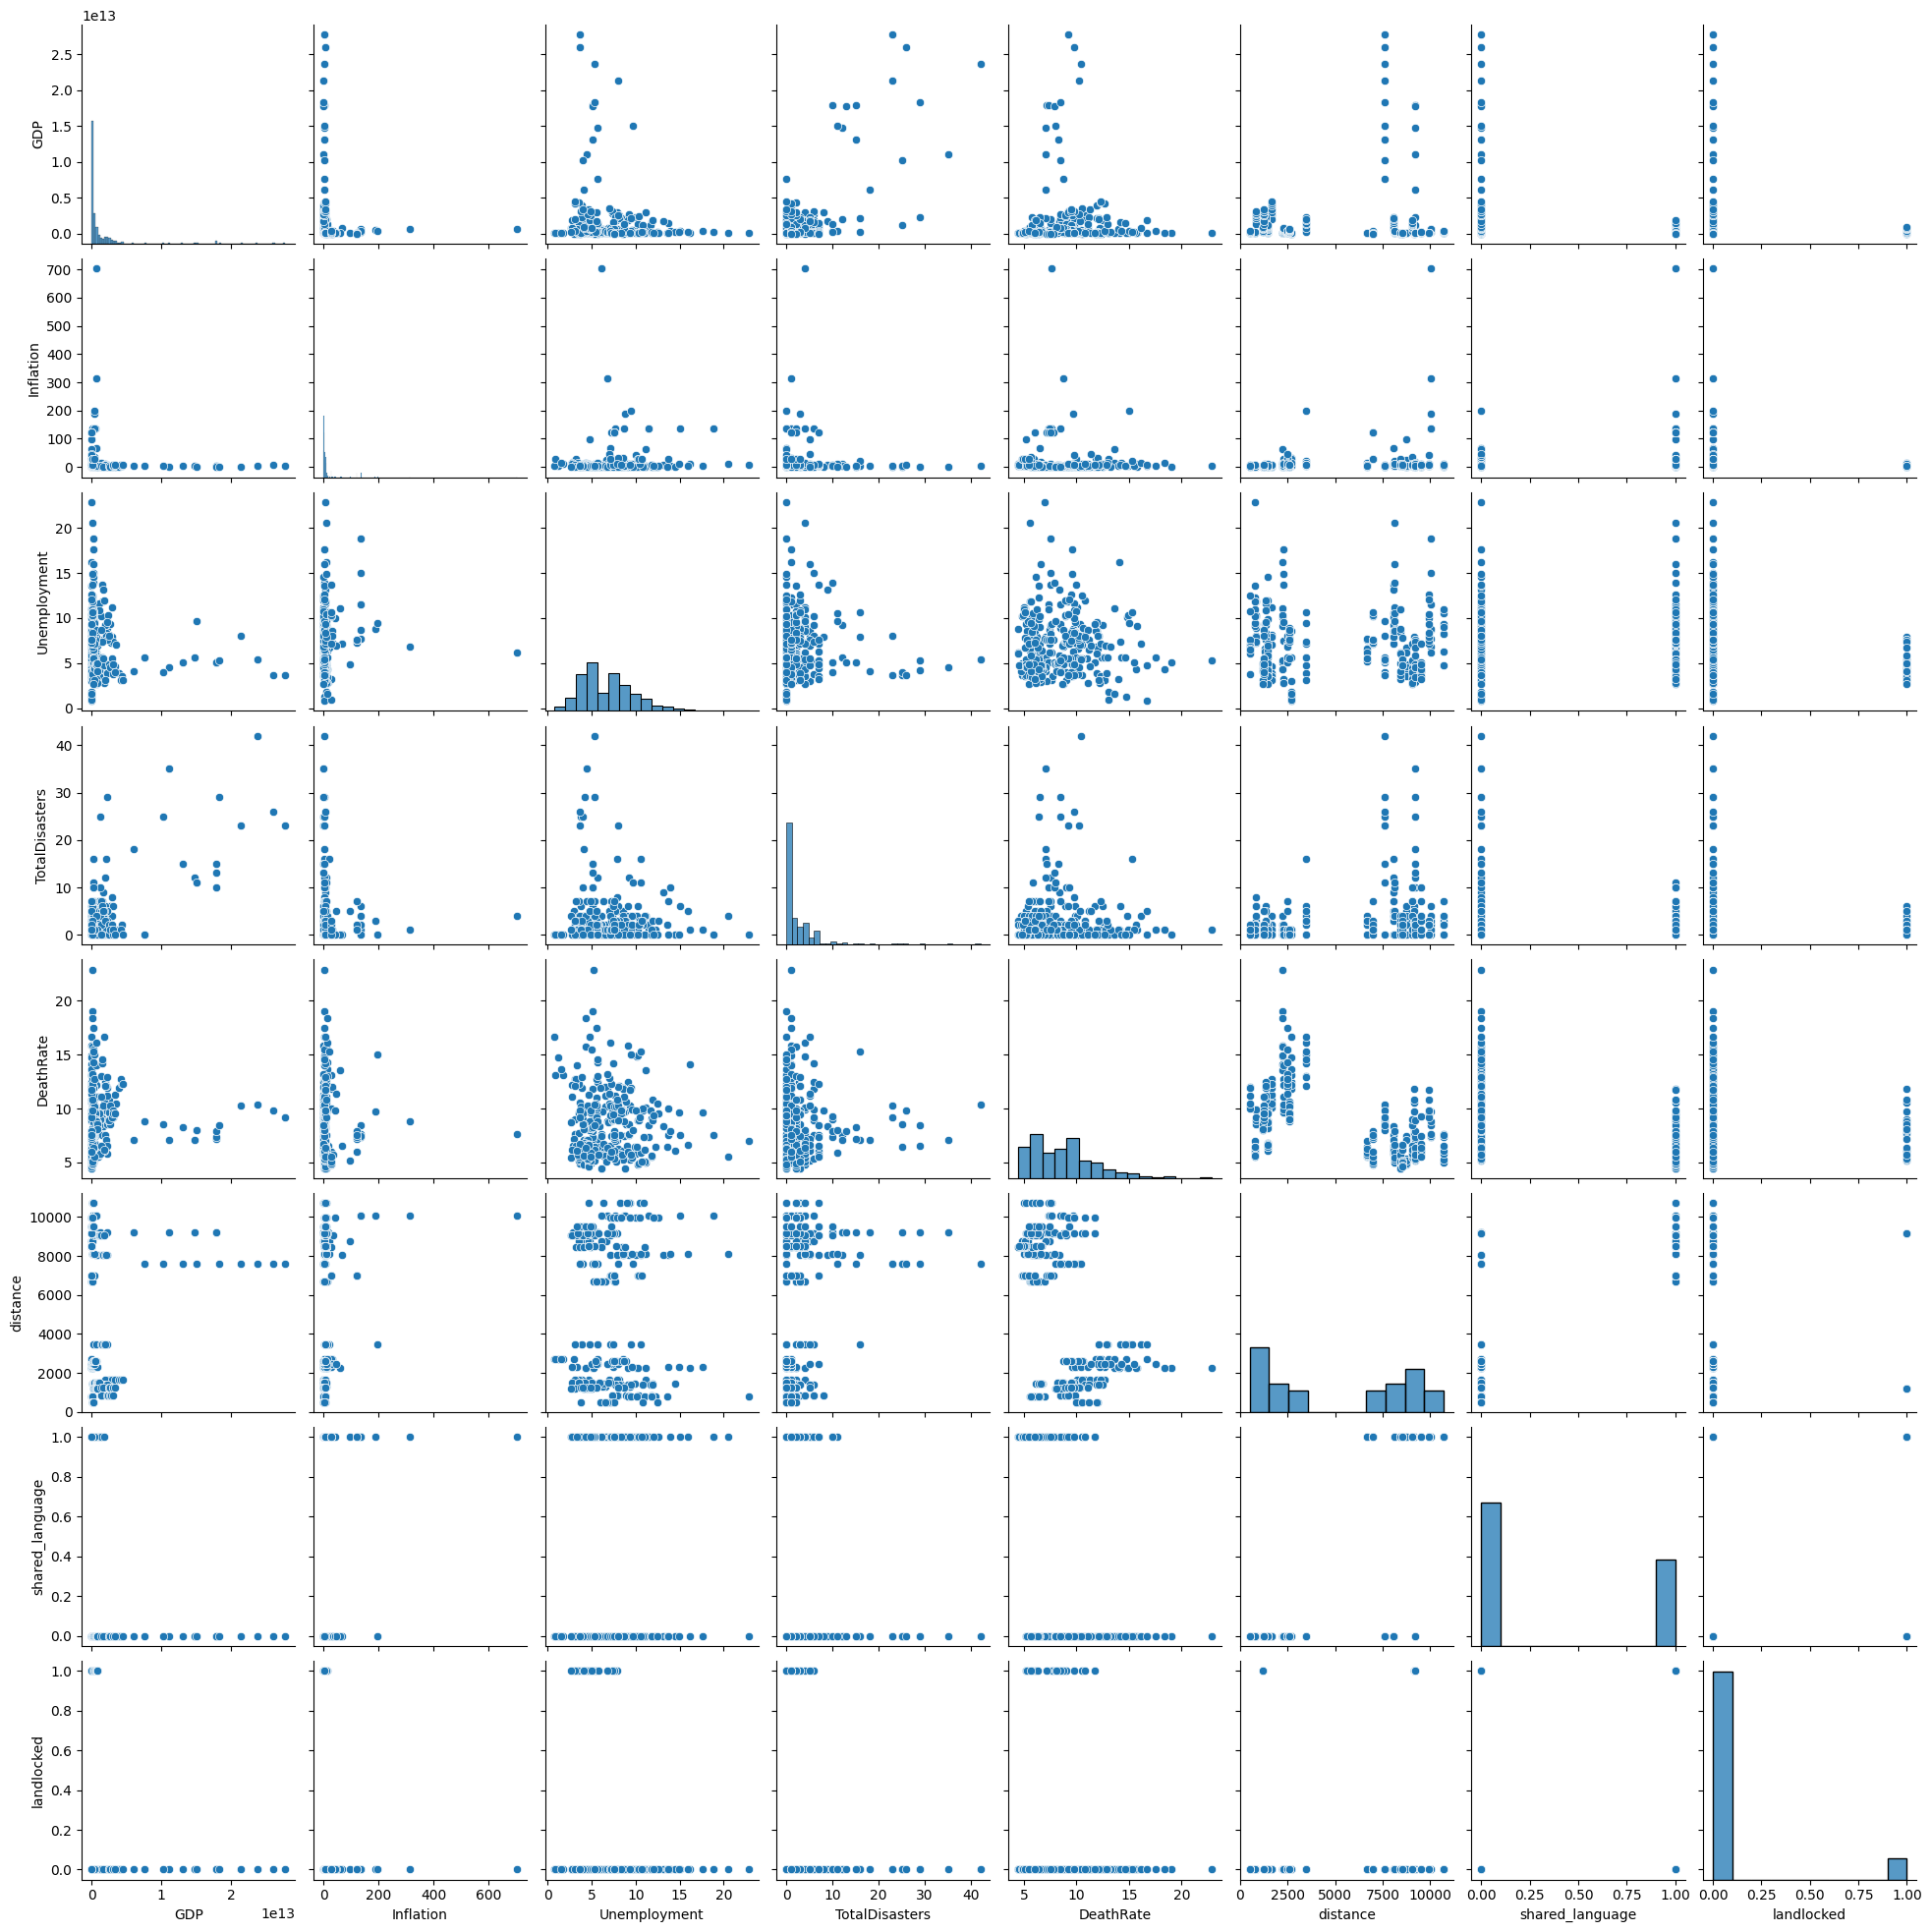

In [ ]:
# Pairplot for all continuous and integer variables
numeric_features = ["GDP", "Inflation", "Unemployment", "TotalDisasters", "DeathRate","distance", "shared_language"]
categorical_features = ["landlocked", "main_language"]
sns.pairplot(df_cleaned_both[numeric_features+categorical_features])
plt.show()

None important information can be seen here so lets analize using individual plots against migration rate

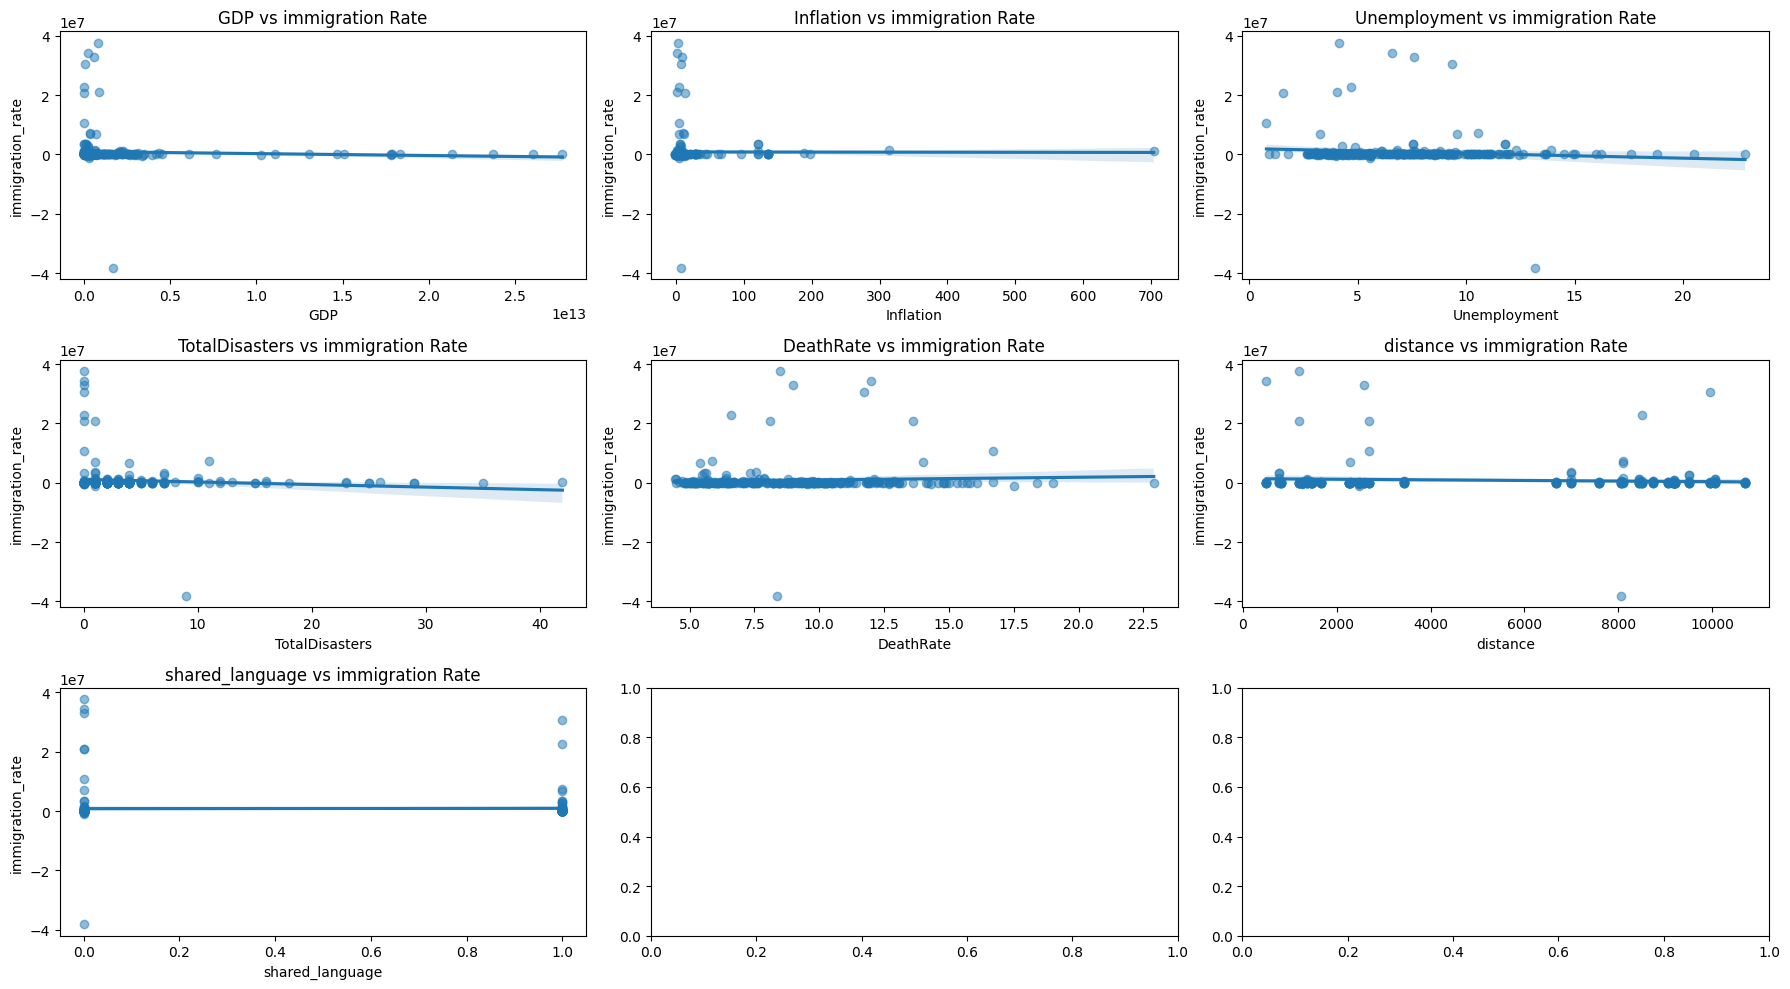

In [ ]:
# Plot each numeric feature against immigration_rate
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.regplot(data=df_cleaned_both, x=feature, y="immigration_rate", ax=axes[i], scatter_kws={"alpha": 0.5})
    axes[i].set_title(f"{feature} vs immigration Rate")

plt.tight_layout()
plt.show()

Doesnt seems to be clear relation between parameters and immigration rate

<ipython-input-4469-344b45a163ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="immigration_rate", ax=axes[i], palette="pastel")
<ipython-input-4469-344b45a163ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="immigration_rate", ax=axes[i], palette="pastel")


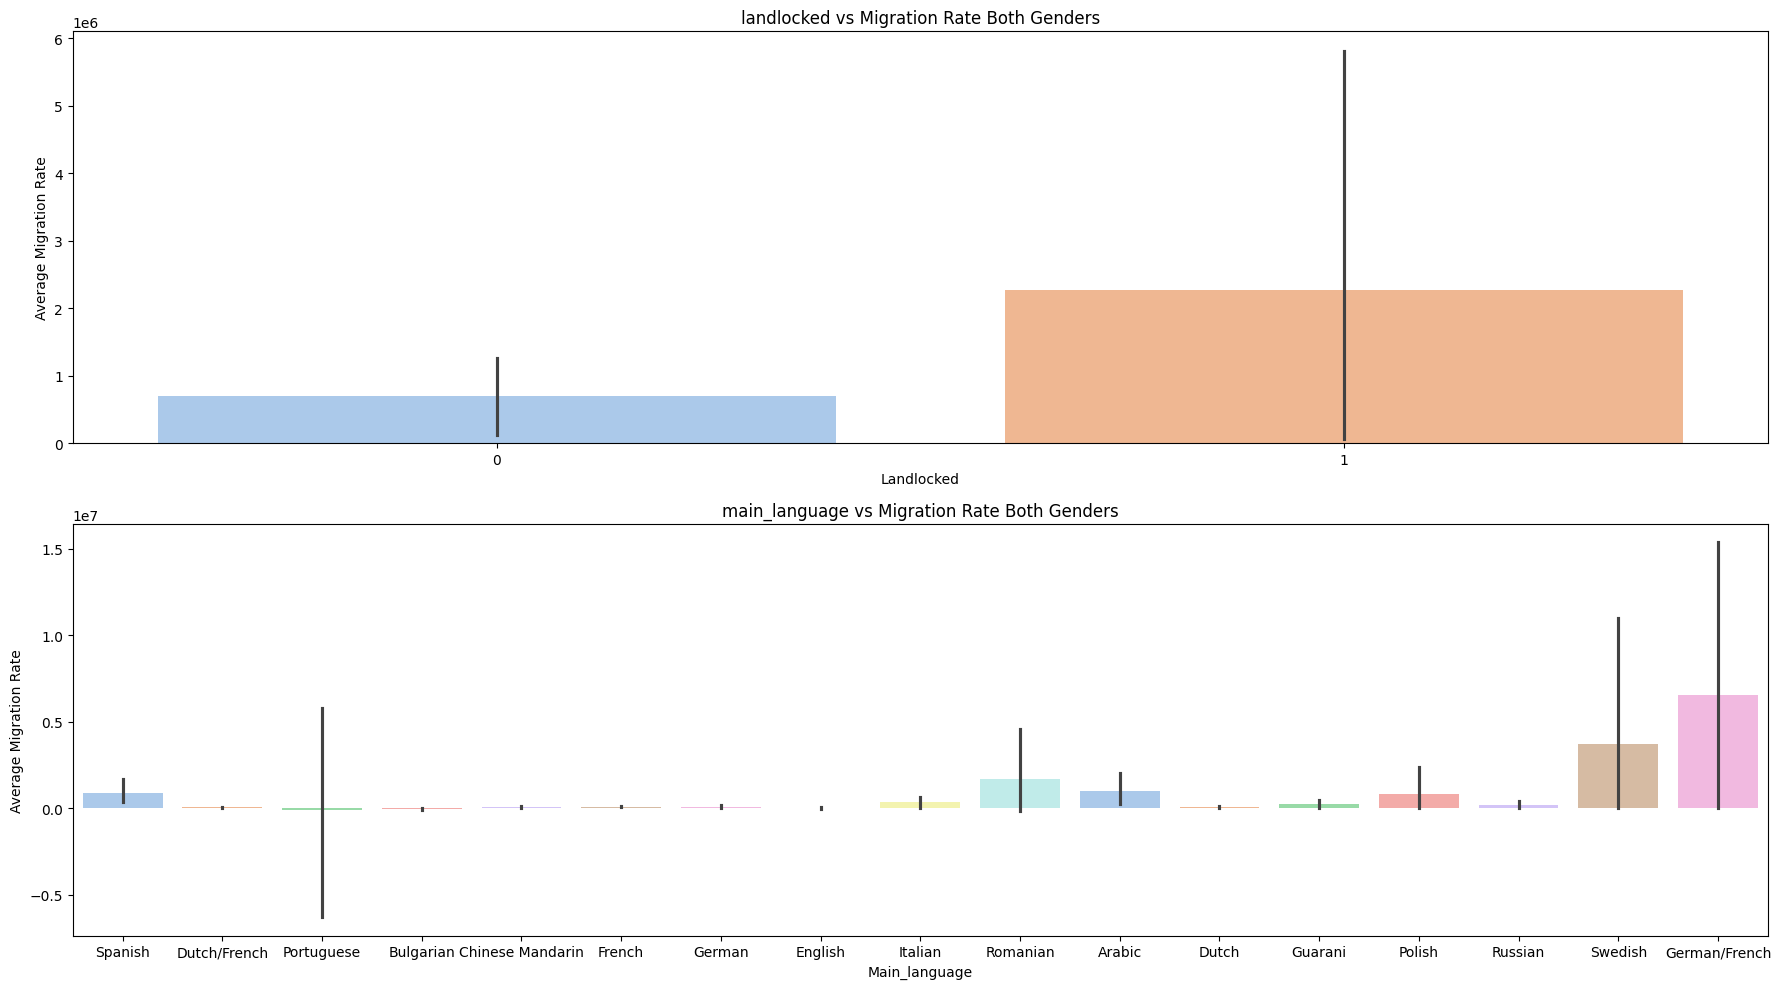

<ipython-input-4469-344b45a163ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="immigration_rate", ax=axes[i], palette="pastel")
<ipython-input-4469-344b45a163ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="immigration_rate", ax=axes[i], palette="pastel")


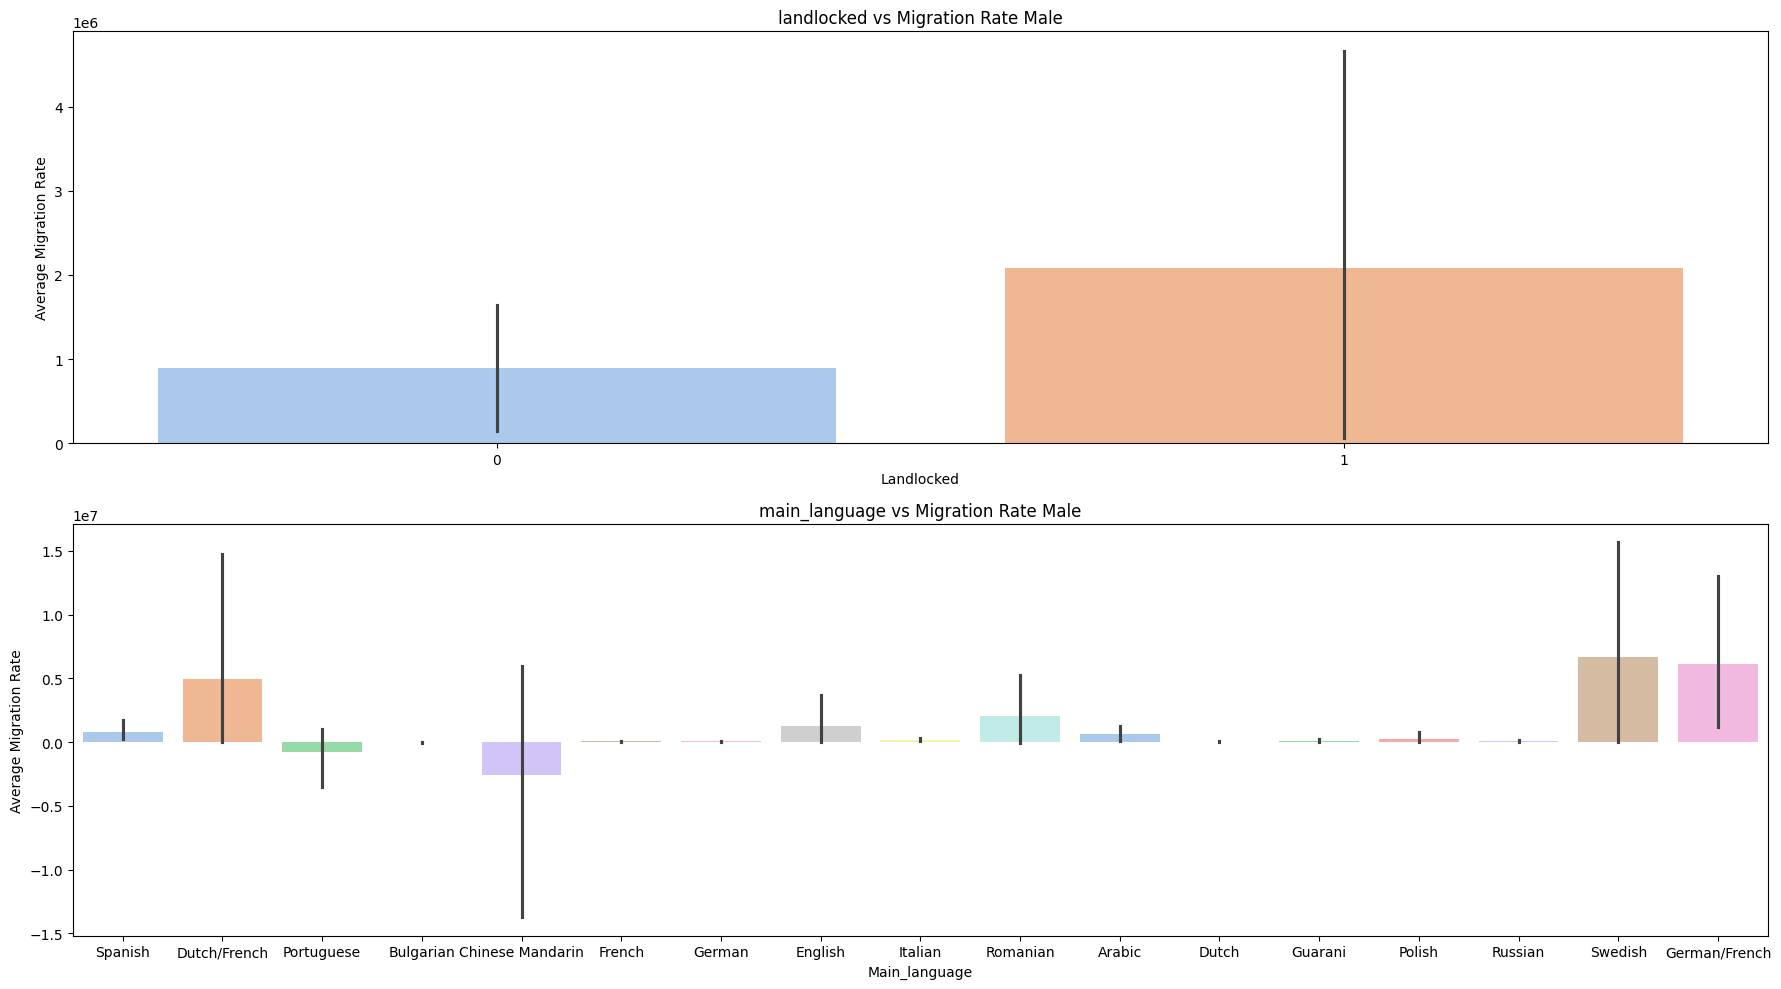

<ipython-input-4469-344b45a163ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="immigration_rate", ax=axes[i], palette="pastel")
<ipython-input-4469-344b45a163ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y="immigration_rate", ax=axes[i], palette="pastel")


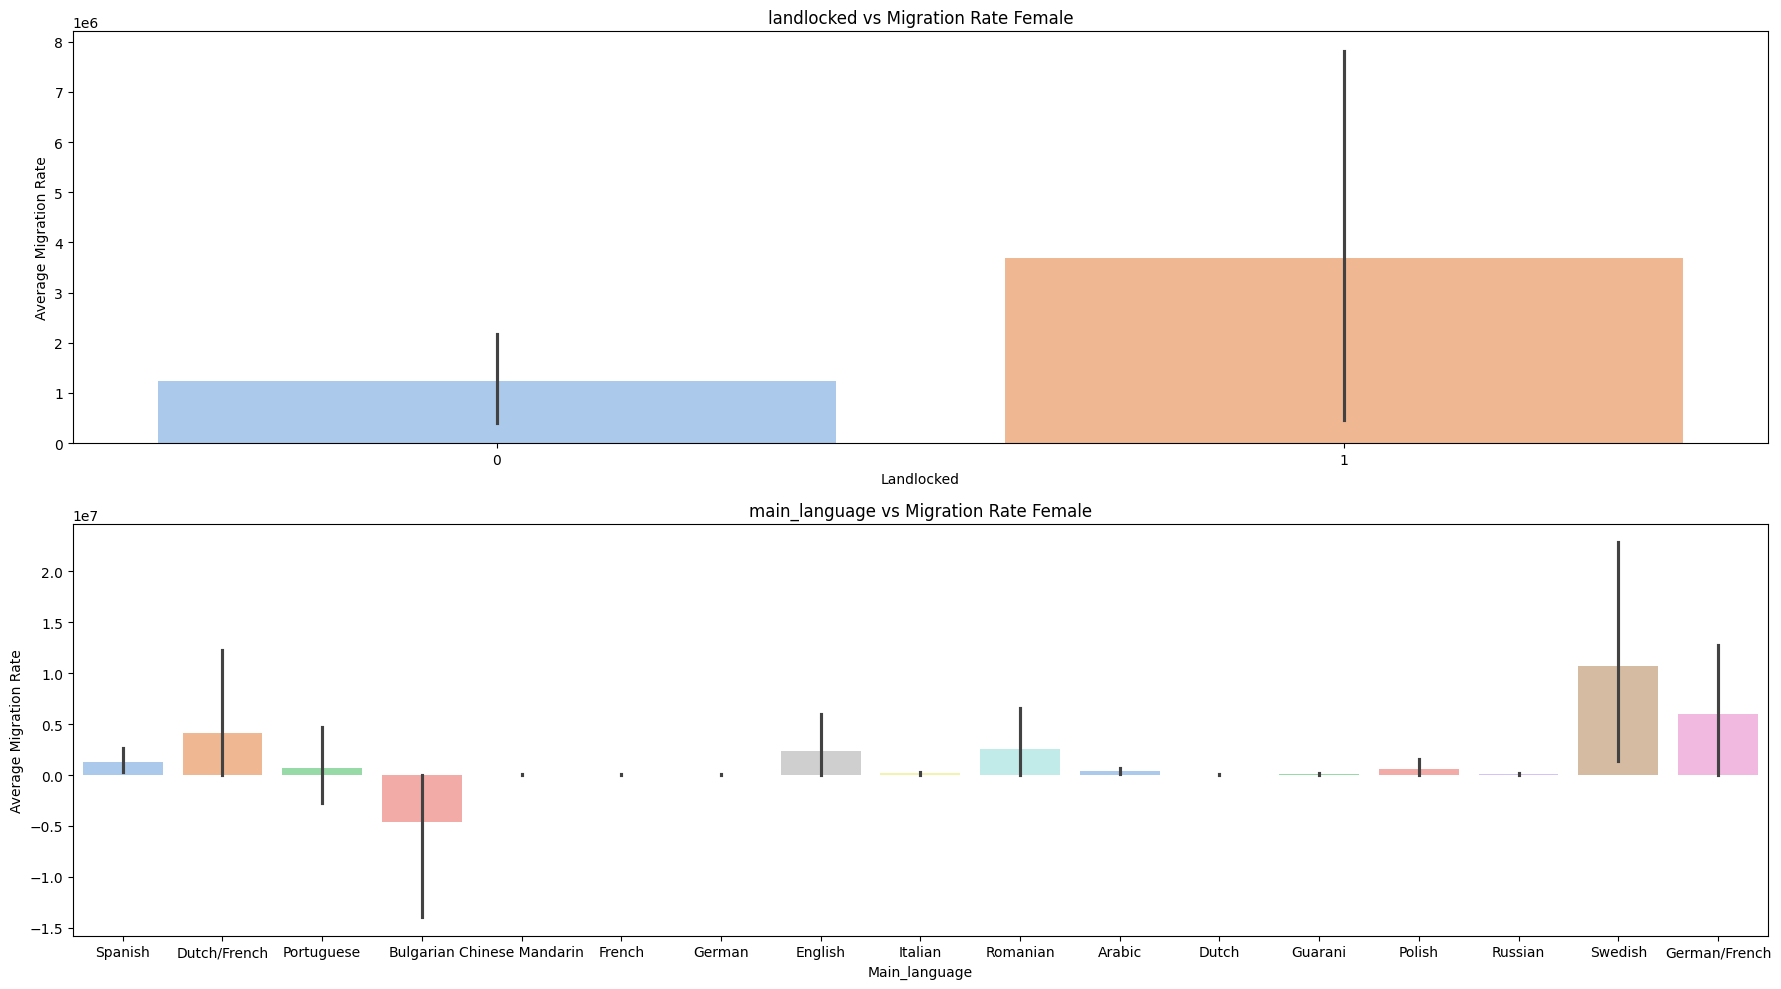

In [ ]:
def print_barplot(df, subcat):
  fig, axes = plt.subplots(2, 1, figsize=(18, 10))
  # Loop through each categorical feature
  for i, feature in enumerate(categorical_features):
      sns.barplot(data=df, x=feature, y="immigration_rate", ax=axes[i], palette="pastel")
      axes[i].set_title(f"{feature} vs Migration Rate {subcat}")
      axes[i].set_ylabel("Average Migration Rate")
      axes[i].set_xlabel(feature.capitalize())

  plt.tight_layout()
  plt.show()
print_barplot(df_cleaned_both,"Both Genders")
print_barplot(df_cleaned_male, "Male")
print_barplot(df_cleaned_female, "Female")

As shown in the previous image, the most commonly spoken language among immigrants in Spain is Arabic.

# Model 1: Linear regression

In [ ]:
df_cleaned_both[df_cleaned_both["Country Code"] == "ARG"]

Country Name Country Code  Year           GDP   Inflation  Unemployment  \
0     Argentina          ARG  1995  2.580318e+11  136.167944      18.80000   
3     Argentina          ARG  2000  2.842038e+11  136.167944      15.00000   
6     Argentina          ARG  2005  1.987371e+11  136.167944      11.50600   
9     Argentina          ARG  2010  4.236274e+11  136.167944       7.71400   
12    Argentina          ARG  2015  5.947493e+11  136.167944       8.65075   
15    Argentina          ARG  2020  3.857405e+11  136.167944      11.46100   
18    Argentina          ARG  2021  4.865641e+11  188.643290       8.73600   
21    Argentina          ARG  2022  6.327901e+11  314.030585       6.80500   
24    Argentina          ARG  2023  6.460753e+11  703.901713       6.13900   

    TotalDisasters  DeathRate  code  landlocked main_language  \
0              0.0      7.562    32           0       Spanish   
3              6.0      7.570    32           0       Spanish   
6              1.0      7.386    32           0       Spanish   
9              0.0      7.625    32           0       Spanish   
12             4.0      7.449    32           0       Spanish   
15             2.0      8.450    32           0       Spanish   
18             3.0      9.725    32           0       Spanish   
21             1.0      8.797    32           0       Spanish   
24             4.0      7.668    32           0       Spanish   

    immigration_rate gender      distance  shared_language  
0          70222.000   both  10058.444261                1  
3          64609.000   both  10058.444261                1  
6         177789.000   both  10058.444261                1  
9          55308.000   both  10058.444261                1  
12         -7530.000   both  10058.444261                1  
15         64074.000   both  10058.444261                1  
18        548901.600   both  10058.444261                1  
21       1335172.215   both  10058.444261                1  
24       1258765.200   both  10058.444261                1

## Model plot function

In [ ]:
def plot_real_vs_predicted(model_pipeline, df, country_code, numeric_features, categorical_features, target="immigration_rate"):
    df = df.copy()
    df_country = df[df["Country Code"] == country_code].copy()
    if df_country.empty:
        print(f"No data available for country code: {country_code}")
        return

    X_country = df_country[numeric_features + categorical_features]
    y_real = df_country[target]
    y_pred = model_pipeline.predict(X_country)

    plt.figure(figsize=(10, 6))
    plt.plot(df_country["Year"], y_real, marker='o', label="Real Immigration Rate")
    plt.plot(df_country["Year"], y_pred, marker='x', label="Predicted Immigration Rate")
    plt.title(f"Real vs Predicted Immigration Rate for {country_code}")
    plt.xlabel("Year")
    plt.ylabel("Immigration Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


using one hot encoder for the main language, standardscaler for the numeric values

RMSE in both dataset is: 7229273.62
R² Score in both dataset is: -0.05
--//--
RMSE in male dataset is: 7229273.62
R² Score in male dataset is: -0.05
--//--
RMSE in female dataset is: 7229273.62
R² Score in female dataset is: -0.05


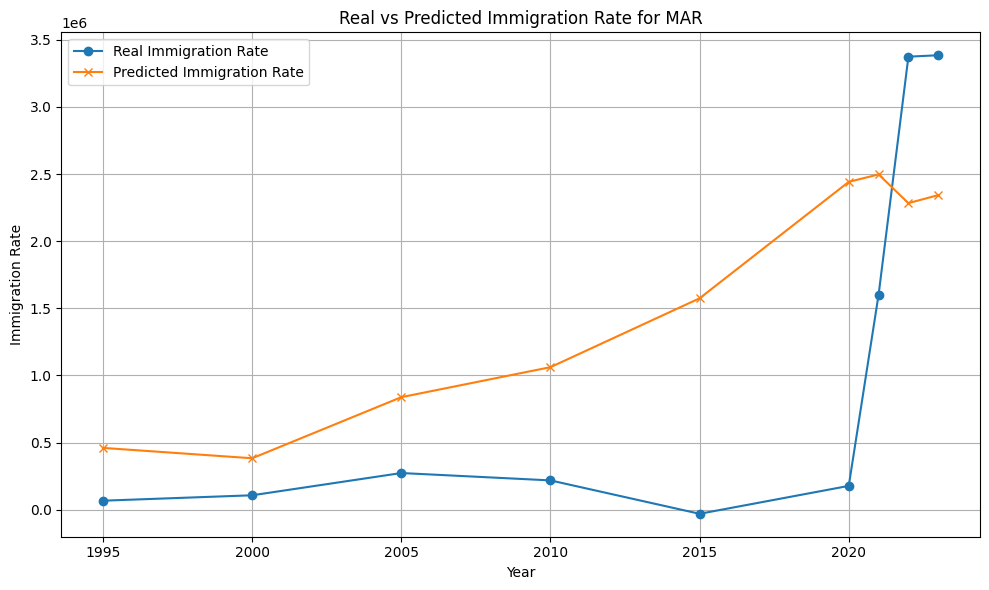

In [ ]:
# Features and target
numeric_features = ["GDP", "Inflation", "Unemployment", "TotalDisasters", "DeathRate",  "distance", "landlocked", "Year", "shared_language"]
categorical_features = ["Country Code"]
target = "immigration_rate"

def linearRegression_model(df, cat):
  df = df.copy()

  # Column-wise transformer
  ml_preprocessor = ColumnTransformer([
      ("num", StandardScaler(), numeric_features),
      ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ])

  # Final ML pipeline for lineal regresion
  full_pipeline_lr = Pipeline([
      ("ml_preprocessing", ml_preprocessor),
      ("regressor", LinearRegression())
  ])

  # Define X and y
  X = df[numeric_features + categorical_features]
  y = df["immigration_rate"]

  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Fit the full pipeline
  full_pipeline_lr.fit(X_train, y_train)


  # Predict
  y_pred = full_pipeline_lr.predict(X_test)

  # Evaluate
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  print(f"RMSE in {cat} dataset is: {rmse:.2f}")
  print(f"R² Score in {cat} dataset is: {r2:.2f}")
  return full_pipeline_lr, rmse, r2

lr1=linearRegression_model(df_cleaned_both, "both")
print("--//--")
lr2=linearRegression_model(df_cleaned_both, "male")
print("--//--")
lr3=linearRegression_model(df_cleaned_both, "female")
plot_real_vs_predicted(lr1[0], df_cleaned_both, "MAR", numeric_features, categorical_features)

As shown in the results the model performance is very poor predicting the immigration rate , lets try with one country to see if results change

ARG
RMSE in both dataset is: 672695.85
R² Score in both dataset is: -0.12
--//--
BEL
RMSE in both dataset is: 2439686.81
R² Score in both dataset is: -1356.62
--//--
BOL
RMSE in both dataset is: 387533.76
R² Score in both dataset is: -10.89
--//--
BRA
RMSE in both dataset is: 46377080.68
R² Score in both dataset is: -25457.08
--//--
BGR
RMSE in both dataset is: 38198.35
R² Score in both dataset is: 0.69
--//--
CHL
RMSE in both dataset is: 81919.02
R² Score in both dataset is: 0.59
--//--
CHN
RMSE in both dataset is: 177536.30
R² Score in both dataset is: -17.75
--//--
COL
RMSE in both dataset is: 6946544.47
R² Score in both dataset is: -2.74
--//--
DOM
RMSE in both dataset is: 365359.49
R² Score in both dataset is: -4.34
--//--
ECU
RMSE in both dataset is: 8676419.26
R² Score in both dataset is: -1472.23
--//--
FRA
RMSE in both dataset is: 202428.56
R² Score in both dataset is: -5.30
--//--
DEU
RMSE in both dataset is: 63569.86
R² Score in both dataset is: 0.75
--//--
HND
RMSE in both 

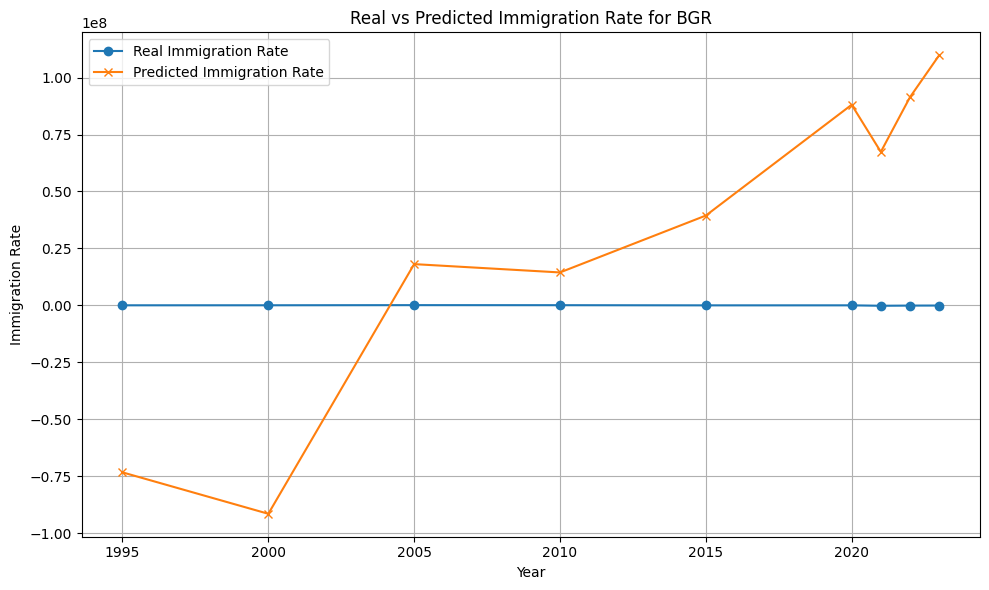

In [ ]:
countries_list = df_cleaned_both["Country Code"].unique()
best_model = None
best_rmse = float('inf')
country_lr = None
for country in countries_list:
  print(country)
  model_lr, rmse, r2 = linearRegression_model(df_cleaned_both[df_cleaned_both["Country Code"] == country], "both")
  if rmse < best_rmse:
    best_model = model
    best_rmse = rmse
    country_lr = country
  print("--//--")
plot_real_vs_predicted(model_lr, df_cleaned_both, country_lr, numeric_features, categorical_features)

In some cases linear regressions seems to have better performance for some countries, like {} while others like {} have very bad performance, however Since in each iteracion all genders have same performance from future models lets focus only in one (both genders)

# Model 2: Random forest

Random Forest RMSE in both dataset is: 7066020.86
Random Forest R² Score in both dataset is: 0.00
Random Forest RMSE in male dataset is: 7066020.86
Random Forest R² Score in male dataset is: 0.00
Random Forest RMSE in female dataset is: 7066020.86
Random Forest R² Score in female dataset is: 0.00


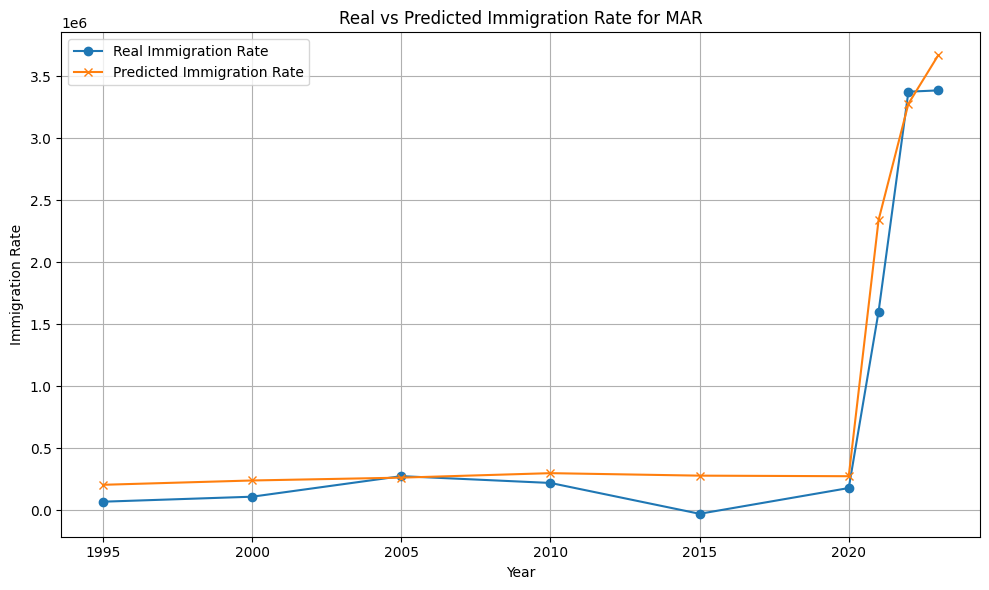

In [ ]:
def randomForest_model(df, cat):
  df = df.copy()
  # Column-wise transformer
  ml_preprocessor_rf = ColumnTransformer([
      ("num", StandardScaler(), numeric_features),
      ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ])

  # Full pipeline with Random Forest
  full_pipeline_rf = Pipeline([
      ("ml_preprocessing", ml_preprocessor_rf),
      ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
  ])

  # Define X and y
  X = df_cleaned_both[numeric_features + categorical_features]
  y = df_cleaned_both[target]

  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train the pipeline
  full_pipeline_rf.fit(X_train, y_train)

  # Predict
  y_pred_rf = full_pipeline_rf.predict(X_test)

  # Evaluate
  rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
  r2_rf = r2_score(y_test, y_pred_rf)

  print(f"Random Forest RMSE in {cat} dataset is: {rmse:.2f}")
  print(f"Random Forest R² Score in {cat} dataset is: {r2_rf:.2f}")
  return full_pipeline_rf, rmse, r2_rf

trf1=randomForest_model(df_cleaned_both, "both")
trf2=randomForest_model(df_cleaned_both, "male")
trf3=randomForest_model(df_cleaned_both, "female")
plot_real_vs_predicted(trf1[0], df_cleaned_both, "MAR", numeric_features, categorical_features)

RMSE (Root Mean Squared Error): 7066,020.86
This means that the predictions of immigration rate are off by an average of 113,000 units — quite a large error, especially if immigration rates are generally smaller numbers.

R² Score: 0.00
This is a very poor score.

ARG
Random Forest RMSE in both dataset is: 7066020.86
Random Forest R² Score in both dataset is: 0.00
--//--
BEL
Random Forest RMSE in both dataset is: 7066020.86
Random Forest R² Score in both dataset is: 0.00
--//--
BOL
Random Forest RMSE in both dataset is: 7066020.86
Random Forest R² Score in both dataset is: 0.00
--//--
BRA
Random Forest RMSE in both dataset is: 7066020.86
Random Forest R² Score in both dataset is: 0.00
--//--
BGR
Random Forest RMSE in both dataset is: 7066020.86
Random Forest R² Score in both dataset is: 0.00
--//--
CHL
Random Forest RMSE in both dataset is: 7066020.86
Random Forest R² Score in both dataset is: 0.00
--//--
CHN
Random Forest RMSE in both dataset is: 7066020.86
Random Forest R² Score in both dataset is: 0.00
--//--
COL
Random Forest RMSE in both dataset is: 7066020.86
Random Forest R² Score in both dataset is: 0.00
--//--
DOM
Random Forest RMSE in both dataset is: 7066020.86
Random Forest R² Score in both dataset is: 0.00
--//--
ECU
Random Forest R

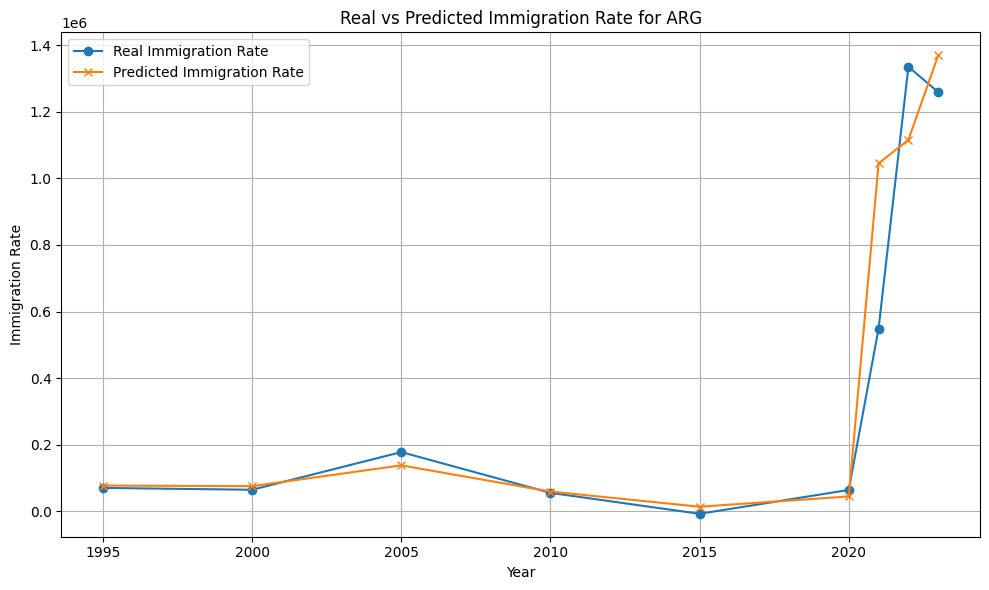

In [ ]:
best_model_rf = None
best_rmse_rf = float('inf')
best_r2_rf = float('inf')
country_rf = None
for country in countries_list:
  print(country)
  model_rf, rmse, r2 = randomForest_model(df_cleaned_both[df_cleaned_both["Country Code"] == country], "both")
  if rmse < best_rmse_rf:
    best_model_rf = model_rf
    best_rmse_rf = rmse
    best_r2_rf = r2
    country_rf = country
  print("--//--")
plot_real_vs_predicted(best_model_rf, df_cleaned_both, country_rf, numeric_features, categorical_features)

Different from linear regression random forest seems to have the same perform into all the countries

# Model 3: XGBoost

XGBoost RMSE of both dataset is: 57606664283806.58
XGBoost R² Score of both dataset is: -0.15
XGBoost RMSE of male dataset is: 57606664283806.58
XGBoost R² Score of male dataset is: -0.15
XGBoost RMSE of female dataset is: 57606664283806.58
XGBoost R² Score of female dataset is: -0.15


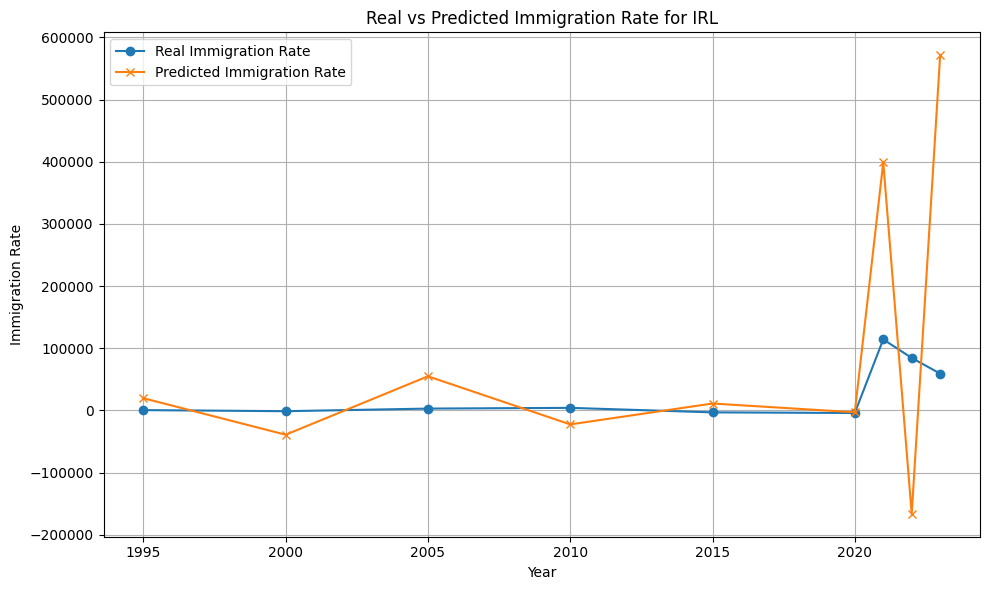

In [ ]:
def xgboost_model(df, cat):
  # Column-wise transformer
  ml_preprocessor = ColumnTransformer([
      ("num", StandardScaler(), numeric_features),
      ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
  ])

  # Final ML pipeline for XGBoost
  full_pipeline_xgb = Pipeline([
      ("ml_preprocessing", ml_preprocessor),
      ("regressor", XGBRegressor(
          n_estimators=100,
          learning_rate=0.1,
          max_depth=4,
          random_state=42,
          objective='reg:squarederror'
      ))
  ])

  # Define X and y
  X = df[numeric_features + categorical_features]
  y = df[target]

  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Fit the pipeline
  full_pipeline_xgb.fit(X_train, y_train)

  # Predict and evaluate
  y_pred = full_pipeline_xgb.predict(X_test)
  rmse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"XGBoost RMSE of {cat} dataset is: {rmse:.2f}")
  print(f"XGBoost R² Score of {cat} dataset is: {r2:.2f}")
  return full_pipeline_xgb, rmse, r2

txgb1=xgboost_model(df_cleaned_both, "both")
txgb2=xgboost_model(df_cleaned_both, "male")
txgb3=xgboost_model(df_cleaned_both, "female")
plot_real_vs_predicted(txgb1[0], df_cleaned_both, "IRL", numeric_features, categorical_features)

As seen before xgboost has better perfom than random forest based on the r2, lets try doing it into each country

ARG
XGBoost RMSE of both dataset is: 3380047664.91
XGBoost R² Score of both dataset is: 0.99
--//--
BEL
XGBoost RMSE of both dataset is: 5265844428.58
XGBoost R² Score of both dataset is: -0.20
--//--
BOL
XGBoost RMSE of both dataset is: 39974640038.48
XGBoost R² Score of both dataset is: -2.17
--//--
BRA
XGBoost RMSE of both dataset is: 10363745573.78
XGBoost R² Score of both dataset is: 0.88
--//--
BGR
XGBoost RMSE of both dataset is: 3228343492.89
XGBoost R² Score of both dataset is: 0.32
--//--
CHL
XGBoost RMSE of both dataset is: 38039445780.13
XGBoost R² Score of both dataset is: -1.30
--//--
CHN
XGBoost RMSE of both dataset is: 54099702867.88
XGBoost R² Score of both dataset is: -31.18
--//--
COL
XGBoost RMSE of both dataset is: 15938428397326.93
XGBoost R² Score of both dataset is: -0.24
--//--
DOM
XGBoost RMSE of both dataset is: 11776559658.00
XGBoost R² Score of both dataset is: 0.53
--//--
ECU
XGBoost RMSE of both dataset is: 131612884960.63
XGBoost R² Score of both dataset

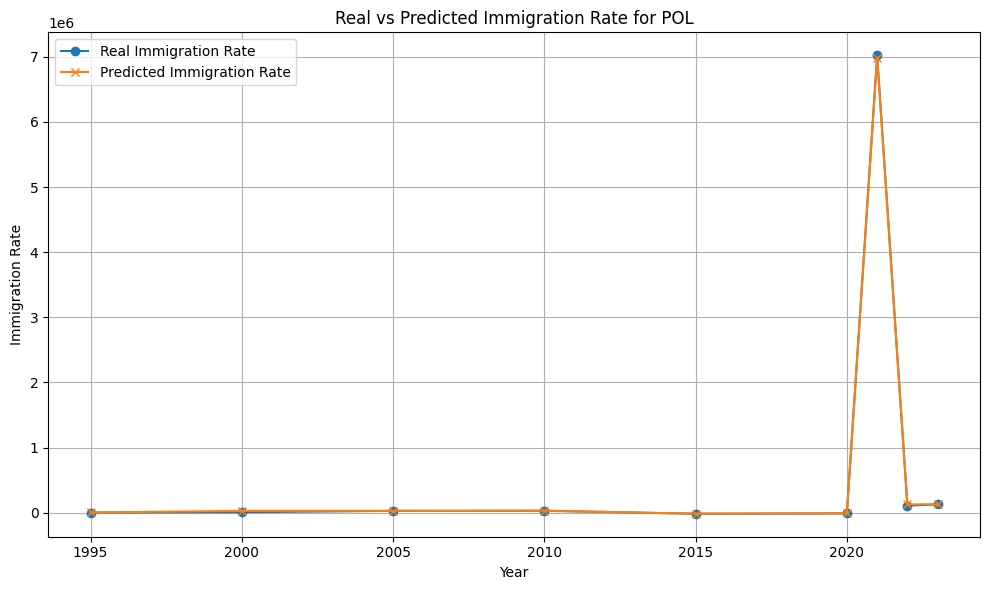

In [ ]:
best_model_xgb = None
best_rmse_xgb = float('inf')
best_r2_xgb = float('inf')
country_xgb = None
for country in countries_list:
  print(country)
  model_xgb, rmse, r2 = xgboost_model(df_cleaned_both[df_cleaned_both["Country Code"] == country], "both")
  if rmse < best_rmse_xgb:
    best_model_xgb = model_xgb
    best_rmse_xgb = rmse
    best_r2_xgb = r2
    country_xgb = country
  print("--//--")
plot_real_vs_predicted(best_model_xgb, df_cleaned_both, country_xgb, numeric_features, categorical_features)

while R2 perfoms very good in some cases as Venezuela RMS still too high what means the model fails to capture the underlying patterns and makes inaccurate predictions.

# Model 4: MLP Neural Network

MLP RMSE in both df is: 49945577481172.74
MLP R² Score in both df is: -0.00
MLP RMSE in male df is: 49945577481172.74
MLP R² Score in male df is: -0.00
MLP RMSE in female df is: 49945577481172.74
MLP R² Score in female df is: -0.00


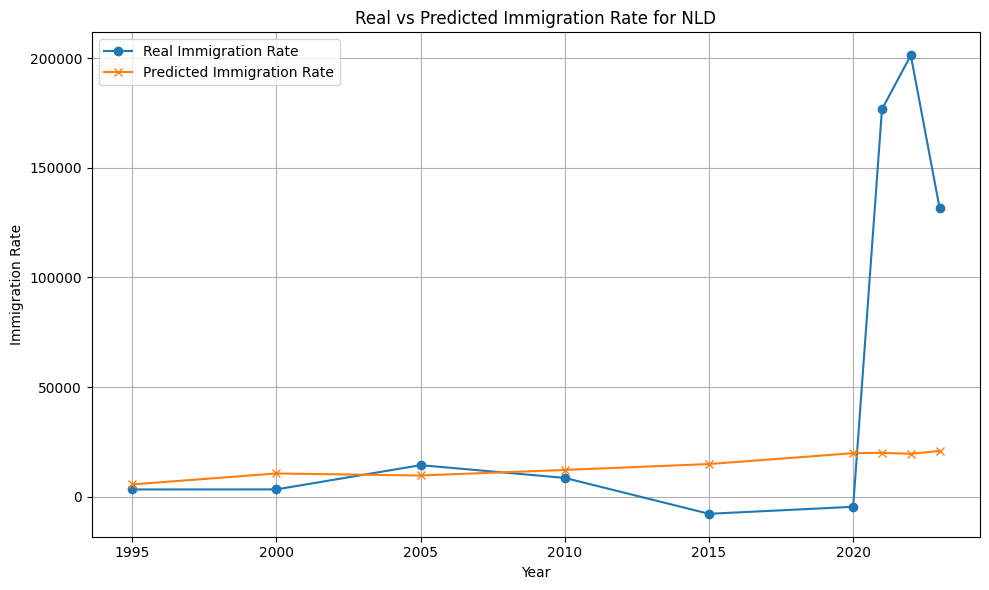

In [ ]:
def MLP_neural(df, cat):

  # Preprocessor
  mlp_preprocessor = ColumnTransformer([
      ("num", StandardScaler(), numeric_features),
      ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
  ])

  # MLP pipeline
  mlp_pipeline = Pipeline([
      ("preprocessing", mlp_preprocessor),
      ("mlp", MLPRegressor(hidden_layer_sizes=(50, 10),
                          activation='relu',
                          solver='adam',
                          max_iter=1000,
                          random_state=42))
  ])
  warnings.filterwarnings("ignore", category=ConvergenceWarning)
  # Define X and y
  X = df[numeric_features + categorical_features]
  y = df[target]

  # Split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Fit
  mlp_pipeline.fit(X_train, y_train)

  # Predict
  y_pred = mlp_pipeline.predict(X_test)

  # Evaluate
  rmse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"MLP RMSE in {cat} df is: {rmse:.2f}")
  print(f"MLP R² Score in {cat} df is: {r2:.2f}")
  return mlp_pipeline, rmse, r2

mlpt1 = MLP_neural(df_cleaned_both, "both")
mlpt2 = MLP_neural(df_cleaned_both, "male")
mlpt3 = MLP_neural(df_cleaned_both, "female")
plot_real_vs_predicted(mlpt1[0], df_cleaned_both, "NLD", numeric_features, categorical_features)

As random forest MLP neuronal network performs with lower R2 and RMSE, lets try by country

ARG
MLP RMSE in both df is: 885123418217.89
MLP R² Score in both df is: -1.19
--//--
BEL
MLP RMSE in both df is: 7142789238.19
MLP R² Score in both df is: -0.63
--//--
BOL
MLP RMSE in both df is: 25561822662.56
MLP R² Score in both df is: -1.02
--//--
BRA
MLP RMSE in both df is: 180276041546.89
MLP R² Score in both df is: -1.13
--//--
BGR
MLP RMSE in both df is: 7576674245.24
MLP R² Score in both df is: -0.59
--//--
CHL
MLP RMSE in both df is: 32896929735.04
MLP R² Score in both df is: -0.99
--//--
CHN
MLP RMSE in both df is: 3808513078.43
MLP R² Score in both df is: -1.27
--//--
COL
MLP RMSE in both df is: 26366299142675.54
MLP R² Score in both df is: -1.04
--//--
DOM
MLP RMSE in both df is: 54412234984.11
MLP R² Score in both df is: -1.18
--//--
ECU
MLP RMSE in both df is: 163003555944.67
MLP R² Score in both df is: -2.19
--//--
FRA
MLP RMSE in both df is: 22231946801.69
MLP R² Score in both df is: -2.42
--//--
DEU
MLP RMSE in both df is: 38234481116.26
MLP R² Score in both df is: -1

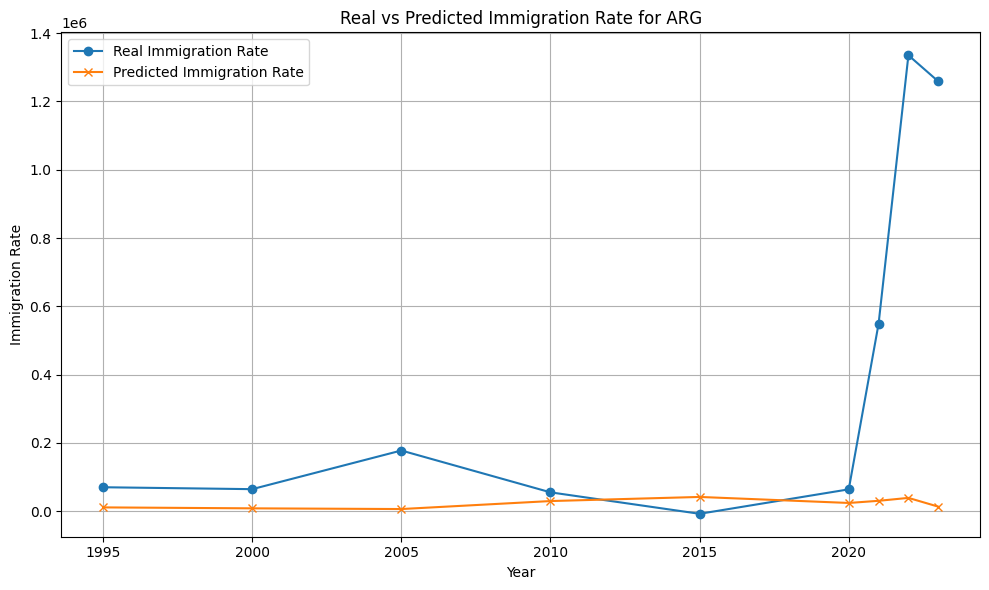

In [ ]:
best_model_mlp = None
best_rmse_mlp = float('inf')
best_r2_mlp = float('inf')
country_mlp = None
for country in countries_list:
  print(country)
  model_mlp, rmse, r2 = MLP_neural(df_cleaned_both[df_cleaned_both["Country Code"] == country], "both")
  if rmse < best_rmse_mlp:
    best_model_mlp = model_mlp
    best_rmse_mlp = rmse
    best_r2_mlp = r2
    country_mlp = country
  print("--//--")
plot_real_vs_predicted(best_model_mlp, df_cleaned_both, "ARG", numeric_features, categorical_features)

As seen before the neuronal network perfoms very bad when is applied only in countries

# Time series

In [ ]:
df_cleaned_both[df_cleaned_both["Country Code"] == "VEN" ]

Country Name Country Code  Year           GDP   Inflation  Unemployment  \
891  Venezuela, RB          VEN  1995  7.738949e+10   28.187465      10.24000   
894  Venezuela, RB          VEN  2000  1.171465e+11   28.187465      10.34575   
897  Venezuela, RB          VEN  2005  1.455135e+11   28.187465      10.66300   
900  Venezuela, RB          VEN  2010  3.931924e+11   28.187465       7.11200   
903  Venezuela, RB          VEN  2015  1.124031e+10  121.738085       7.21650   
906  Venezuela, RB          VEN  2020  3.722340e+09  121.738085       7.53000   
909  Venezuela, RB          VEN  2021  3.959797e+09  121.738085       7.53000   
912  Venezuela, RB          VEN  2022  4.585614e+09  121.738085       7.53000   
915  Venezuela, RB          VEN  2023  4.925466e+09  121.738085       7.53000   

     TotalDisasters  DeathRate  code  landlocked main_language  \
891             0.0      4.813   862           0       Spanish   
894             2.0      4.934   862           0       Spanish   
897             3.0      5.078   862           0       Spanish   
900             1.0      5.512   862           0       Spanish   
903             1.0      6.026   862           0       Spanish   
906             1.0      7.202   862           0       Spanish   
909             2.0      7.862   862           0       Spanish   
912             7.0      7.347   862           0       Spanish   
915             1.0      7.560   862           0       Spanish   

     immigration_rate gender     distance  shared_language  
891          26950.00   both  6986.768887                1  
894          27070.00   both  6986.768887                1  
897          51596.00   both  6986.768887                1  
900          38607.00   both  6986.768887                1  
903          16229.00   both  6986.768887                1  
906         235657.00   both  6986.768887                1  
909        1115786.75   both  6986.768887                1  
912        3432374.89   both  6986.768887                1  
915        3538586.20   both  6986.768887                1

## RNN

In [ ]:
# Sort data by country and year
df_sorted = df_cleaned_both.sort_values(by=["Country Name", "Year"])
# Select only relevant columns
features = ["GDP", "Inflation", "Unemployment", "TotalDisasters", "DeathRate", "distance", "landlocked", "shared_language"]
target = "immigration_rate"
group_col = "Country Name"
time_col = "Year"

scalers = {}
scaled_dfs = []

for country, group in df_sorted.groupby(group_col):
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(group[features])
    scalers[country] = scaler
    group_scaled = pd.DataFrame(scaled_features, columns=features, index=group.index)
    group_scaled[time_col] = group[time_col]
    group_scaled[target] = group[target].values
    group_scaled[group_col] = country
    scaled_dfs.append(group_scaled)

df_scaled = pd.concat(scaled_dfs).sort_values(by=[group_col, time_col])

Creating sequences lets use 3 yeras to predict next

In [ ]:
def create_sequences(data, seq_length=3):
    X, y = [], []
    for country, group in data.groupby(group_col):
        group = group.sort_values(time_col)
        for i in range(len(group) - seq_length):
            X_seq = group.iloc[i:i+seq_length][features].values
            y_val = group.iloc[i+seq_length][target]
            X.append(X_seq)
            y.append(y_val)
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(df_scaled, seq_length=4)

# Check shape: (samples, timesteps, features)
print(X_seq.shape)

(160, 4, 8)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

model.compile(optimizer='adam', loss='mae')
early_stop = EarlyStopping(patience=40, restore_best_weights=True)
history = model.fit(X_train, y_train_scaled, epochs=300, batch_size=16, validation_split=0.2,  callbacks=[early_stop], verbose=1)
y_pred_scaled  = model.predict(X_test).flatten()
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"RNN RMSE: {rmse:.2f}")
print(f"RNN R² Score: {r2:.2f}")


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.3809 - val_loss: 0.1907
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1667 - val_loss: 0.1003
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1563 - val_loss: 0.0769
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1017 - val_loss: 0.0738
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1011 - val_loss: 0.0644
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0910 - val_loss: 0.0531
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0817 - val_loss: 0.0541
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0786 - val_loss: 0.0464
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0822 - val_loss: 0.0439
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0727 - val_loss: 0.0481
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0650 - val_loss: 0.0469
Epoch 12/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0868 - val_loss: 0.0367
E

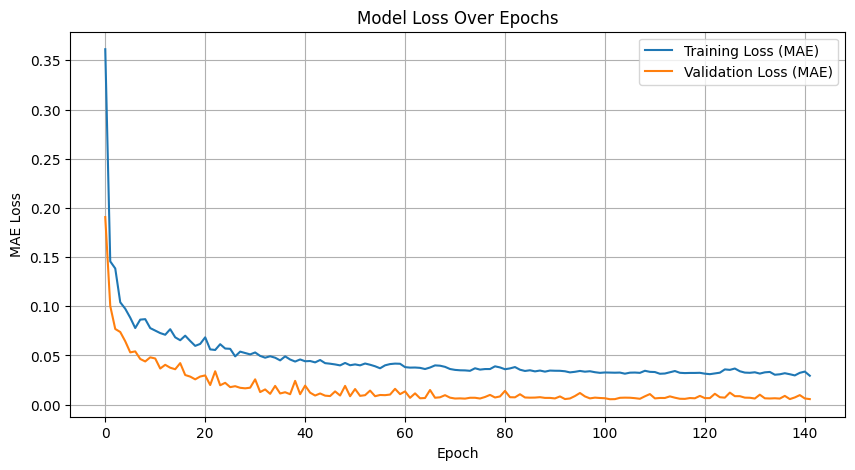

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss (MAE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MAE)')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


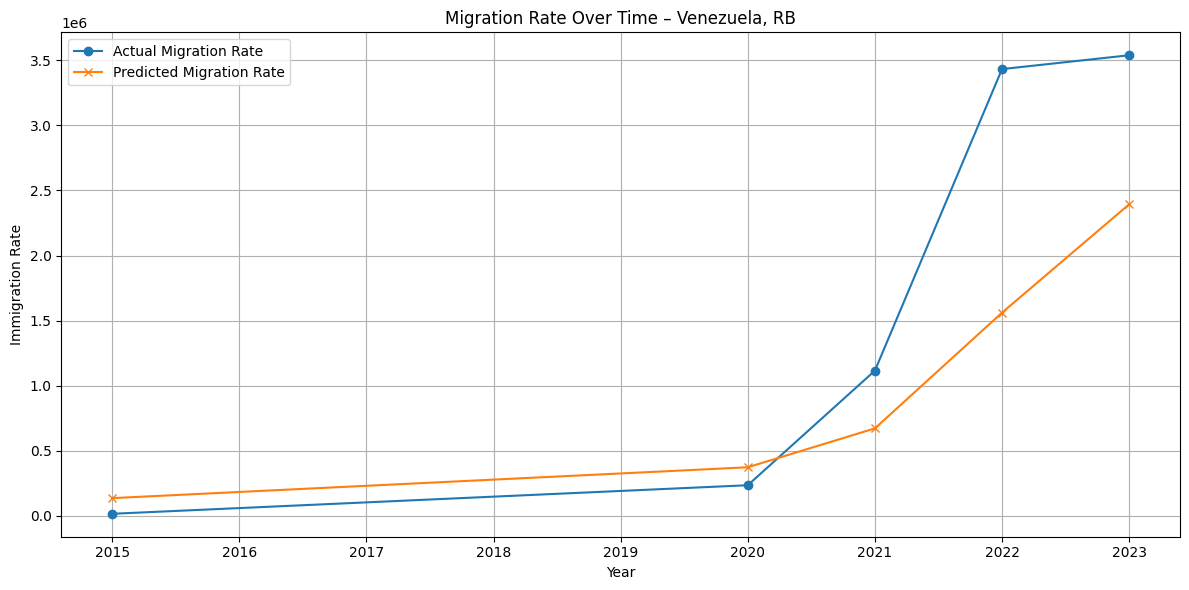

In [ ]:
# SETTINGS
selected_country = "Venezuela, RB"  # Change this to your desired country
seq_length = 4  # Same as used in your create_sequences()

# Filter original scaled dataframe
df_country = df_scaled[df_scaled["Country Name"] == selected_country].sort_values("Year")

# Create sequences manually for this country
X_country, y_country = [], []
years = []

for i in range(len(df_country) - seq_length):
    X_seq = df_country.iloc[i:i+seq_length][features].values
    y_val = df_country.iloc[i+seq_length][target]
    year_val = df_country.iloc[i+seq_length]["Year"]

    X_country.append(X_seq)
    y_country.append(y_val)
    years.append(year_val)

X_country = np.array(X_country)
y_country = np.array(y_country)

# Predict using the trained model
y_country_scaled_pred = model.predict(X_country)
y_country_pred = y_scaler.inverse_transform(y_country_scaled_pred).flatten()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(years, y_country, label="Actual Migration Rate", marker='o')
plt.plot(years, y_country_pred, label="Predicted Migration Rate", marker='x')
plt.title(f"Migration Rate Over Time – {selected_country}")
plt.xlabel("Year")
plt.ylabel("Immigration Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

As shown the RNN has a positive R2 but yet far from been good so lets try other method

## VAR

In [ ]:
# 1. Filter a single country
country_name = "MAR"  # Change as needed
df_country = df_cleaned_both[df_cleaned_both["Country Code"] == country_name]

# 2. Select variables and set Year as index
df_var = df_country[["Year", "GDP", "Inflation", "immigration_rate"]]
df_var = df_var.dropna().set_index("Year")

# Skip countries with fewer than 10 years of data
if df_var.shape[0] < 10:
    print(f"Skipping {country_name} (only {df_var.shape[0]} years of data)")
else:
    # 3. ADF Test
    print("ADF Test p-values:")
    for col in df_var.columns:
        result = adfuller(df_var[col])
        print(f"  {col}: p-value = {result[1]:.4f}")

    # 4. Difference the data
    df_diff = df_var.diff().dropna()
    print(f"\nRows after differencing: {df_diff.shape[0]}")

    # 5. Determine max safe lag
    T = df_diff.shape[0]
    K = df_diff.shape[1]
    max_estimable_lag = (T - 1) // K

    if max_estimable_lag < 1:
        print("Not enough data to estimate a VAR model.")
    else:
        print(f"Maximum estimable lag (strict): {max_estimable_lag}")
        model = VAR(df_diff)

        try:
            lag_selection = model.select_order(maxlags=max_estimable_lag)
            print("\nLag Order Selection:")
            print(lag_selection.summary())

            best_lag = lag_selection.selected_orders.get("aic", 1)
            if best_lag is None or np.isnan(best_lag):
                best_lag = 1

            best_lag = min(best_lag, max_estimable_lag)
        except Exception as e:
            print(f"VAR lag selection failed: {e}")
            best_lag = 1

        print(f"Using lag: {best_lag}")

        # 6. Fit the model
        try:
            model_fitted = model.fit(best_lag)
            print(f"\nModel fitted with lag = {best_lag}")
            print(model_fitted.summary())
        except Exception as e:
            print(f"VAR model fitting failed: {e}")
            model_fitted = None

        # 7. Forecast next 5 years
        if model_fitted:
            forecast_steps = 5
            last_values = df_diff.values[-best_lag:]
            try:
                forecast = model_fitted.forecast(y=last_values, steps=forecast_steps)
            except Exception as e:
                print(f"Forecasting failed: {e}")
                forecast = None

            # 8. Convert forecast to DataFrame
            if forecast is not None:
                forecast_df = pd.DataFrame(forecast, columns=df_diff.columns)
                forecast_df.index = range(df_var.index[-1] + 1, df_var.index[-1] + 1 + forecast_steps)

                # 9. Reverse differencing
                last_real = df_var.iloc[-1]
                forecast_actual = forecast_df.cumsum().add(last_real)

                # 10. Plot results
                plt.figure(figsize=(10, 6))
                plt.plot(df_var["immigration_rate"], label="Historical Immigration Rate")
                plt.plot(forecast_actual["immigration_rate"], label="Forecast Immigration Rate", linestyle="--")
                plt.title(f"VAR Forecast of Immigration Rate ({country_name})")
                plt.xlabel("Year")
                plt.ylabel("Immigration Rate")
                plt.legend()
                plt.grid(True)
                plt.show()


Skipping MAR (only 9 years of data)


Interpretation of the results:
**Coeficients**
- None of the predictors are statistically significant (p > 0.05).
- This suggests weak short-run relationships — possibly due to:
  - Too few observations
  - High multicollinearity
  - Weak dynamic link among variables

# Analysis of the importance of the variables in relation to migration growth

##Top 3 countries per inmigration rate analysis

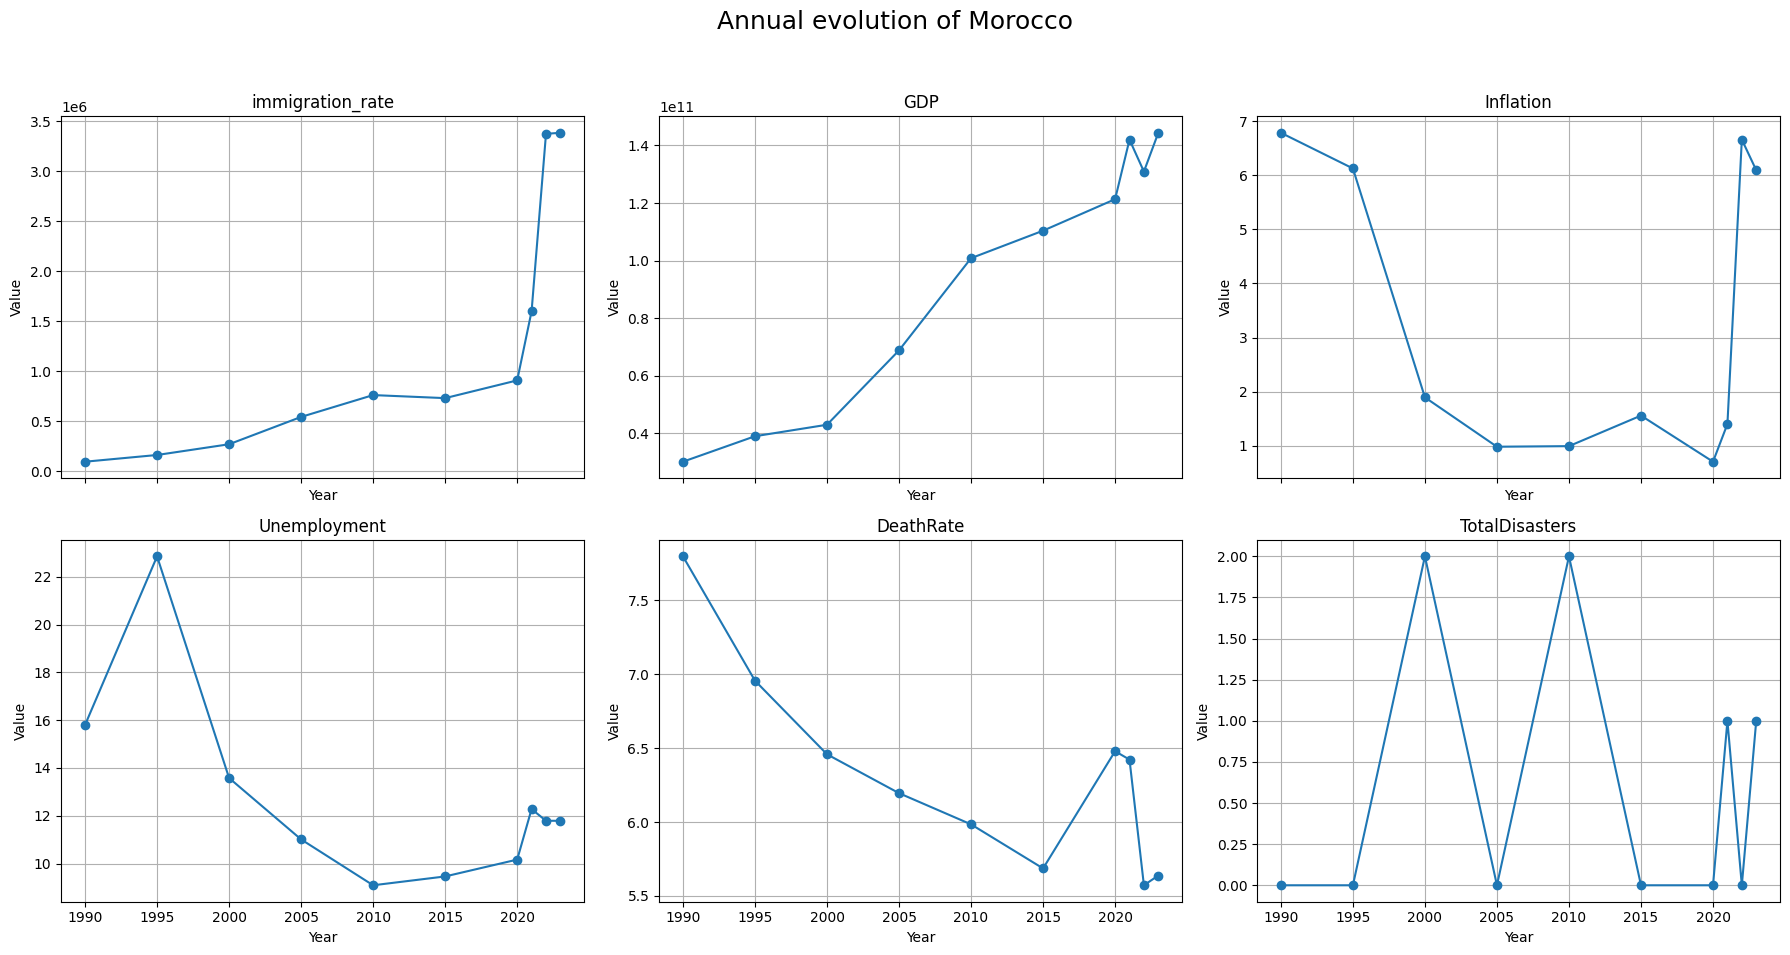

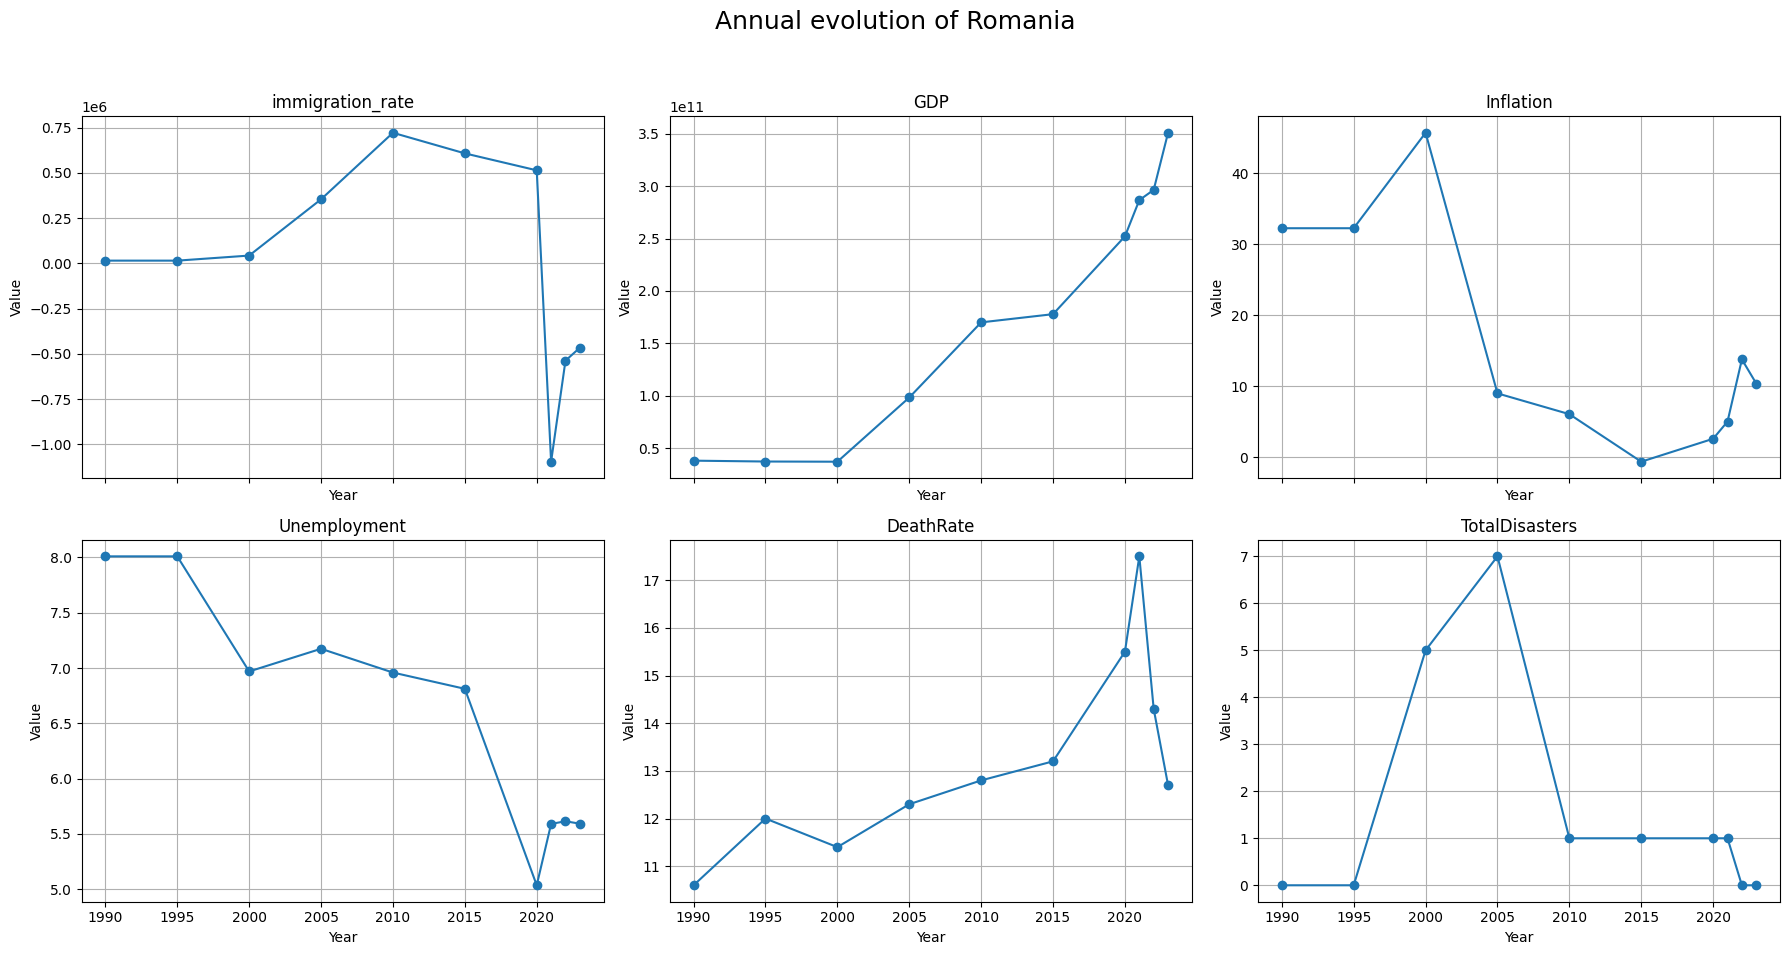

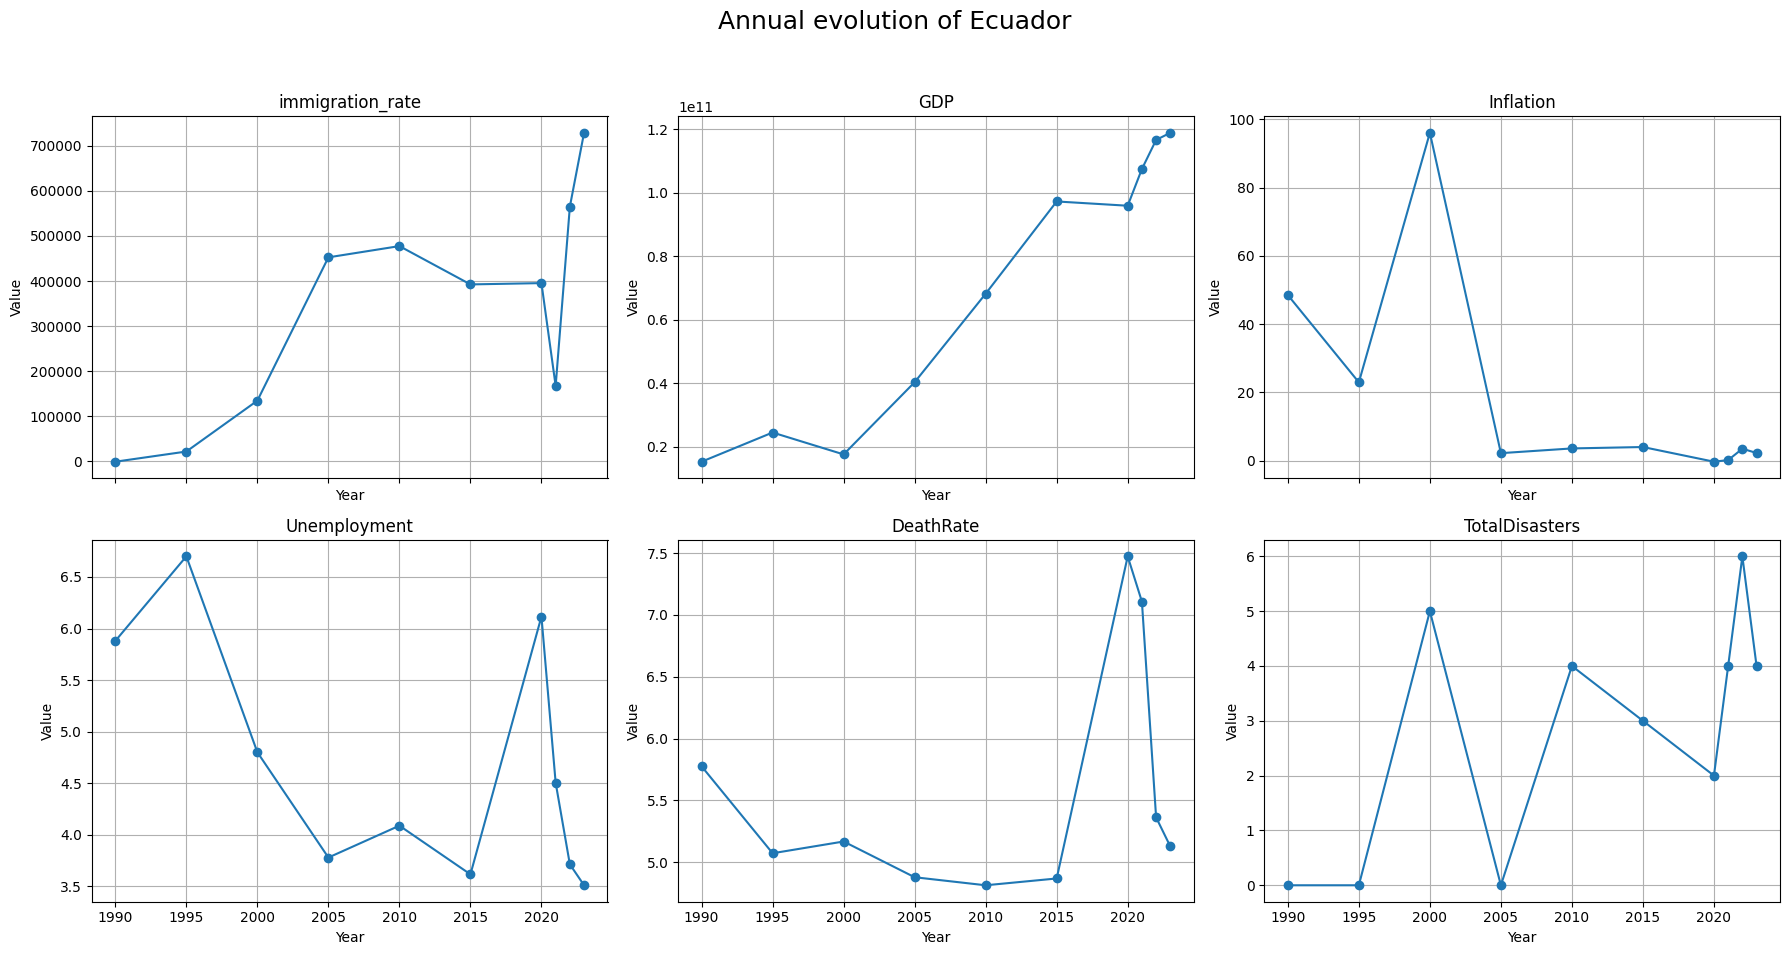

In [ ]:
df.columns = df.columns.str.strip()

# Countries and colums to plot
countries = ['Morocco','Romania', 'Ecuador']
columns_to_plot = ['immigration_rate', 'GDP', 'Inflation', 'Unemployment', 'DeathRate', 'TotalDisasters']

# Show graphics per year and country
for country in countries:
    df_country = df[df['Country Name'] == country].sort_values('Year')

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharex=True)
    fig.suptitle(f'Annual evolution of {country}', fontsize=18)

    for i, col in enumerate(columns_to_plot):
        row = i // 3
        col_pos = i % 3
        ax = axes[row, col_pos]
        ax.plot(df_country['Year'], df_country[col], marker='o', linestyle='-')
        ax.set_title(col)
        ax.set_xlabel('Year')
        ax.set_ylabel('Value')
        ax.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


###Morocco


In Morocco it is not evident that any of the factors have a direct influence on the immigration rate, but it can be seen that at certain critical points they have an influence, for example in 2020 there is an alarming increase in the death rate as well as in inflation, which is accompanied by an increase in the immigration rate and denotes an upward trend in the immigration rate.

###Romania

In Romania it is not evident that any of the factors have a direct influence on the immigration rate, but it can be seen that at certain critical points they have an influence, For example, from 2005 onwards the unemployment rate decreased and later in 2010 the trend of the immigration rate changed to a downward trend.

###Ecuador

In Romania it is not evident that any of the factors have a direct influence on the immigration rate, but it can be seen that at certain critical points they have an influence, for example in 1995 there is a high peak in inflation which generates an increase in the immigration rate, but later on inflation decreases and stabilises, which is evidenced by a downward trend in immigration after 2010.

<ipython-input-4488-0331b75663cd>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importances', y='Variable', data=importance_df, palette='viridis')


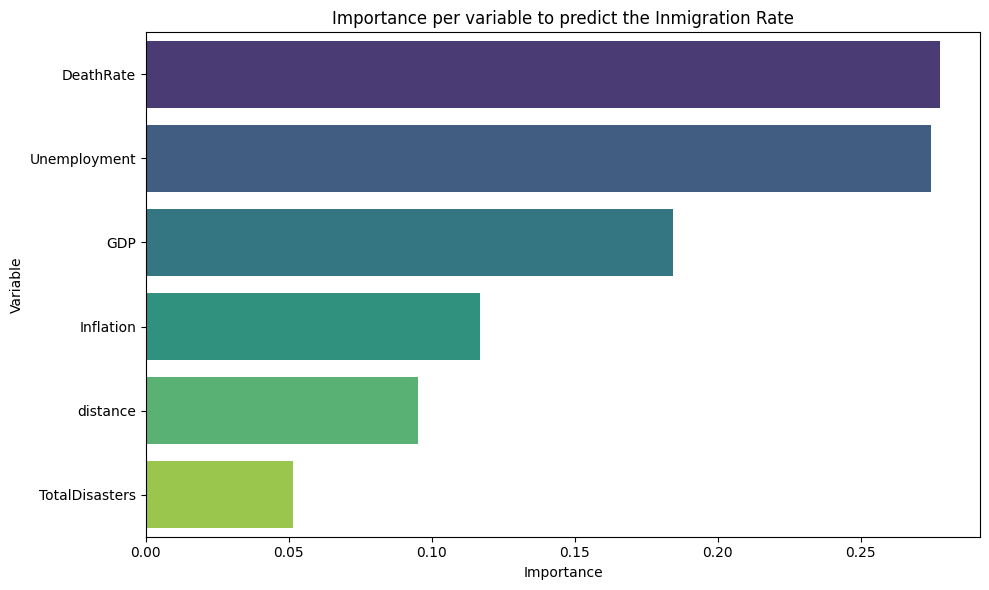

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df.columns = df.columns.str.strip()


features = ['GDP', 'Inflation', 'Unemployment', 'DeathRate', 'distance', 'TotalDisasters']
target = 'immigration_rate'

#data preparation
df_clean = df.dropna(subset=features + [target])
X = df_clean[features]
y = df_clean[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Importance
importances = model.feature_importances_
importance_df = pd.DataFrame({'Variable': features, 'Importances': importances}).sort_values(by='Importances', ascending=False)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Variable', data=importance_df, palette='viridis')
plt.title('Importance per variable to predict the Inmigration Rate')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

##importance per variable

A random forest regressor was performed in order to find the importance of each of the variables in relation to the migration rate, as a result it is evident that inflation is the most important variable something that is evident in certain countries as is the situation in Ecuador, followed by the death rate that also shows this with its comparison in Morocco.

##General analysis

Looking at the big picture, we consider that it is not possible to fully predict migration rate levels, due to the absence of more data, too large time lags and the fact that many of the migration data are not fully accurate, as many of the migrants do so illegally and are therefore not included in the official migration rate, generating a large and error-inducing bias in these analyses.